# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

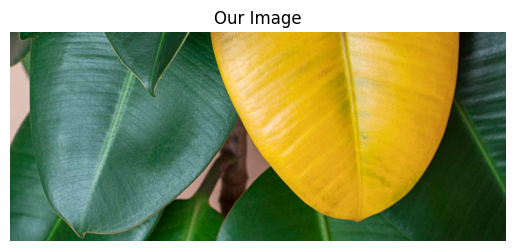

In [56]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

In [57]:
import base64
with open("image.png", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDIFodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMC4xMCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wTU09J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8nPgogIDx4bXBNTTpEb2N1bWVudElEPmFkb2JlOmRvY2lkOnN0b2NrOjE1ZmNkOGM2LTRhNGQtNDkwMi04

(np.float64(-0.5), np.float64(596.5), np.float64(359.5), np.float64(-0.5))

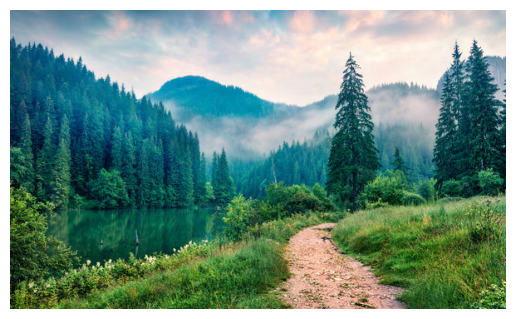

In [58]:


from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDIFodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMC4xMCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wTU09J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8nPgogIDx4bXBNTTpEb2N1bWVudElEPmFkb2JlOmRvY2lkOnN0b2NrOjE1ZmNkOGM2LTRhNGQtNDkwMi04OWYyLWI3NDFlNDVkNWI2MDwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD54bXAuaWlkOmY5ODBmNGU4LTVlODItNGM0OC1iZThjLTAwMDhmNTFkOWM0YjwveG1wTU06SW5zdGFuY2VJRD4KIDwvcmRmOkRlc2NyaXB0aW9uPgo8L3JkZjpSREY+CjwveDp4bXBtZXRhPgogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAo8P3hwYWNrZXQgZW5kPSd3Jz8+/9sAQwAFAwQEBAMFBAQEBQUFBgcMCAcHBwcPCwsJDBEPEhIRDxERExYcFxMUGhURERghGBodHR8fHxMXIiQiHiQcHh8e/9sAQwEFBQUHBgcOCAgOHhQRFB4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e/8AAEQgBaAJVAwERAAIRAQMRAf/EAB0AAAIDAQEBAQEAAAAAAAAAAAQFAgMGAQcACAn/xABBEAACAQIFAgQEBAQFBAICAgMBAgMEEQAFEiExE0EGIlFhFDJxgQcjkaEVQrHBUtHh8PEWJDNiJXIIQ4JEU6Jz/8QAGwEAAwEBAQEBAAAAAAAAAAAAAgMEAQAFBgf/xAA1EQACAgEDAgQDCAIDAQEBAQABAgARAxIhMQRBEyJR8GFxgQUykaGxwdHhFPEGI0IVM1Ik/9oADAMBAAIRAxEAPwCkwhjYADHtXPAIBlckBU8XwQNztM+jDo10JGMNHmctjiFJVO20gvgSgHEb4pPM7JpceXHAETTvxBJ4LnfBgxLCUNDgrgEVKTFY+mNizJCLURjpo3li04O5GOubpuS+EBGyY652iSFHcfLY47VO0bThpQORjriysthgRmta2OJMyhGNPlzbFV29cLLxqYj2jikpBpKld/piZ2npYUsVJz5esmxU6bYFchEc+ENsRFFflWj5UxWmW55ubpysUT5cf8OKFeSNjghy5tXy7YPWIAQzq5eQd1x2uaFIMvSit2wOqGBCIqQ34xmqaBCFpiDxtjLncQiOnIsQMCTGLcuVNwRjIy4RFG7Kdr4yddyRQgcYww122kYo7HAmNFCM6IWsMIYSvG8bQLqi0m18IIoy9Ta1JQw6prAWxrNQmY01NHdNQrJBYrucRNmIaesnSKyVFtXSFGIt5b4sx5LE8bqMGkwaGnKyatO2GM8nTDvctkgvdlvvjFebkwAiDVHVjNyt8PQhp52dSh4kYHMpF12vYYZxJgdUN+FMSGZFvp3I9ccGvYwXQruJl6xHnq5XF92xepCqBPEcF3JkoaQhhgGePxYiDGVPSgLxiR3nsYMW0Py/LRLUopG3OJ8ubSs9Lp+lDuBNTTUqLGqhbAbWtzjy3yEme/iwqoELjokA+Ucbi2FnKYzwRXEVZlQhY9hyScWYstzzOp6cDiIZKc7ixBvi0Pc8xkqfU8TL2xzEGcliGQvp2thLLceuao3y6RFW5IxNlQmWdPlAjNKiNjuBe2IziM9FcwMOpqgKmEPisxyZp2aoYgkDjAriqachMoFS+sn9MPCCJL3HFIxmQE77YlcUY8HaFRKCNJwA2guYpzNY1uEUXtYDHo4iZ5uaolejaaS7WAPpinXUlCWZxqWGHcgYEsWlCoBzB3Z5Lqi+XGccw7LcSdPAdW+MZoaJGVJCQeMIZo9VqGJEpPmsMLLGEFuSqKeJ47qbYEMQZpUGL4qYmTSOcNL0IsJvDUh/JYOGGnjCtW+0Zp23g00doeooIHbDhzUnbi4Mjta98GRFBoXBICQScARDDSNRKxJ0iwxqrOLGBVDMe5wxRFOTBZXcCwwwARZMV1Je53w9akzEyumB6g1HbGniAIyWRSPKxFsJqMLCeQtSkk2FsemDPJ0z4U9h5ltjrmgTggBa+Oubpk/hEY7Y7VO0AySUgvtjtU0JK5KRg3G2NBglCDB5aYg3ttggYphUHMG/GDiiJ8IbHYY2ddS+NN+MCYQaEQrbsMYRDBk2Qknj9MZMZjB3gJ2ucHEEz6OnZWvbGwbM0WR3aySAMMTZBLcDHgzSw0qEagliRiNjPUxj0hEGX9Q6dOFM9byvGjNtKKvJ1DFpAPoBgseeK6jpTyZn8yyxUuVXF2PJc8zLhreL1oDyU/bDtcnGPvUnHlms8DGHJUJcOqXDKQbG2M8SH/jzn8MC2JG3fGjJc44JF6QAbnj2wQa4pkqcihubBeMaTMWS6AD2ItjrnVvDaOmW1jxgGMaoHE7V0YQAjjGBrhsoEHSn3G2NMy4bBAbYWY5DGVNHpW+EtLcbUIbBEL7dzhDS3EwuP6IoYtJtcYgyKbntYso01AsziUmy7jFOAmeX1tHiL44+xGKDPPUy9Yo9FzgDdxwK1I1lNFLCCq72weNiDE9QqOu0DipRDba+KQ9zymxBYWxYU+hRtxe2OHMA3VRWmWXZiV98U+NI/wDG3JkTRWb5cdrnLi3h1FS3YAjEuV56vTIDNFlOXqGDkb22x5fUZe09/pcIXeOTSKqAgD64h1mX7SSxgnHWZxgeYwgpYjFOFt5LmWxEFRSoJL9sXq5qeXkxC5EwIOF3xoYwGxqJQYVvxbDgbkbLvJaHUAjGGjNQkGG0SSORibIQJ6OG2j6lpvy1uLk4858m+09PHjoTkkTqWLbJe1zjAwMOpfSQwSGwbfvjGZhNAUw6MdEE8DjCmFzbErkrSt9OGLii2yCATTCSTUd8VoKEhyDUZRLNpFgRg6uAFoQCSVNRLtcntg6PaaCL3lkcsOmygj1wsqY4OsvgePVgGBjFIhiSALdQPvhVRtiDvO5fc7YZpEUXMtjmsLDe+BKzQ8LpIRYMx5wlzGoIzlRegQQN8JW7hExfmCKsARRtbFKcybIdokeymwxSJITUkj2FhjiJwaoRGpkFrYA7Ro3lvwDtvbA+IBD8K4NNQnXp2wYyRTY6i2pogGI9MOV5O6iAVEYU7bYaDENIJIqi1gfrjSIOqYZYGbgA4quR1PjT7eYbY65oX1lT0Y1XHfGhphWThpiDYrvjCZwEJ+EFrjGaowJPjTKV3XHXN0wOopR2GGq0ndIHJSEHjDA0nZKlLU5vwcFcUROrTn0xxM1VMvigYn0wJMOjCVoyfXGapuiSWhOoG2O1QCkvSgJPy4EvNGOGUdI8TAhb4WzAx2NCDNHl+pgFIt9cR5J62DfaOKONVJJxI9meri0rJV6o0RIA2xmMEGF1DqyxHXQJIbWG5xdjJE8fNR2gzUiLFYrv9MMDWYkqKlMNEQSy2tgy0BUIhENGWBUg7YEtUciatpGrpW022tjlbeblBqov6Km6kfTFAM84ntOJREDUBgtVwNJ5kHptTiwtjQZhswiKn0C17k4EtcaBUJ+DeVLC+w74DVUdpJEqiom5I4xpaLCmERwGxNuMCTDWWBHHBsMCalCsZZEzocAVBj1ciFUkrq/JscLbGCI9OoKmFn8xhfABahPk1zjxBV4xoNxRAqUPE3I4wwSViROqrabHBACAXNS6CmMptbGlqghS0IWiaMFWXb3wOsGb4dcyyOmsw8twcZqnESqry8g6tBtg1yRLY5GmgCsDptgHNiU9OKMd0ZAAHGPNyLPfxNtGaEPFbbEhFGVAyOjTzjJsEr1uu2+KMUmzEVFjQ6t7ftiu6kRAJkTTnUBbnHapzJckuWyMoYJt9Mb44ES3Sk7ydTl5iULp3xy5tUFsGk1CsrpNPIxNne5f0yBRHkVMhXfYAYgJJlhaoozepTX0ltZcU4cZ5i8uStoJT1oiI0rv9MOOLVEjMBLpsydxxjlwiY2aAVFW5v2w9cYkz5jBZKqS3OGhBEnKYPJPL/jwYURZcyrU17knG7TgxlqysO+AKwwxhMEzDCyojlcwlHka25wBAEYGJlyKxFzgIUIhQ82wJMMCGI2kA9sLIuHqqFLNqj3O2AC1NL3BqqTWum2GqKiGa4A1MX3Aw0NJyJKOiYN5uMYWmqsPggVQNxhRNxyiXFyFsT2wOmM1VAZWRTqthgEQ5i+qlDk7Ww5VqTsYqqo9W4w4GIYXKlpG3uMbrE4YzMf0XRrjFUkk+mxFyuOm3JogOxW2MMMAGWClPIXGXO0GWrTEjcWxlwghMiacqcbc3SRK3phf5d8EDAKyh6QE8YINEMkoahueMGHiTjnwofbG65oxmdWkKnZcZqnaYVFFa2pcCTNAh0EcTEBlthZuGADDoaOE8EfQ4WXIjkxqYbFQx6QQL+uEnIZWuES2OlCMN9sCWuOCaYVptwdsABcYzSlgzXUE298MCgSY5CdpUaEOCwcX9MMDVElL3gzxEjS3bBD4Tu28+hgIG3GNJggQ6lgBHG+AYxqSuopNRNxglaDk35iyaiYNcLbfbFAeQuhl0NJqQBlwJaGEsbyxstHZbYzxIXhSMNB57kb45nmrj3hPw7KbgfbA6gYwqRvLEptbC4AHtjC1TQlzs1D04yV3BxwezMOIrFphdXsMN2mLYMtWA23GBuOnQmk46ZL4tWBIE2zLNZ0eb7YHTNL7by+BA6ja2MO0AeaXCkYkeXY4HWIfhEwunp+gwJW+AZ9UcmLTuYyaCOeJbABuMI1lTKjjVxBaqIQska2v64cj6tzJc2LTsIQ0YeIrKtttjjdXpEjGe8FmolSxAv6nA+JccuLTLYaNiDpbCXYS3HcKghkA5xO5WVrdSchkHO+BCgzWapX0ZJvlG2HAhZM+poQmVEp5mAb2xhzjtFrhI5nEyzzjUL2wts3pHLjA5hawIE0gYRqNx1iUTUjSPuL4oR6EnyJZnzRrTjjHN5pqGoHU1Ergqp0j2xi4wOYwuTF5pGkY33Jw8PUUVJl8WWeW9r4E5ZwxSuoozGt7WwavcFkoRXNExY7YeDJGXeVNTsf5TgtcAoZH4Zu4x2uYMRnfhfY4zXGDHLEpvbAl4QxwiOkYfy4WXjRjhUVMw/lwBeNCGFxUrHkYAtC0QlKcjtgbm1JNBtbGXMIn3TI743aCZ8tOWYDBXFmW9LQLKL4y7gz5YieRjrnSwRAbAY6bcomj2ONEwmAzwt3HODBijBJKU2Jtgw0zQTOQUBfdlIAwLZKhpivmEvSwoANN9sK1ExxVRtU/PGQ+M2zbx+tDFGBRSU5jTzfzjzFrm3/1sL4+ifDpx33ny2PqS2Wu09DROxGJZeJ1lRQXYhQBck4zeFcujkjQopYec2UE8m1/6YEgmMDgQpVQ9sDvGWJYKUSAFcZqqFpuQejK7EYIPBKyp6O/AwQaJbHKzQkdsbrizjkfhCO2N1Tgk++HI5GOuZUsjpVbtjC0HSDCYcv3G2BLzhjjKCnCABlBP0wljcoQVL1QL5l3+2Aq45WreSLKRcrY4zTDOWQLgfTBhYo5ZwS7EAW98FpizklB+bZiPXB1Elt5VJESbhjvzghBJMshVl2YXHrjDCDGH0ygMoO4OFmPVof8Mri9t8BZEYd5W1FHvfjG6zOCKZz4KNRe97YzWZoxqJxKcNsNxbvjtRmhQZx6RBEWuA3cY0PvOOIVcBF1lNtwTxhvaT6iDDIoQw8osThZapQqgiRqYG6NjcY1W3mOm0CES6tha3rhhMUK7SfRuLAYy4wSt6cg7i+NDQSDLY4wF4tjCYVbSD07M22NDVFMpMKpaZgQpvY4WzRmPGZoqOjTorf0xC7m56eNBU+no2ZrrbbtjVyVCbHcq0GEkHfDPvRf3Z9HCHYM429cYWriZpvmX5gqCJWVgW9sDjJuFlUVB9QKAbcYOooHaEU2kWvYYWwjUcQ1TGRwL4mdSJSpviUyqDewGMBqH2llMGRSABbGE2YJqExuLeYb4wmLIkWksbjBKLmHaVMw1XucaVhB5F5Ray3BxoWCXlE93tsbnnBiDICk1G9sdqhAS+GlQGxwDNCEM6KhbLthVztcXVdEzsbthyvU4gGCiihU784PWYOhZ8aWJuFx2ozdAMqajW9gt8brM7wxPloNr6cd4k4YxLY6Cx+X9sCXhBAJetHYfLgdULaWx0lze2M1TCRLVp7G1sdcG5d8M3YY6BqErana+4xswtOinHcY24BM7bSNgB642ATKqKVamFZ1As1+N+DbBEVtABhyQoy3tgbhiJ/GWZweHchqc3qFl6EChneOIyaRqF7gb2tfftg8aHIwWC7BRcvpKujzKnWpoZOpC+6vpIBB4IvjCCuxmgg7iQqEY7accDMIg7R25Av2xtzRtOaZNNvXm2M2hAmVGI33vjrmT8N+D8zp6LNctneYU0EE4ZrnWIxzfi7Em59r4+udbUifCrlCsDPSPDPj+rzPxsVnDLlhDJEEXUAOxYjft2/YYQ/TBce3MsxdYzZd+Id418c0s+S51R5ejS9ONY0mjbZiy3J+gvgMPTkMpMZm6xWVlWCZv46hHibw1ArdKCMq9UwkVlBZCttXtc3vY+2GJ0x0MYvJ1o8RB6cwFfxIzQfiDHOV6mUu4phEvyhSwGsG257/ALYP/DXwq7wB9ov4+r/zxPZKbOaX/qRciDXqTTfEf/xvYW9e5+2PLbCdGvtPcXqF8Xwu9XHsZWeR41ZS0ZAcA3K3FxfCKqUhgxqW/CEEHTjNU3TLGowdtOM1TCglLUDA8YIMIsrK2oz6Y3VFlZD4S24G+C1Qal8AMY0sMAwucDU7JLY8HHBZ2uREzdhjdIm65xpGPa2O0iCXMgZPY4ILALStnJ7HBBZlz4BmF7HG8QDvObjscdBMtp5iDYrcYwrCUmHRMDuBbCyI8GNaOe2kMAQThLLKEcQushU207bXsMArRzqDxBRSsQdyMHrgjGZX0HQWsbeuNsGcAROOpddJOOG0077QRaWRSRpvvzhmsRYxkbQyBAq7rvhZNx6ipCpUmPGrzAfcQAr5txh0QBLIlHOBMYsmqqdjgSTDFTrQjnHajNqW08amw04EkzqhqwBTe18ATc0QhHewF8KIlKtLTLYDfAhY3UJUxVjdztgxtFMZYGVlsg2xxnAXICCR13BOB1CaVJnPhhfgg43XO8MSyJCp0ncXxhM0JCDGR7YSxBjkFTvlVbnCTZjp1ZgwsCbYwqRMqWKNS7DGVBO0uigLnTbBAxTsBvITRBXs1tvQ4INOFEXKiYQDYHB7wSBIqVbgY43CFS6NC3OFmETUtsqjYYGiYNkyQaxx2mdIuurjBATgakDRat9OCud4gkPhFvvjt4WuSSnXsLYycXqTSJL46phcwhIAw4tjaijkqQ6YBtbHVN1y1YwBvtjoBYzrKBwAMbMBlbEAd8dU25SXB7Y2pxMkVuuOmRVnVbHQZdU1ksixrEhILmwvbYfc4YiliAIDGhMh+COd1ObZLVwS5fDSwUlXUQxNEfKdMpBWxJJYcseLsBijrMYVgQeZP0rl1O3rPSVAA9BiOVzyH/8AJ3Nel4Dq6OlmzGlqdaK08UUixlfmKdQbX729AQeRi/oEvICZH1r6cRnPwM8e+Hsw8E5bRCnSizNp+gaClp5PM7EXdQe1vMxvZb/S/dX07jITdj1mdH1KPjHrPVqiI6TYb/TEEvi6SJi+4ODuDUsWK+1t8ATGASYgUbHfGajNoT+czqyzIyhSCLBgRZrd/bH2qm5+cvxNIlRPQ5XrgdE666Sofzgm922IK39vvjdid5jMyrtFtNL0aOoQRQssgF2KAstj2J3X7YZVkRQYgSEVS4qJKgysZNOzPuT9ee36YbpFVBDG7PMhTzdRjck2Nx742oDgrvNx4D8Sy0njCDNaucmKmhIclt+nbcAf0Gw3OJc+HVjKjvKuj6opmDueP0nrP4E59PnWe5+audJWnZKiOTUV1rbSbKew237Y8zr8QRFqe99ldQcuR9R3O89K8SZ1lXh+iNXmdVHCmliik7yEC9lHc48/FibKaUT1s2fHhXU5jWjMdRTRVETBkkUOrA3BBF8KYUaMcpDCxL/h9Y4vgdVTdNyiamA2tgw0WyQSanI4GDDRLLBGT1wcURINEWOwxtzKnVgdRe2MsTtJEsCLbcY7ebQliUyScGxxhYiEMYMl8BYHa4xniQvAkDTW2tbHa5vgSmSmb5eMEHgNgMlFQODq9caconDpiN4StO6G3JwOoGF4REkplVhZbHHbGDRB4hq1EpUKwNxwcK0CUBzVGXCYrzvjNIh6qk2dGXnfA6SIV2JQ0R1eXB3A0yxEtub3wJMYoqfMwXjY44CETK5Qrr5jtgwagkWIO0EdjvtgtRgaBB5FVTZThg3iyK4nFKjnnHGaDUsBPpgIYMuhcL23wJnXCEnbvbAkTrkxLcbDGaYYehJDzDfnHVN1EzoAJ0jAnaGouFRRlRtbCybj1WpeszIAPXCytwp1X1NxjDtNG8IREI43wssZ0jMDwoxg3miDNCxa78emC+UK5bGgNgBhZm6ofFGixcbkYGTsxuVawvB3xwEMi5CRgTuuGhDMsCfaEIu4v7YKYTJLCgPoMbB1QLw9XtmFNUPNGsclPWT07qu/yOQD910n741lqCGJEZMEO4I+mBqcCZAgnjGQ7k1OnkXxkwyet3XTvjqg0BvINHp3vfGzQ1zgY7gDGTanBcEGwxs2WmY6QBtjIGiVF3Ivc46FQnQWHvjZxE6WY2xsGhI2Lc46dPgnqcdcySf5bA42dMV+KWf0Xh/wxUSVtRNR9ZdMdWKRpo4WuAGeysFsSOR9MU9NjORxW8m6nKuJCWNTxj/8cvG9Fk9LmGW5gsc2aVGYFaZFLvV1jSksFUHZVDHUxNraiTuMeh1/TliCOK+gnlfZvVgWjc39TP0yhZo11gK1hqANwD9e+PFnvz83/wD5I5fmE2a1dXmFFkvwdMqSSzyPM8hSRtKhYi9tSqty4XSCSL7nHsdCwCgAm54/2iOWIFD3x+88m8I+Mc1yWsq8vyGV0hrtMNRIUPWaO+oxB73UcgkWNje+KsuIMAWnkdNnfC4VeD+Pyn7W8ITzTeFMuq6+WmDz0yS/koUjRWUFVGo3sBbc748Bx5iBPrFO1xnIIwtyVAHcnAVDuVaFO6kH6HGVCBn2kDk46ptz+bkjM9QWkiKMDv2vj7ReNp+dPGFRUSzxIC+0Y0W7W5/qccuxgtusvpETz9RdLMhNx2xrMdqhKq0bi2Y/mNps/vbFS8RAEI+FemgWSQkF72F9gNsYrhjUHJvUtoGZZCsbsuoWO+xHv7e2DbcROQ7XNX4I8QVvhmaaspiuoQSRfZxY2Fx/pbE+fCuXYxnTdY+B9S+n6xf4o8TZt4ilppczmd5KdRHG2u2lLbfX698FiwLisL3h5epyZqLmyBPfofH8lN+DeXZlDWUf8R6sUDxiTU6rrtfTzchT7b48Y9Hq6oqRtPosX2np6BchI1bD48zY/h/43pfEniPOKGCVHjpij05HDxsOQfr2O4NxiTqekOLGrGej0XXDPldQeOPlFWceKaio/F7J6GiCyZfFHLDUFGBs7tpGr/Dult/Q4bj6YDpWY8xGbq2brUVeBYP1noU8DHe2IFM9R0MClpSwvpwwNEnHB/h2U7YLVFlCJIIwFmGM2mifaE03tvjrM2hKivm8v7YKDXpI6pEOzEY6gZ2pl4nzzSEWY47QIXinvIdX/wBsdpneLCqeUAC5uMAyxq5IQPM3GA4hXcLgh1jjfAlqhhLhS0nkuQDhfiR64Nt500Ssux+xx3iGacAg70cita22GDIDFHERPhEU2Ix2q52kiT6QAvfnGXD0yJQHYjG3OqUVMYVbg4NTAcUIBMxAtxhoEnLQa1zg4Emi78YwwwIQFNgcLmkz4qecdMszoYi22OmXL0IsO2MnS1NPJN8CY1ZcFudsLJj1hES7/NfCzGiFpHEQCcKLGHPmRCfLtjLM0SQUjcYHadc5qN7HY4ICdKZJWFwN8bU6fRSEYErc24UjsRzthZEyhO2GgtxjVNTDKxJfDxEtzLVckWtjp0S+N/EcHhfw7UZtPE8zJZYIEUlppT8iADuT/Q4PGmtqi3fSLnln4YZ7R5fNmVb4xhmyN/inrWWWodFjWXSUMygBWvYkNc2JIxVmQkAJvJsT0SX2ntiaWAKm4IuDftiCXQmK3tbGQTOnpg72x07eWao14OOg0TKZZE33x0JVMHMm22OjdM5rY4ybQndW3GOnVJrqtjrg7Tt7C+OmSAdi2/GNnSwevGNgzhIsd98dOlV992ONnTE/jRBkB8HSZhn7pHDRSK8MkhcxxyE2DMinz+gBB3OKekLjJS95H1ox+HqftPGv/wAe6Dw9S/ilVVlZO1RmfSkmhl0haeKSWzGx2AYqzAffHo9aznCAOPznl/ZyYx1BJ5/Leez5p+IGTLkuZ18NY8VFTS/CxVkaBzLP36afzIOCxsLg24x5y9M5YCtzPVfq8YUtew97T8rS+KKuk8SZzXzTR5klUrhEqkLPKjHYsSeVH1G+PbOIFAOJ8y/WFcjFTd+sy+SZzJS5o2cVdGKtDITFFIQfMpuoIt5hsBY82xr4xWmTLlp9QF/pPW0z3xBnGZKMwzzMZmRUiNJRp06eAIot1CLAnc7D1wrHjRRYWegc2XIfMxjR8wzkU7UwzSo6RtdSxN7cd8Fox3emEMmaq1bQ7LPEmfZbPBUwV7HoQ/DqpuQVBvv6na18KfDjYEER6Z8qEG/hCPFHi7PM4zKWop5XhpjKXiiD/wDjBVQV/wD9b/fA4unx41o8w83VZXNrxPy/IzyMJGFj/MR/vfHqLsKnzhNmzJwOFuGN+xwVQBzCaSokL6gBqB3se3rjiBCDHmVu4lrwy6QARccYcppYrJR4h0iiphZEZSR8ur/PGKSpsxXehK6SNlTqWA7c4cT2iMm4hNY5MQO4FrW5vjMfMALvIwqJERmGlCdJI5H+eCJqcRRha1WmD4QBAEcnUB5jtxf02vbHVe8W1gUJpPwy8Uz+FPEQr4emweN4mDrfYi4++w3OJ+qwDOmkyvoOsfpMwyD5Q78O87NP4+XNamrFI0lTJLUVKoXUAhiTbuRuBt3PGM6nCDh0gXtKuh6wr1GpjW/Pv8p+gPwl8cL40gzMlQhpakrHYW1Rn5T+xx4HW9J/jFfiJ9X9mfaH+YH+B/Kbdo/TEVz0yJU0a9wMFcAiUSoB2wQgGVGINwMbdQdJMpaIoeMFdwShEg6a+2Oup1XKWh33wWqZ4cnFQq5+YDAnJUIYQZf8Ho4N8D4lxwwVCIontgCwhjGYXThlIwtjccikQ6NtsKIlIaSKkjbHCYd58Ntj++Cg16zhVW/lx1zCJ80AYXWw++N1QSsoeFwL4IMJhUwZoSSQ2GaoorKXo1PbGjJAOMSo0ir/AC3wesmDpqc6IvwAMdcyp8UA7Y64JnSot8uMuZUqZCDjbg6TJxoxsDjCYaqYSkDbb4WXjwkuRDe2AJjQJ3S6tjIW8tJkUbYHYwp2NmI3xhWaDL0m8tsLKzbE+G+5x3E2dutt8EBcAmp1UXnHGcDc64N/IdsZQM4sRIO5C2vjQogljKx6g4OBLo5Ldr4yp0wf4wUea11JS1MObR5TQUUgd5kLGokke6dOMfKGIICk92J2tfDsLAGquKzISOa/WeN5FTeEa78QZ8qrs6zyszyKWN6OpmqWR5JRHeSEo6lFCMoKkixtyRi1jkXGDQqecngPmKEnUPj7G0/QHhPNK4LBTZxUGVpI40jkan0s0hUtYuvkIKgEbDe/tjznUdp6qk95qdQJ5wqHUgSScZCE4Tvzjps59TjoQkCtsdNk0GMmGWacdAuSsQMbMuQNycdNnccJk4W3xsydJuBjamSqVkjAZyFBYKL+pNgP1wQBmTwv8dPGlOtZXZDDXQVGViEDMoRDephkBItAzbBmFx7bkY9LpMJ2at+39zxvtDqQCUvbv6/SeI13iaoy9ayDLkcyZlJTvOoTVoVIwFVdhY2bSe+31x6HhXRPaeM/UFbCnmr/AKmjz3Mc0fIRHlkVVl4p1W9RJVRo0jWHlt3Y3Fx74NVAg5Hdha7fG5l/Ej0kmTfxHMamSHMpNCiGRQ8pVb3u4PlF/a+3pjg51UOIGQAJqb7xmDep01qVMVW4DEllUWK9rX9/X3wdWCKgAUOJufA9fndRAuXZTUPSxVU1+u0hNrG4UKN/qbcbE2GENQO8b0+v7q7T2kZVPT0cfVnWpYi7Po06vSwwoZATU9k4SqwFaRjKRawa5A9BfBk7RQXeVIjrcfKe/mxtQRtPzvSuugISzLa5sNwcWEETwGNQhBHrGjzea5P2xhvvNQgmSp4zFUyx2AcXUC25uNsaTYBhbA1BURQWl1ar7FbdsPs8RLbioQk+k2uABxbjDAIhgZfTNJNqWIM+kajbsPXHMQOYooTJVRZV0kAr2IONRrnaDzKlkb5FI8vF8GZ1SxXuA3B72xw9IBEujdg1u/I9frjQItgKh1HVTQRzFSbyIVJDEH67f3xrAEiArlTtHfgnxHmfh2jzCXLaoQtURiO4Nm5uCB3/AHt6YT1GFMpAYcSrD1mTpg2g0SKnvn4R/iXN4rzNMsroY4JRA1rG+srp3+p3NvY48LrugGBdamfWfZH2wescY3FGv0qeqNGDjyrn0WkQSump6Tp9eVU6sixpc8sTYDBIC3EXk0pVnmSMW9xjtUILImPVyBjLqFpuVmnFzY40PM8MSt6f2wQaLKziREHGkzqhMaNthRj0JhcSLwdsLNx4qERqgFrDAbwtpNI/NjbmVLkUDbGTOJ86g9hjpwMrdo4l1SyKg9WIAxtE8TiwHMjFU0swPSqIXsdPlcHf0/Y40qw5EAZFPBkrIdgQfocdCuVtCC222CBgESD0+NBgESiSJh2wQMArKHiPpgw0DSZxKcntbGF4S45NaRt7nAl4YxThgC8i+O1TtAkkp9tQGMLQgoEsCsBjLmztj3x0y58Ax4xhhC5YFa2+BJhgTqDbGEzqkGBDc40bzOJLqWFsdpma5Ey25wQEAtOdc8AWxmmbrnFmYcY2pmqSMhcWOMoCbdya/LbGTanBe+OmVPBvxN8SHw746pcy8U5pTZnPTyyGgyWh83QU6QhbVsrkXJY3a7CwsMX4kDppQVfeeV1OY4X1vvXAHb4+/pEFQlfnsld43jfKKHMYq6GdWje7oI4opBAuvlwoKtsN7ji4w3ZQMe9VFAHLefa7/YGvn6z2Xwd+K3hDPmajirnpK2Ky/DVEehpP/wDmBcMPS36YhydNkTcjaejg63DlOgGj6Gb8G3IxNLJw/THGbIkG+MhTtt+cdOuSC3PGMmXJBfTHQbligWx0Eztx3xs6QsMbOkSMdOkdJwQnSQXa+OmTx38Z/wAQmoKlMky2ojiTqtDWSkktuo+UAfyk3vj1Ok6UEa3+k8br+tKnw0Pznk34jZ7l8GXg1hasr5h/2qQEN0nQAaif5eBfvzj0UFbCeN1LAjzbmYnw7WZx/Fpc0egqK2JalJKqONQPzFQ8WG3N/tgnqpMgYkGrnpPi7K8jzzIqOvzWU+Ho9QFMX2eW4/mJW67i/vYnE2PIwauZ6fUYcboGbyzzv8RMso8mSlTLcwSvqSrNJCjB7Hgs1thb99uMMQludpJ1GNEYBTfrMTBE9XE/WiiCIS8kzMAw7m1/m2HGGMwQyPe6XmazwLmtBlNe82VzQQV6OUgkem6/5RvqsL7Gx+vbCslmtQlmHMcZvvPe/D9ZPmHh6CeVK1GSyh6ymWJ5VPDaQbC4++Jiul57mN/ExAm7+Mtlg0wRlVXUj6R6jVvv98GDvAK0BA6qgeQq40na3FsMV6iXS5+XWuhKEMlwL+xx6Q3Fz5tpdR3IbTubWHub9sC49Zq/CMvM7JLp3IC30i+3++MKUVtG5CSdUGqTJ8Q4QILncWtv64pxgVvJHbeVPSS9IyAWVQDa/PrhmqAGEvopJIYyY9SsR5rHnAsNR3gM1HYy+tBehHdr6kJHPqMYmzTVbaoHRiKWZOrbQDdrXB+2HMSBtOJ0neXBDqcgFwvLAfpjgYpvhJX31Ac+3GGCL7VDKCMzzCBWALC++OyPpXVBXGXYAQuk0q6q9tANyDfGNvxEHdt5s/wzzOHJfF1PmRDfDxeeRVYC6n6jtiPqkOTEV7z0PsvOOn6oP2E9F8e/jVUUlY9Lk9GAsU6HrM4OpR8ykC4sfW+2PO6b7KDC3M+g67/kTI5TCvB5/WI/xE/EWTxBU5QuWO8PQSKr8jXAlP8ALa3K773tbD+l6Lwg2v5SbrftYdVoKbVR+v8AU9+oa2Bsrpp5pQpkgEnmFifLcm2PBZCGIE+vTKCgJPaFJokQOhBVhcH1GBIjA3cSLA24x1TC5nYtN/OLjHETLvmRljXX5OMcLnScSsOLY4zQSJaoJtfnAVGBjLUuMDUYGMEzvPMsySnWozOsipo2YIpc8k4bh6bJnOlBcn6rr8PSIHzMFHxnmfif8bqSlnlp8koPitNwJ5W0oxvyBzbnHudP/wAfdgDlavhPkOu/5rixsU6dNVdzsP5mErPxb8Z1FQ0iZglOrG4SOMWH649RfsTpFFabnzuT/ln2i5sMB8hMlmfiLOMylL12YVNQSbnqSk+3H6Yvx9LixjyLU8rN9odTnN5XJ+sHpc1r4N4KyaI6lJ0uRuDcH7HBNgxtyIGPrM2P7rERnlnijOMrkY0ua1cTODr0yne4/wBBhOTo8WQeZRLcH2r1GDdHO/O83/g/8aK6kRKbOqcV8YIUTA6ZFFgN+x78748nqvsJW82I1PoOh/5e+Ol6hdQ9e89OyT8R/CecTpT0+YiKVlJtOugC3a52vjxc32Z1OEWVn1PS/b3QdSwVH3+O01UbxTaum6vpNjY3ttf+mICCOZ7AIM7oH+HGXNnwjHcY6dc4VtjJ1z4opHGNmzoi2tjLmz4xWx1wqkkjW24xlmcQJB49O44x13OldzxjanXOXOOqZqn2k8nHTpApc7YKAZwp2ONgVPumO+MubU7oUDGQpECxx00S5CoXfAQ7E7bUpCmzEbG17H6Y6YKn5iz+qyPLvxar81rqavziWgrJBJIjR6WZRdFLXtq2JIAvwPLbHqIHOEAGrniZWwp1Bcgkj3XzmV8O1ecVmWZxntDJFTqK7riKBrOrE38sf8+jn+b3HcUuFsKfSRYHylWcHv2971N5kvivKvGbSUmbeCsrziWigeUS0Uvw8608VkLKnOqwv09iL2GJHxNiFqxFy/D1SdQ1MgJHf4e+0/RuViD+G03wzSND0UMbSElithYm+97euPMN3PZB2hJFu2MmzlsdNnQBf3x065IWBt39MdMlb1MKMFMi3IJABvsBf+2OCzJ2GeKZisUisQAxAPAPGNIImWJMPGZjDrXqBdRW+9r2vjplydgRcWx065zTjZ1zojvjrnXMf+KXiQZHlT0VMXWtqY7oy28iXsxG+zemK+kweI1ngSLq8/hoQOZ+WfxSmd0WuSkmBlqEYSAAKm/ys9r3Nvp7Y9tRp2nzWd7OquTDPCVFl9TN/wBQS5dHTNFIzo6tri6oB8vUJN7aQp23YnAOTWmNwYwTrI4mdqKjPMq8Q/EDMIkqqlYBJLqsI3dA26+lrj7cYIlSvG0Q3iI936fnN7H4apHyiirfE/iM1cuZHUepP5ZV30mxIGlVUtfYb/bEgffyiWnAoUNke9Xx9/OYL8UsloaPOp6/La+ObKZpADUIwe8hUEqLHcbfTD8bNVEbzz+qwkZCVPlM8+lSnlp3qpauWNQxKR6dV7WH9L824thwO9VBxBQdJFS3L+s9fHVU+URFFZZGijlsCANxzq39BjHZQKM1mBNXPZPANX47qXo44YujlRlJMlSWLutwLtfzEAXAF7EjCCEq+8v6bJnIA7T1aaFkieNr3WW4/rhIO9z0yKFRRnmaPl8yJHllfWq41aqZAwX2NyLYYq33iMmTSeJ+XasqsazwkGEDQb7nbv8AfHpIexnzfhkyyldWj2Nl5OoWDfpgjF1UZ0zMIp1J1lGUrqFiCDb6fphPcRpYaSpg1WXMpPUuNXlNu3pivFVSJmjWlkK0PScdQEE87g2/bAMLaxBDDTRiyMhfl8gG9j3OGkRcLdUky+UDzFbHQpvuP7YAXqEJTAqGMSby2VQb7D07bYedhtOcgGOJakVFHZtJKjSNIsdPofp25whU0ttFs5MDp4GkYFWFl3a/ph7GhFgi94YrLHO7EBWe1mt6c84XuwAnFq4hUMIZ3mAk6fNye+ODUAO8AgFie0lqXolhq8vKkbAYO96iWFixOO0ZgBdQygbgbn/fG2N3uGtmV0khDKQW0jmw7De2NeKog1Nb418dZrmdLlsSyyRy08Lxs2skvqFj9BpsB6b4l6fpEQsZ7GX7Uy5woPYe/wAp7V4G8UtL+DcmaNrMlFTyRNYklSq7XPN9xjxupwV1Wn1n1HRdbr6DxB2BE3PhWtizTIKOrhmEwaJQz+rAC97E2N+2IsyFHIM9Tp8gyYgwNwxXDVjwAG6KCdvW+Ara4696l+g4yFJBcYZssjXAGMURP458R03hfIZMwnGuT5YYr2Lsf7Dk4p6LpW6rKEX6yD7W+0sf2b0xzP8AQepn5j8V59mPiHNpswr5mZnYlY9R0xjsqjsMfddN02PpsYRBPx3r/tHN1+Y5cp57dh8BEoBJNgScUEyarkUp6l5No2sRfGF1A5jKHEJjy4vYMbOASbm22FHMBDFnYCdekgiZhJOFbY2G43wIyseBOZK+8YLKY2a4X74YCYqzPoigu2nc9scSTC1SzXY3XY+vrgLMKx2mm8IfiBn3hmoDUlW0sJ2eCU6kbawv3FrDEHU/Z+HqB5hR9RPY+zvtzquibyNa+hnpWWfjfTS5fUvXUXTqVkQQom4ZDfUT7gj98eNk+w3DAKdp9Xg/5fhZGORaNiv3/CMvCf4wUWa189PWUgpkWmaZDfkqpZh+22E9T9jviUEG96lHQ/8AKMPU5SjLp2v8NzNd4Y8eeG8/0pTVqJKzpGsTmzMzDgD274h6joc+D7wnsdH9sdJ1f/5vvtt85qCq21LuDiPeepIG4Owx025LW1rG36Yyps5q2x1TZBzcY0TJVpvjZ0ifbBQZyx5vjpk+Bx0ycv8AfHThOPcjy4ycTcqIYcnGzBJrxc4wzROgXxk2IPxDrqqh8LzpQQTz1dT/ANvCkI84LA3YelgCb/3tg8agtvBysVXbmfk7OqzMMr8W1lJTT0rPSUb05V4njJmKgyAC5ZpdbXL3sdybDbHsIAyAn3/U+ZyNkGchaoCvr3+sWT5RV5dWvldWGjEk0LzPDUWEcjozBRc7HTqsPUi+CL6lsQG6dl8jbcGbHJZaHMPHtPCHrPDIkljmVagLGYCVCNJrVgQGst1PJa++J3JCespxAPm7r3+X+/SfqvwbFmMGViCurlzJUI+HrgV/PjIuCQu1xxfvtjyXomwKn0SWBublmb55SUbRIsiPI8oQrfgdzjlxkwiwHMztb44p0rJUQERKpUbcmx3/AFsMOHTkiJbqFBqZKPx9nETI2lWYIiOW316Sd/uD+2Kf8VTIj1rjtBP+rc71tL8XIGeMRsT3Xf8AzOD8BIH+U8SzZnmcDXWqmA6ZjBDH5Ttb9MM0KYg5XB5huQ+Lc1gziGv1l+kojMd7BgLAj7gYF+nXTUPF1blrmmzHxlHT+MqrN6RTIrUghRSdr2B3++EL05OMKfWUt1KrkLDfaPPAvjNKmFKStVY2CTyE37g6wAfcFv0wvNg0mxG4epDjeMvC/jCDMpqSknASWWAs7HygSBjt9xbAZMBUEiHjzB6E0ceZUTarVMY0nSQWtvcj+oOFFTHXPE/xZzCet8YVkWgWprU6W7gC5/cnHs9EgXGD6zxetcs5AniPj9qukmajrs2miy+aRQ9OKhJTMoINwgsybixBP09MVAg8Tx8toaJ2gsME9bnE+T5hUSUopukiNU1SU4pRu7KqAWJPa2+3rjLAFzEVnbS+1epqonnaCizRoHpZniMiPIJlDOVBNmF+Ce2NayOYlgENVO5y4zOoiqsxqZokSMqry86QbcDsN9gB7YFNuJjnW1kxRmWWJQNHIrtUULljHOydPqgfL5SbjfsR2OCLE7d4Lrobn5RHQpqqpKWWNyWJKleb2O33Nj/zgiRzH2gXUZLK43p8wU2kEkRNzbdT62+tsA242gltQ2np2R+NvG2WVKUNTXLUmOIt/wB55lXew3HzHbudr4Hw1O8rXNlBAJnr3gbN585yaKTMK2jkqKm8kQR1V2AJ26Y4ta3JxM4CnYT08OQuu53luc+GaqvqRNF4hzXLkAsIaVkVfqbi5P3xoygdoOTpyx2Yj5T8nzrGkWuWRKhWJC6Duu/pb7Y9VDvPEINbQhZGQfl0/lYeW63sPb0wVX3k9QuCdwTZJIFDaltYgAgc/wC++Br1gNR4g9Y4+NcxMbFrhRfY4oxnywKsWRGdLUOYikpLA8D1xpA5EifbiTQJLURpYWcaVU7407CCAZ2FWjeS6kgXFvQY6rglo0octily8lECsAWLHnbcbYFshVqhKpyXvxBo0tIVaUeYaf8Afpgz8IktCaWJXVUkC6dRI8p/fGvxYiw3mqV1SWiRuwJxiDczNW+0Jr9cEVN02NnXc35OMxmybjGTygidjOtAPNp03OBJozANpSjBZNK7IDsfrhhsiKarlgQ9VfmN/Vuf8scp2gntK6ssQiW0hW5O/PbBgThtc3eVeKMyofw8rqGJ5HWpm6crhRpVSvG4PNr7YhfArZwT2np9P9oZMfSMgPJ/Cbfwl+KDZD+HdKrQJJURTR00S9DQmnfU1wfMdufU4hzdD4mY0duZ7XSfbXg9INt7riptsm8Z00vj+jo5amNo80pQYCoBBN20gkNYbDi3P1xHk6cjCTXBns4uvQ9Sqk/eG09MMa2vjzrns1EGeeJMpyqJ2lqUeRGKdJCC2oAEj22IxTh6d8poCR9T1mPp1tj9Ji8+/E/o0A/h1J/3LE7yG6KO31OPSwfZGpvOdp4HWf8AJjjxf9S+b48TyfxXnub+IqlZczqnlKAhFIsq8XsB9MfQdNgxdMtYxU+B+0uu6r7QcNma649PpEPw1vM3HPP9MUnJIBharnXNOF+Rh2txgbaayqJR1XRvKAL9jgtIMAbGQcyltWo3IsSMbQqbrlTxsWGq+Nm6xOaNP+uOM7Vc5seOcZc3icKg3Um3fGGEDK2Xf9sdNBnI73Bx01pMMw3BI29cbMuEUNRUUtVDUQStHIjB0ZTupHfAuqspBmrkbGwdTRHHznquQfjHmlFSUdLWUwqOgqo8hbeQAtcn3sR+l8eFm+xMbsWU1c+s6T/mWbFjVMq6q5Pr8fnPUvCX4j+HfEEksKSPTSxpr0y7XHJse5Ax4vUfZufAASLE+v6D/kPR9cxVDRHrNnHpdA67qwBB9jjz+J7oNz5kx00GVsmOhXI6MdMkSntgpkiV9sdMMrYG+wxsyRsfTHTJ1Q1+McZ0jIhv644TDPm0ohaQhVAuSTsBjJ0EOaZasioa2HUzabBu9r/pgvDauIHipdXPPPxn/EnLfD2WjL6Oo15hO7R3RA5SPQdTr5gQ1zZTvcg4fh6dmNniSdX16YhQO8/KlRmGWvmlPNUCrGXJTG6kBXLm4Lkra5Latib739semdQE+fV0J+EHyyhhzRKpf4pHltTIglp0nk8pbURYuSSLLsLi5vjieO4nYsKZbN/L0noHhLxdluVZxS1niDK6iqOTa6WQSRLOsqsArI7aQVULrIBJ5v2xM+Nm2XvL8HUKr24+7t6z3L8PPF1JW+CaTL/DGaRyw0qGNhYaoNTFljB76VIF8SPj85LCethyqyUhuoNW09fJKzvIxb1w5Soi3Dk7yEGWM9jNxjS9cQRjvmWy0NOi6lRSMYHJmnGogNTBGCGVAcECYplA4g9ZAdJ1KFBF9sEpgMpiuli1VRRYzu1gbWw0mhJ1G+0bVOWlTeFCbi5vhQe+ZS2KuJCmpqlNo1ZSCRttyMaSDzMVGHEnPBXwMkqSdNlYMp5tbHAqdppTIpsRXW1NfTSfECpfqB9YPve/9cMAVtopmdd7iZM0qKmrqZaorNMxYkuSLk77n9cUadK0JF4rMxLbzyrxJlVBmGdVsNNmGWF+m00fwKs+4FyrNbm+CV6ElYKXO8HyzKqta4UkMIzCrb81zMdKrHcFWF/W/OML7QBiYsAu5l1aJp6nMcwpcsqqemp5YkkWYXKMdWnUe5Jvb2HtjiNgCZmYHcqNhUW1CmrkNTmFbVSEroH566gQObenAH3wS0uwESrADU28V5rLM9LFTwp1m1WVhc3II2A9t7nA7armYguoluZVFW0NM8jVMMhn+cyK9tNuwB23wJskVxHY8eoD0k6P+I1VKlaI5JNNlC61FgfmO29uL+m/rji6qahM6g16TXeG/A2cZ7mcKVOX1dFFMBKqx20sha/lZjsvpb2+uOOYAR+LC+RgCNp+hvBXgfKvDNIiU9PG1X80tQw1OWtY2J3AP2xHkylp7ODpFxDYbzHePvDGcyZuJD+IiQBwWWnqpEiMQ9gLXB3/AEw3HlUD7sl6npnLX4lfOfmqWSJZTYspDG2pr6uP0OPVW55JGrfmMsoYVNTHTxuT5ral8tj6g/bGMdKkmJXE7OABuYWzsZXi0L1YCqAj5+Dc+4/pjPj2MU66BR5iivm6dWsWpk2GoEEEH1tilOIzHjtCSIesjQgKxZWI1AnuDjQbEkZNW80WSNBTh5nWOa7KI2I0kG4J37WwjKWfYbQUIQ2RI5nDJSTvMLBXkOhTIXYD3Nt9sNwuGAERlQEntGmTVDQRxMCAl97Hgn37Y7KobaITI2NrHEhUUyPWhFnVmdh5Nxa+/wBMGGpbqLcEtQMpTqQT7AalYi++/thmzCJJo7S3STUDRGCL6lsLr9cBtUEXqsQ+spxNBIunRIBchV1WPt7YQjaSJSxHeA00atH0ukzabh2NtQJ43vg3JBu5go9oPUQNDUNGzB2FgpG1x64Yr6hcBx2nJXljkjDs3cAA8YYmkjaCASDLFQyRKxFyH3B7jGE01QDQBhNPMwhkiLNokAuNW1xxb3/1xhG9wLI2lUl3i0I24cHnjGjY2ZqGjvNHTZnUQ5vlOaRRt1aOSMQorFh5d7C52v6cYjChgydjPQTqGGRMgH3SK+k9t8T/AIvvDkFY9FQCCqhgRn1SiQoz3AG21xsceXi+zbYajYn1fUf8g8h0LRFfnPEvCueOuX5rPXTzS1DAyrckkvaxuTx2OPYZdJAWfNY+oJDazZm1go/jcqpqlGWTXGCShuL23/fArmo1GP0wyKCIrrqRoDGrkIZG0KPU+n7YoXKDPPydIROjIaqVV0jQTvxvbHf5KgwR9m5GAracqchengJsS3Yntjl6kMZmX7MONLiuShIuLj0txf3xSMs8p+nIlRgWNSGO9rjBHJJvCI5gkpBYheMFZgbdpUyPa7DHXC4nyqg3tcnG7zCSZxRdt131WGCjALkU/MZifXGcTDtI8i4XjGzpy12G/Bx069pbYBtrAWuMZ2g3LYljNiRfT6d8DvMBlql4ZSYnKEe+MIBG80WG2npPgH8Uc5ySnSgrgtbSIDp1t5xxazegtxjxut+ysWY6k2M+s+yP+T9T0oGLN5lHHr+M9YyP8R/D+ZgK7yU0pZV0ONrk+vtjws32dmx/GfddJ9u9L1A2NH4zV01XSVSK9PUxSBxcaWBviJkZdiJ665FYWplvk1Fda3HIvgahXPmUEbY2dcrItjZsjpv2x0yRKi+OmSMjxQrrkdUW9rsbYyiZhIHMU5v4myTLULVNbHqH8qHUf2+mGpgyPsBEZepxY/vGeV+JfGNVnOYsKSSSKmYDTHfjyi4/XHrYelGNfNzPCz9e2VqTiBQvOWuWNvW+DIEAEzyr8as6jpc7oBC0M1VTA9OK9zrY8tbgCwFjudXpjFiMzecfCed1GTZvJlcmZ1S2FVWdGZri+oAuwCrc22uSOMHYO0yjpJrmU5XltXVZr8DCdcsiLKj8KwHJF7X3uPthbAj5RXgtqAWayjqM3y6ntHmtOtFXFaKYii1zJoGoM4Zb3u5sTc224tjNIPaVhmQbHY7Rr4Aqmyb8Q1jqpJsrmBHx0lMxMVStrqStrqrEg+n0wGQalm9PkOPNR2+XefoAVgkl6ViX5xLpoT2/Es1J1hlCDSpwIqE1yEAbhhcY4zllFRTjqhmB04INBZN7naalWsOlrj0xzHTOVA8OosoiikDsgDDg4BshIjUwAbxstFHptpwvVH6BKamgAsVUAY4NMKRZX0rONO9sMVot0uIM1yd3QnUSLXsMOTJJcnTkzJZvlTQ0FVKZ6Slsm8lSt4xfbzDuMUeL2kGTpuTxPL/GGYUUMMcMNNR1mYSXEklLA0aIumwC3A3sQSe23e2GKCTvPNz0KAAuB+F6vNBQvPPkSVNIto2qTG10CrdY9SkWFjsOd74YQL5mY9aiyLEayVwz6orYcuhWCpzKCEyRTSr0w6hyTe22wW3FvUnAt5QL7TchGW1Xk1PPZ6VxUFVFnPmA1Aki3G3rh1irko9DLKmYRv8ADxSKJNBQCNiBGbbg+pO/64UfNvCxozGwP7kfEUuV1FNRfBdaRYUYSy2AHm0EDi5KnUDfbcWxwsSwAIuhNzIZVNldNOJ545J4Ynu0bvqWb1v2HA3wG8SpexYm08IZxlAzFZ674/K+hJGIIaWpKu2kEEFnGkgm3Fre2OINbRylEYE7fKe9eGPxO8M5nmByyeWooZ0ACGqZWWQ7C2tSRf198SPhYCxPWxdfiY6TtA/HnjLJKLPGy7PfAVfmb06/kz9FJEdD3U2Oxt+2CxYmK2rVA6nq8aPpfGTU/KddA9JUM8baomUAkW84sPXi2PWRtXM8jb7oNwzIp2hjdwCJJlKdrqe3/wBdx9xjXFj5QTsfXbav1l+eLBU14qop0WR1BZSCF1DbnHYbVdJndQ9nVXMXVdMr5jBJIWIdh1A0mrYdhh6ml2i8WYjGQe0OzqoaZ6eZ5AwKdNRsCunbt2/ywOIBbAnG3Fk8RzkUxUrBeMaip0+oFyR7i33xmQd559EtI53Wg0UUxVQWcodO449Txtb9MMxDS1TkxeJx2llFVkRo0YCMCA1uT/YjDKs7yN00mOIZRDOZOna+mwI83vgT5hUmHNmDZvq+O6+tgXI1W7n/AI74PEaWoxrPIlMUj9QJdih30m+4wZ4iWUVce0FUrosbMqtqsCeALfT9sSOlbiCCeLlVPDrqZUhZY5fnjDXF/a/b1wTGgCeJyebjmHxw3qJZJmEsTRsgsDcAC5v7gj1wgmlAGxjA1sfSZ7MoXA+Ii8yIwBYD142xfjYcd5mGyDttCaaZTGmqNzfgjvb1GAcVxFFag/VOphfYHseMNAucUFS2FwTo03v3tjHFbxbDvHDxCXLgjm4vu42/fEQYjJYla/8A51EtVWymNoTJL02tffsPl/TFwXvFICSSJ3LpHQPEGJSRdJ0jnv398KyAcwro/Oa7LvFNTB4M/hySKk61ivc8qgOojm9tQA+mJmxeezPQx9SRi03vf5SvOc7nr6LLMwaIrNRyqzWddJLMW4vzYEfT7YxRpJHrDbKcihu4nsfhmWnzLJKSuVNDTQLIVI3F/wC2IMhKsRPewaXQN6yvNaJZYXtsSNsFjyUYObpwwMxOY5bUb6Cq3Yb49HHmHefOdR0Dk7RDWUtSkkvUZWK23GK0yKQKni5+kyKTqgjU07agbKANr7YYHUSU9O9yvRIh0sva+/ocFqBiHQg7zjABN9rXtggYEhs+lQbG/OOuo/Ef/Jg5cqov6WwyZVmShNy30vgTMYSxhcX0kH098dcEbT4+e99iDY47idxPg5Qkjtjp1XO9YsS1+cdQE6iJfRTMZkW4APl3wDjYxmKwwEdGZlqFVjrdbElTz64m0gi56hyU4B3M0nhXO8wXMg0NVJE0S+Wze+Iepwpo3HM9v7M6vKcvlaqmoo85zrWGNXJpU3Hm9x/kMRNiw1xPew9V1N2zbRzl3jCtyoIJLTxk+YP9e2J36RcnG09FOvbEBq3hcXj6qkjJMSFg9yRsLemFt0IHeOT7T1DiNKH8QMoMapWdWOQLuwW4Jwluiydo5ftLFw20Dzbx4kkQTLoHUsu7SDcH2wadGR96C/2gCPIJms3zfMc2AE87hE3VV2A2th6Y0x8SPLnfLyZlcwo5dZKl5CT3xWriefkRu0KynLWHn6fm9hgMmSHixHmP4cv6VPJPImyIXNzYbC/Pb64nbJe0tTFtZnjmTeG6jxTmuc+NPE1LJl+VCFnpHknVVHGkKxFrbEE+9sGz6aUcyPHhORmyOKEWv43ybw94bfJ8moao12mMRzzxrZdQJcop4BuQLjce2M0ktbQT1K400qN559kGYT5ZmUloZVqlp2jp5ElMbRvr1attr7kW43GGtvzEDKV8x5moz6szzLc9g8RUcFRl8OZQFYvin1FkFozuWuzKST2Iv2AwGxFRj5GDB+LjjwxVVvhrx3TT5xllZ0nV4UdbjvYMFJuPKL6STfkdsC/nXaMxHw8oLCfoDwvPRZlQQ5jSN1IpVujWIv8AriJyQanvYNLKGEYTMisRp5BOAAMaTUHMy7kADBVMsSDWm8q77b43iYd5ZQo8cvyjGMbEJARGSuNgx3vhcfcNRwFFhfAwgZO6sLEYypsEqokNyuCBmRTWRjSTbBgxZiHMoqajop6qqqoqSJUJM0ltKe9jsfphgYnaJZVRSzGhPBvEE0VeZswy2SOqp6culPIzLEJGdhcrFzeygW4sDixfLsZ89nbXbJx2+vwlWY11bD+HUVDUx09T8QsM4nJDCmTzBUPo/kI77fXBivEuIzOy4Ap3ujfp8PfaZ/KaHLqmaspJMxShpjTl1mJN5GttfuRewtbvftgmJG/MkxIrMdTVUSViUdHWAx5lHIwJF40YaVGwtcbki30wyyRxNK6lpd4LW00UrS2ljsrkh2UAPfe/fAC+8LCzCrleYfw9KLrUbzysjagSx0pxtcDc3HNhgdRJ3lCtkOXTwPzgrVXVo5YgAghILhySBc9vfGDY3O8PQwPrNN4ayimzaYyvnVJlciQswaaMiGRh2FvUc398czjipgK5SVY185v8m/DqbMZqh8lzvK6xFZGimipzpZ2JDKbgaTpIO+B8ULyDHp0WsHS1++JOo8Qfir4dqZMijmqKeOiPTQBQqlQSAVuCbG1xf1x3h4n8xii/U4/Lqqu08XrGNRTxmMsziy7nzBe/+/THoDaYh0tTcRjStE91eN0YraU2NwBY3A+tsabia7CX1tLV1eUmqheNhT7y3bzMCbA2t9P3wKuEfSe8YhUiyItoAjlVllSPUSFI30g8/TFJ4i8ur/yLjHMaNIpmHURulujajYg/v+uMRrEmTKfukRxk8BjUxwVMcLojOA8dtZ/+3N+bYBz6iIbJqNwR3nMUlM9MQpUAhGvcrwbHf7YbtdzlCg2pnaepl0R08sZup2uNO2C23IismMbkRuyVUMcZlLIXTqw6SRcXta3Y4xWUk1JHTTREoziWcyQSqHC6QHJbuL724wzFQsRuPS60YNS1EgDl23PGre+GEXByYl2qPsqsaBqpo7hZFGn0BBuf1thGQ+fTEPhpC98H8oXTTprfoaSQUffjjcdt+OPfAkWBcTp0A7xu2l3k60WiLTp1K2zXHJHrucTbjjmcSOSItigQ0lRCshKPcFNQ1bbj22/XFBPmDGOxPQIHeImdtXRZ2QHm+1t9jioqOYAFeYQ/L4ZZlkjeMMdJPlH81tjhbkLREU1XtKqNpBIQsRNufS39sG4BHMxhW80kNOskUcEYKq9ygJul7d/88eczEEsZXjxltKL34mYrDE1MPy/5rFiLFbfTHpoDcRjsCpCldQW03NhyO+MdZjAg2YfDGHlTSBqeykjvfn6YQxpZyWWAHeBTyyrOItQaIjzgMCLdvrbCyBzKAdjPQfCPjAZfkGYUyysKmCiSKlBFgW1Nf7jV+2JsmDUwPxnodN1ujEw7gbTe5LmzZn4apK9v/JLENf8A9hsf3GJ2TS5E9jBn8XCHiLM6pi7AkhQbg4pQSHOxO0QzzSai9he9luL4pWuJ5eRSTcongdwrbsflIHrhi5AJJl6RmowaWmqUAco/lFr25w1cqnaQ5eiyDejILSyTIXLADkXPODGUAycdI53lU1LIlSdNyAy8DBDICJzYGVqEoaDqO9ttFz9d8HroCAFNn4S5KCfWVRSdQB4xniLVmb4OQ0KhEmXVC0ySfMeCAbm/rgfFUmprdLkVNVSg00sY3F+LkYMODEFGnfgpnQsFsCcZ4gBhrhci6kWomSwXUdt8aMlwnxt2ElTQMys+vQVdbX4xjPW07Hi1IWuqqN4iGqI5Y1L3Fm24v/riYmlIM9LELcOouNcuWSKQyRgdz+pxLlYMKM9fpsbIbWN3qplQaGsRyPXElCevqYASynqpKkhJb2JtjjS8RqFn2MtiXpysiEkH3wJaxvGqhU0JdBShp9TjAM9CMXENVmPaGghkALkbYnfIZamIHmOIaCnCaVUYSXMqGJQJE5TCxuYwcd4hgHCsNpcvhjWwjA+2BLkwxjUS+eOD4d45EVo3UhlYXBFtwRgLM0gVU8A/FjxB/wBQxvSZfRyQ+GMlqFWoljtGHltdV0kiyAcd774sxLo3PJnk9TlOTZR5RPMPFz+HJszmGR0M9UsaRLrM2tJHHzEHki2lbXuNztxhgut5HkVAfLFHxqz50iVUtOsk8LBpX1t07kkBiRc22Attaw33wVQ2UGeo+JZ5osnGV5W2V5t1FeOUJIA6/Kbje5J+nruMJUd+JRmJC6Vowzwt47oEjosj8WRT5fUZdVGSOpUWEdrgpJyQt2YXXbjjCips13g4Os3GPKKo7Gev+EBQR5XGconM9HLeWFupqUBiTZfRb9u2Evud57mAqF8p2jGqDBbkEYERjQZIWZSxuAcFcALC6aONF23wB3jlAE6HbWQo++OqbcsiRnl1MTbGGaBDo307E4CoYlhkFsdU25TJIN746psDlsxO1xgpkwn4tvlCeGi2byiONZAY16fUZn7aU/mYdr7XtfbbDcOrVtIuubGMR1z88Z/V5LVMqUmW1kFehXzyT3MhtY+UbKTztxvvi4WOTPl+oyY2FKpv1lmY5zk+YeEKWlq6epizSijMcQV9MYW7EBltcsL8+g3wShg1jgxr5VOMIwOofhLqeLIM3oHosvhfrUmVRj4hvlecS3Zjciw84QfS52xxLKbPcziEYFVFGhv6m9/1qYqdUWYCVBKV2YodrW9fp/TDe0SAaIUy3NMvqIZxJOjJAQFIjYbXUEetu367YUTttCS0Wm5gQpFkglXWY4o7M2m5F7cE+9j74EmH4jKQ1Xc5UsySQ0Z6Agn/ADbm+gX47XFgLA+2NuUqDZf0kkljpaqCSmdkNyWUMWBDH1O6kDa2Mu+Ipwcgqqn6A8N1tR4d8ARy+Es1yyXNp5OpHLVPGdaHp7HULhgXI+vfjC2AdvMNpdj/AOvH5DuZgPE9Z46nzWSvzbL8xhqKkljrc2axIuBcWF+O1rWw0BCKE8rqBkLWxO881rNZBjZJUJY3S19O9wL84uWOxkXqFQ6kldKhSYyW02ZW5+l+SLY3kRTAC/SbPJqJ5chqoOnHGZYRoWRDpYXuLkbk8kHjEWbJTg+hnYuCSZl6OlWmdZS8bPbcWFz978849DVtJWylthc7LNpqOooGkR21ONr/AN/tg1mFQwqPvCiRVGeS9YJUR9KRXY72JXZregJvfCepYrj223EX5U+8LnKlaoNLRh6dzp0I8m67encHbnBghhqiAVQ2d/lFWUQsmYCKtexVrOi7/f2w5mtdo3qGGm1G02ubRdahgZFN6ZdcTrKCtjudW3O21v0xJibSxvvI7BTRUyVdApgfXVhilmIve55/vi9W+EdhyMGoDmUU8yx2Zzd77MrcfbDeYToW2HE1PxIOS9GOZb382nZj/nvvt2GJq/7LMgJ7VIZLKSDOWYm41IR869j78YLJ6ReVdMc1tbJBLCi6nhZNbRybgC4vY4QiBrJ5iQPLAKKrQfENASqhi2gjUOeR9MUMhNao1rUVAppYpa14gjAnYFT8p9x3GHLYFztGldXaNPD8sh6qNpAReWtzx97Ej7YTnA2Ii9IBu5VQ/ER1XQaNjIHueNIHrvtgn0lbgsguxNCtSqyRUyODutySCeb2uPe22Ijj2LRvjaSqxf4hoGnNW9MAC5NRpO5Ntj+5w3p8mnSG+UYMmpm9OYiyKIyTsSuyeYgDFWc0ID1Yjaop2irzLGt1ca7E/L68YlDakozHOl7A+MU1EDS1MpeLSb9zcn2v2w3ahODUIZDFoqA0imz2JN73HfAdtpw5Fzf+B8+jipP4U25MpCegBF7fXEeRCTc9zos4C6DGOZFpAQEO57jBLtHZBfaLFpJGBUre5wzXEjCeI8yrLFEZllHmxPkyG9pdh6YVZkq+M9NoxGLWxiGjMzYrFVEb0RiU6Qxtzb0xUMtzy36IAbSVNSGRSGLAEem4xzZa4i06MttCKOhhMhVoVYPa9xzgWyt6w8fRJdEczRLlcEsaKgAPJIxMMxE9U9CrACVNlCxKpYXUbYPxyYk/Z6gbyqoyinEWwW/OOHUNcW32bj07CLfhEjLahxt/rh3ikyX/AA1XmVNQRlOm1xpF/rgvHPMD/BUjTLssySDS1xcNY7+2BydS0Z032XjF/GMlyiKmjOlbi36YQc5Y7z0E6BMQ2kY6QqrrqC3G22MOS4xOmqfRUkjOQNTN2OALxq4DccUmTzG3YnCWyiWp0xjUZOIkUr5mPIwrxblQ6YASDZdKrXHGOGQGA2EiNMsopZAC2wwt3AjsWMmO4KQJubnCS1ykIBCNCjGXOqUVNUkKncDGgXAZgIizHMy8EpEgQBT524X3/vhoWpK2XafmNMxlg8SZuaGnhzbMZZpikbiL4ZVAs8ttVg/Gkj6d8VVsDPHQHWSOfyiSojrIsmaumaPozyPPBBB+VHHK2nUU330j7j03vjdiai8nmF9v3iGSlWor00VrzFluzynzB/8ADvawHvjC1QMjgUBPQvDObQZz4dlpJMrzKSWiRWqa6ACUxR3AB0NsCALXudu2ABYGUYn1JpIO3eB0DZfQ5/BFmUWZClA+JpXiQRvDqP8Ah8xCnYnuLmwO2OazxBsDINV18J7l+DVBDl+RyxRZ1SZpG8gkSSFyxCMo06r7qebCw2GJsrajxPZ6FQqbNc22aSpoQM4XUbfU4WolrsIJ8QI0sbc4KrmawJA1BUE33x1QtdSs16kW5ON0QfFEJp60Bbk4ErGB4R8WpHOBqEGkhUju22MqEGnWmUkG+MqFqkGmQAk+uOqdc80/FfNs3/idLkuT5dlc8ssTTCatUMEKkEBQ1gW2uBc3tfth+JRVkzzesyZCRjQD13/afnrMIp/4zWwO8dXWmQGSoRgI9/nVdrdyL+22LQRQ9J8+QSdJ3ml8C5tQS+JY42pUrcylqJSapkD6o3WxIHA0r3sfl2wORSF+Etx5U8QbWT3gnjXwdP4OzkZZmYNQRAJYhCSsbXeysdrkWBuOcbjyeKLElz4j02TQ+59e0w9VN8LUmaJViBFgqMb/AE+nbDrmYzrFQ6uzhqiCCWqqpgsMaJDoUeaw7j0Gw44wgjmYFbKSrbmKKip+M+Goo2eKLXaZhv1ASSGAtuQCRfGNxtKh/wBWMtW9SEslKgkWONplB0MzHzbXsNj9scDcBFyNVmu/whWVZlpkYVYVogoBimQnUNhZQPX152wNekXk6eqKTUUOa+G6GM5T16ipoJ5etC6w2lpmKgHQL+bSS2x2IAsQcMF89477wIMRZ7nOY1WaTTT5rPUPq0dWVWMjgcM2o33B29sGKHEAJt5tz6xcaaeSRFe7620tIzgBtr/qMUa1EIJQsCoVlg01K0skgAQakZreUc7f67YI7CxJ3F+ebXIqw0sJlSRnMkgjJJFg1iRbtbfEOdA5r6wMbFQbmWqqvVUukw6cYkZGZ2AFydtgL7HbuBi5TQFRfg0TXPpXsShah3ZIXaPU5JCtGWDE9h6YcCBO0Ddh/E1fhYx0uXSyK2ipjVmkVWAJH02JFvr64lzWzgHgyZxqJYHtOZ+0kdZJ0KcG6DS5O3bvwd9uO+GdObTcxdLY1cRX4cjYZ6ZKmAQQslzGpsL8X/XfFGRvJ5TGdS6HEADc2eYrej+HpKiRpYSOkiEhZPJxfvf3sb2xGj+bUw2P8xLV92/dczzypkS4SoSTqi5VSbacemu52lKIQLU7Siml8wYhwbix9P8APDO8ZkTtNRNWTGlVkh1rpCzmOxGk/L74Tte5nlDALPapGnqUneBElaGZV/ne6mxPt5cFuNzMfEFBNbR/l9bO9E8ZSN3uYmjJuR5dz7ge3ptibIg1XI2TS1CKcv1rI4ijDgglB81wdrfpitmFbxrb16yvJKUVGeKigBY5LuNJsqi559D743LkpJQWpQTxH1FTVtDTUzVjqEmN1LLuLEjfv/zhPiI5OntI+qx6KIGx3imtlkjzBpI5S8SHU7sBz7f2xUgBWjNCoy8bmMstMstjDDIQFF0XYtc9yMJzUvJk2QUajOasRqQr02VZAyOvIX3Pv9u2JlQhpiPE+RTimYSvKSY3vYcE+h/TD+o8+0oYkNYEOriUkYxVUblr97ra3H9RidDtuJjmt+8Q9ZRIzLqQDbYcHjcYp7RmnbeXxVjIEfe+4AYbHGUDtBClTtHXhWuhiz2BpWsGkDEgXtY/84nzKdO0t6RwHBM22eeLaVMjmZEjWpepaNBf5E5Un7C2JlxnUJ7GTqU8M1zf5TS+CqvLc9paiSKJVMczJvyRtY2wnNqQiX9IMedSY5elWnYhbW9xherVKDi0RfXxqTxtg1MTki2Wms7eW4IweqJKQUxab6bk9hg9UV4fpJQpMCrabd8cSJyoeY6o3lsNIPGEtUsx3L2ncxMGS1jga3jTxRgAkWS6sbEH9sGdogANK3ijaS43APrjgxgNhBMtWheWRVVLC25HfHeJUL/H1HiN6fLunAFK3bucJOSzKl6cBan0tHJILGwGMDgTTiuWQ5LcAkE37nGHLDXp4wgylIblBcn1wo5Lj1wVxOuk8Zt6emOBBmlWEsgmc8qb4wgQlYxjTxIw1PhRMeFB5h0TxxjawxlEwthOvWxqtyRjtMAsBEuY+I4oWKodR9sNXETJcnUqOJnKvNamsqiIu52F8PVABvImzM52ir8Qos2h8IVUlBL05FjZ5FWEyPItj5EA4Ym29jgQQWmZkbwyBPIIfAq5LQUuY+IYunE9M8r1Ucp1mTyhYwONS3JG3m39CMODg8SVsIRLfiZb4unHjJYFWeanp2JvoCFSe5W+kG+x4B9sCQTxtEBAWscRbmksGXZxTmSuoK+dJneVljYK7F90YkeYe4sLHBHcRzi+Bc1PhmDOE8K5lmuX530ad5DE8MdQEaew3XSNzYHv2vzhDCpOuPImMspoelxrm2UeK6fLaiuhzSqqXpGQ1EVTaRupYFdL86Sj77ja434BqQQPjHHxNNkwj8KMyb/qhGocvbLJ4UMVfFBLpilAvpbT3Grk3PIsLDAsCRTQ8DMrgj8v4nrmeZ0ag0yq2llOoj3xyY6uXvn1VPqzMQtGHaTzXvb13xgXeccu0Flz28ahTdnHF7WxwSceoPaD0+cSWQEEEc37740pAGc7RjDmnUDgE3ubDAFalC5bjBKsiRV1bMMARHq9SOYVzpEyqf5P74wLDbJtDoK9ZIVJPYYEjeMXJcvDlxZbbmwvjDDu5+fvxIkzeauVs4rY4Z4tbl53KsA2pVSNFuFFuSTffc7HFeKgNp4HWlifO1e+0yWdZNkeXFp4c/8Aj5m6dlWNmVnNy5NrWCgqRvcnDlJPaI04kW9VxT4fFZQVcdZRI8sqVCOHKnkEWJsb6b7XHrjj5uZNqYsGH/mav8U6nMpmymtzaspKiasoC7QwRKiwgMNri973vvvcnA4gBYAlPXKzFcjHczzOd9ETvELajoYAccYYYKLZAPzhMjSxZFDTimaSolZpEcMp8p27C/fvxbCW+9cDQpzli1AV6y2iqMto8oMNVQKK2NLQ1CzEX51Arbc2IAO1gOLm+MYEx+VvGWlHeLKYwrla1MayKwYdQsBpfewa53vci47gY4E38IwhjkONu/5TkSSTslNPKm0wj/NfTobf+Xm3rjQN5ujQSyiv4nq+RfhouYeG45BDTSpSPqSuE6iGZNKsrWNtS7sCfaw32xhyhdozw3pmiHxFMsebSjKGigogAqayJS5A8xvza97X3tzjVaxvPLylC/l3+s80UwkRr1WBbkBrC/vi2xPYOsXtsI+oUL1CBWWGS3KsGA9bf5Y3VSzzcj6d+ZpKBurRCSVJ5ysxQPIdzsNrA3vb9P1whvK1cbRDl9NnvMvmkky1tY9FM8iPIzXLLpK6vTkH+uH4+BcrUI1ax+t/j3naetWpEfxGmSoGxDJ5WJ7cjDOIt8JRjp4myy0kUy6UginFrLEumSwA2F9m7e+JmYXvx+U8w78QPxTm1LLVhkEzyaNEzEhVuNu3B9fphvTYyi0Y9cbOATzPvBqyU2ZSz6WniZdIGoFzf0te+Dzm0q6i+oceVQN5qFeJ6WqeklkaeaMq6PYNqtcjT6dvp74mJIIDcCJGLz7d55s9UokVWCCNmuoYarEncfbHqKd56PhXZHMGplj+KUpKtg1yGPbBq0a5OjcTWaqU5bFIsylA/SZkBRlY3Kn/ANht/bCi51VPJ8NtVkfSWZd0pETXHDKVBMcgYqdXob9r+vrjWYyfKCpNH6RtlWZdSp6E1KhC3D6V0um3ve/0wnItLYMnbAEiR5o45XnhlUhn+Rjv7+3/ADitSSKMp8MsNLDtD/C0VVLnEtREwWnLElRu1xsNvS+2ByuAtGB1Onw1WvMJqa6Yz5dG7lEanktaYXYLxa/Fr8/27yp5X27ycvrxAHsdony/L1llhrp5DJHPVGPpKLKLAHne99/0Nr4obPVoOwj3wkYAy/L4+zCJ1amzWogpkaRVba7AHc3G3IP0wGvWgLSPNjC8mC1dX1YCyoVUfNq55tb+vfBoKO8BMYDVFNPLIJXTW8QL+U/y/rhzVLmUUDzHIMj0qB2dhcAllNrEjf6dsSkgNtJqBcAxIaiQVk6JEhsxUiwJG/74dtQljYlAG8Jpa+naneGWMEE6Q5ABU7cf3wtgbBBglCu1czlJULHKWRiDY2IHf645zY3g6SJCSsqK2oSN5muw1Nc33A9PtjCQq3KERm5M2v4SZ9/D80kXSbNC2oFgBcbi5PuLffE2dNQl3QZvBebrwl4sfMPC1TVVV3qKYuH99yVP9sTvi0tQl+DrC+IluRNHQSxZllMNWh/8iA/fCiSrUZWAMiBhLKWjZhfTjWaYmMmVzUCKxOkg40PMOOjOU1MbFSLhccWmqkvF1UqqAH1wJ+MMGuINLUeRxY3HJxoEzXFaiZ59QUi5ww0BFUS1w2ihdj5hbffAM1RyKTzNDQIW0gLvidjK0W9o8gpSyjUABbE5eWDF6yUlFGpuBfHBzOOFZONVUC+MJhBanZnCC+MAmk1ApZdR2IwYEUzXKhOquFtc4Kri9e8MQ2S5OAju0rqJHK+UnGiA11FOazNT0ks00hCqtzhi8yXKSFJMxdFmD1FNFMyjra3Eq9htt/UYpZa2nmLk1C+8qNTJlq/G6WP/AHClrXPf+mMYA7TcZ0m5scwzWCApJM3TTpM51G1hbfEwXaWvmAM/OP4mfiFFndPDkmTgU+WUjMkbi4D/AFXtvwcMVN7M83KTloEbCI4qqkgoqSkgaqkjFQk9WWJjOpdilyO/N77X4vvgmahJ2yLj25+EV16PSV72phSSaGDCYMQwa9zdhvt3xuo8zhkeX5LUQ0s8TzOyRsOnI8a6ig2sVB++2wP2wWs+k4uzDibLxd4l8UZNWVmQ1/Qelch1Ih6ZZNmGlr/Lye9rnA0CLEZkd/umP/w1TLYnmaWWMZu1hIjp5417Wb+cEW3G3GCJuFiYA78zTZzU9MrKrWAuDfDMYvaG71vBpKtp4dDNc6QdsZpF7Tddy6BVWJS7b2uBgY0ChCKSRJDYkbnAtDWM6aOJX1DY4Wx2lKqIV8SNQsdx6YDTD1byckwkU23PGMqjD1XJ0rlSI9Ox7jGGcDHKyPFCG7jfbCjvHhqE/Ov4p59XZzmCasljy1ppmaJDERLIL6Q5bi534Atx3vi3EgHeeF1WVsr8VL878NUnhrwzJR+IK1pGjmk6MECr1pZDGp776ASBc7be+MD6jawsmNUXS59/xPPlrM1nr6mXLhLT0rIKZTbmMtsHsLEkjcgcjbDeIohMaS/NswnrXEdVUvUVAjIZflBsoUKSNzYKo+i41ZNryMdTcTPVSSx6Yr+dn3TfYHjbGNtLUKnf0hKK9DSsj6T1ysYI3377euFNuYlqyvt23naVZ2yypVndqYkiR2TWxv29hYH7DGRhysrjTz+UnBRTZjl0WXUsJmUI05ITSxQPbfu2525tvwMaBcYDlDa/SBpQ09O7SVFRKerYkEc//wAjsd8ddGCeqyPsBx74mooa7McuyiqpKbMpZMmkMZnjDhdTX/wE8g+npfG97MSxyMKB57dplKqomOkKDLpJHnFiN/bGmPTGvfb5QJaSeRTLAhkBTUQvzAd7+wxTqAlIcfdPaMvC8kVNUM9XGZguwi6liP8AYwLFm2U1EdYqlQB37zX0SxxTRHrQ9SW0qJEpvY7eYH2vid2LA7cbSB1KrtMXnRljz2oSemiWQk3IN7Bjt229fvirEwoT0MQDYQykwKqMnWMbdIMW2kdr3+hw3VGIBWrf5TdeF6Xp5Wsk1ahg0XMlywB72uNgO+JcuXzUBvPG6sBspAiutkPVqI5EWrTUWIIBb2NsWA7AwlXgg0Y18BRU1f0aae8adY3Ee1wObe/bnbCepyNjUss7NjB6kauI+akeknlUzzTKZGCzbAhwSFI9bheD3GEDLrAPEVmVUYjmYKSWOWsqYWTW8bMDJa2rfm1rX/THpIdhKyhQBgdjKcq0QrDJZVeTUGsl7C/a+3rjbhdRbkjsKj2qhaPKm0vHI5lOpGcI6tbbbjj0xgyW089GvJvsPxEppHleJYo+otRTAK6lrMy9rX9MEWA+Rm5FAOpqo8RjTVtPDLFMJnjmVLFW2awvYnCyCQR2kr4shsAbXF89SsVTLHEbRv54wTcEHkXw9CdIuUjFrUN34ML8OfGU1dJJEq3kJJcS+YJ2BN7A3G2OcgijE9WyMgF8frNM+YSCiZKiRtLxoVaKO6udXLXsQf64nCjXYkTY14EsyJoZI4adpDFTifXGdRJVhe4Fz6E87b47KStsBvU1smUjQTsf2n2dSmTMoikQ6sqsgZ3JU8lSo5Fh2Gw4x2I0m/EByGTftBHqKepiLzssZlADauLna4+mGAFdhFBGV9u0mvh+CioZZZK34iRoi0fTvpNtyb3swIv+mBHUszAAbS1cwzAgDeTrG6FHlojk0GOdAxA+dXb/ADHfAg2zX3/aF0+NcpArcRPJTGqTMZFLmRDq0hVF7c2Pbn9sNL6SBGJ94RXltQuptCoGO2m5Jt98G3xjM+MgbxzQwMjJNYlJAdtjyP8AXnEz5L2i1Q8n5QJG05rL8yre6n09cETawmFKKl+XT9HMXkiKEEg2Ybb+uOvbedfEd+Hc7lgo6ykSNXilFpD6+a4P9dv8sYwsgwkdkBHrPZ/wsrY67w2IwWJp2MZ1cjuB+hHpiHqFpp7v2e4fHXpNlSqAp1fbEzT0kFSRpklk42x2oiacYYwpqGJIrIovgNZuN8EAbRTVU7Rsbjv2w4G5G6VAGKljEyDfe+D+MXtxOxUwd9CADbvjC0JVs0ISKRoTqAu2B1XG6NMaZaxVQ2ncYS+8fiat42inDbd8JKyoODISzMAcbUEtBmqSBe+N0xfiVKXqNan1wWmoPiXB4Z4J5JFSQFo3KMPRgL/3xpBEEMrE1IVFRFT1lPFLzO5Rfba+OG42glgrAHvDaeqgmqJoEcFoWCuAeCRf++BII3jldSSB2gdRmkUNfNBrVyqqdIPGNC2Il8wViIhz/MErqfob3XdwPrth2NakWfNrFRDSQpTo8rgqCb3OGsb2kQAAuL83zaQT/CwOiROTckdrd/XGBNrMUcxDae0w34i+I6iXKo8srZ0Ydw0TOzgc3H8oB4JPocDVQczu5odp5rUzItQJKeNYAp1KHkLMgHcEbH74Xq9IpL9fw/uUVvXqaeFz0VWVmChpNyAD8w/37YNV7xuDGEYzrZu8tcslbC7xwqqRxJe5I/mNzufX/TGkGrEZkxEgaTR+M+DyiOoqKeVo2ST8tZENiD2J7H7b41txvA0rsHEJrqqesghkmkklk0hdDAsAO2kfyjc7DbArtzFLeogmavwFNTVtXQwSymmqqHX0QzhXlU72Udx2I5scGpHeYbJvtNfX1zywvCwLEsCAB74sVKNxRzWCJ9HVM8pOnYKOBuN/8sLIoR6ZYxas1AG9tI9OcLUVKhkkoZlQCQNud+cYQSYQao1o6pmdVJIvbnC2G0oR7lslTpldRvbnGDiHr3hVHKzXNxb3wDCMVofSThWOpt74BhDDxjHW6YOo52wsrvUaMm1z8+eMPFP/AMs04lpqueOqkljrGB/Ld9JKIpNyF0ABrfvipBQniZMjsbG8xuZZnU5lUSZjXyyVE7E6PzQHJA2Y7Ha/625GGgVxBxrTW07DUZhRmd0kkl+KhYypEushiysL32uD5gexvjNQM1MiZCb2+feRmhmWlp5qjpxv5y7k3Y3442uP798dq9Ig5VLFVFynMHNHRw9SQfmoHS6EMw4IOBu52JTlc0OPdiSly2oeVZjJCtIF16pk33XYKBvt/XCS+81cyqlV5uNv3kMwq4Fo4aS0pjRdKlbLchbBmNt2IJ5wzc8ynC2bITx8oXkGZyNkEVHGUeWNnKSvYsInJbTa11IbzBgw4G2M1BRC6nqPC8umj+URVy1Vb1F6EjB5bMR5lUDkjfbGkCFibHiIJbt9T/MrhkKViJUxGZVJRJCli4HdiOdsYNjUJ1GknGa71/UorZKWGRTJHHJrUHySsAMc1COxo7jy7V8AZpm8I506SLlcIMFgJ2FlJtyF33AI+/22Ueqxk2TAPWIi6G+9LjlWdUWWU8s2XPAhsNTQABwPYjvt+uHJlxMxAa55+TIpazx9YbDXNU1Uq02WiFUXQU16tNh6cj6DtjNJC+ZrgZAvI4MyGfTVT5hKtWBBJFpiRSNmTsST29Dh+IirE9DAiqg0794tlSpNfFAGbVI3BF7elrdvTDdVGUqyeGWribrKPiVpepCyRxQISqNcjewbY73t7YTkZLo8meC5snvAcxiy+dpRIxR7lrr5W4vcfrhiM1CHifKlULEffhy8NPogKSCUksJgRdtuCLWP/GF9WCVvtOytqzAx54m6dM0smhxCN7qSChGokn72PpzibpmJHxg5cYZwBc8wieQzTSOYpDK11IYBbc2t6Y9gGpbkAoAbVLnjEnRSFDIoJ/LBH3tbf3xwauYoMRqLHf1h8gq5IfyrBAq610Xs3c79zbnG+WTA4w2/MqcLT15lnLPEYgGDH5SO+3F7nHA2NoQJyY9K7G4VmCp/Dx0g8jKLqVOl7bduT9MAGOreJwk+L5tv0iTMaiTyaEul9WojcXPGHhp6WDEu9nePfCtWGQCqnVo9ZvHpIsfUnv8AbAOx3InmdfhpvKN/WOq6YJRzdOO0DyKV0g8juPTAobYXzIcalnBPMnlFdMKYgRiVXcDci437DkH3wTgFuZuRQjRlnEIqnpqynlFPUJ5ijbAEWDNv63H6YQj6bVtxALhQdQ2MTIkN4qaZIyWe2qw1C25JH6b4oLE2RCXWSXWPpiBUrCzIDcaQTYLe5uLdhhSny3EFSjWRLKGmFXOtMrRiNZLoQ/FmBAv6YW+TT5o7Fm8JlvmJY6aaGNop3RjNGylrDg3Fr9iDbj2w1nDGx2j0yAsSBM5QLGJSrLZSQCSLE+u+KGJqV5i1fGaeSQJRdMKCO24+22Iq81yUk6agVcsbSq4cLGwFx78Xxqk8TCd9pVRUxlq6m9wBGWA19/8AfrjWegIzlRJQp02N22Y3GnYjDAYq7M9z/AYxtl1dDcFiVluCe9xwQLce4xF1R4nufZBFMPrPTljAF2P0tiO57Qk4Qxaw2HrjDDXmdqndQN9gNzjRU1yYuSojrKNKiN9SSC4Ptg6o1Jywdbi2cKj37DDBJ2gaVbrUkhvcYIptFjIQY7o6pJGuzDcYQwqVJkBjKGWJlbRsBthZBlIda2hcIUEMpwswxU5PKN8aBCLCATFdrkC52GDESai2qzIUudUlF0wUnVyXLWsRa1vXBhbUmJbMEyqlczymDxLNS+LknSW8DVXVfsgJ2a1uRa/+mPUPT3j+NT5UfaBTqQwO13HfiLxnT1XiaBaM6oIY7h7WLNyRf04/TE6dIwxkmVdT9ro/UALwIqyXxrUU2cVsyqSaxrne9j62weTpLQfCTdN9rMMrH/8AqXZdnurxDUV1VK2l7kgHkemAfFSACV4+rvIXYwmTOYzU1MyNsyjSL/pgPDNATT1IskRTmefyyV6Q2tET5iWsOBf74amDy6u8kzdWdddoBWtI4VlUtq8wN97fbGheYrxDqBmN/EStoBmdG1WlU0ixHUq3CMLeXfm5YAHfYA4kYkGp6OPzA1MApPXeMKVi4Ck22J3tgNo01QbvHGcPRNS09NEtN1RE+lwGDW1XBJ7sB39McD6RSE3qHHf/AFFkEkNL8LJDOjGpWRJAyXaPSRyp7Hb9DgiNUdkxM6Ent6Q+o6s6mWSeVuqdOo7Am1xqHB4tf3xytZoSZGNkQLL3QVDQyhGW42I4IHbvfGOCdxGZQSA00Xhasgop45czoyKdZVdKoAt0juBe29vfjjBJxEFAfumbWvniapaaGYMjxBldT5Ttzj0cR1IJE/39jDKSVjTLbSCd7g84S480rxnaGAgUxuQ7DewG9sL7yocQOnzCKo+U2AYrz3Btgl3FzNdx4rGKSOTzPdO2Fc2I0NRuFipWRTKAbIPMTgKI2MaHveTjr1FKANvNjiu8IZRUuo6xWcgki3O+MZdoaODG2ZVhpspaeNEk6YBs8gQW9STthIHmlDvSWJ+cvEclPVZ89SkFPSs8o6UcA1xxrcWc3vck/bf0xQm208hWvgVBMmpmlM0oWHRD82s3PlubD1G5/TnGk7RebIdO8EzGrijqo4aeWWVUDrKENwSxFtNvpv8AU4ytozHgvH5h5oJLuWkAMaXK9MvuPa3rjYQGnynn5QWWolqUmF9b6gQ73Ore2/tY4zeqj1xjEVPb0hK1U+Y1jxCYSK6iPVr8wHYb2wtgAu0X4IxIDW/MPSigD0ay18MUksitKWsBDpvbccD1O98CpLE3Fo5YkAbV+sApal6qMSAxs6SNaUvqUBtrEfTa31xlgQsuMYtuxHFb+/6lucUWZR1c9ZQrGYuirlC97XspIXbe/wDbDCNQsR+E4cqAN7qJo4aYSqr1k0YtaQHylG7/AF9cD848u/OkH89o1z6l8NxUOWvHmc9ZWSRM1UhgWNYTeygG+9wL43mdhZwDoE3uWeMZo5Y4agEVURKmd4VcOLm4Attvta5xG/SKQa4njOjnzD+5LP8ANovEGWRwzSSRTKTJABGVUt/MrWNiBtueLnbA4cfgPY9+kxWZRvE1FBX9UOYlkeIBWIUMWU99QO/cDFTZMdc8wgRMx42op4MzWaVoWWS3TZRZTb1U74dgyBl2nrdMw0kCFZRT6Z4tcay9TenlcBNJJ9DvY+21sEzjmef1DEggGvUS94hTVLNFKembquhNS25IB9cEGDLFhiy0RKJQZHWPUHYWOo2FkPfVxb9RgwaFxmIfT+Zrckd42X86NHAEccccgYlrcn0H+ftiXKbHHxkuimLXvHdf1paeGaOBD0ZNLrI1ioIuQQeOxF/XEaOLIJ5jwTpo9p5PmMenOZYRYAyyIdG4tf247Y9vG9qDLhtjv0r36S2oNTG6xqRFOqeXQSo0n3NiMGKIiE0EajuPjDoYs0qqD4uGOVujqSQlrWNtjbuL37euAbKiNpMUVwoxBI7QSOZ28wHQewDHVe4BHHqDc4aTCKAbcj3+cMp6khSpEcml9LMOB6EW9v0wBk+TELsbTPVNQ0cjdRuojt5rjt9++G6qE9ZMYYDTsRNRkFTAuXwx9GSQkE72U7/vhbE8ieN1mJjlY3UPrlb4eJJF0Ei7OpvY/wCE77cYxX32k2MBSSILk81YK6MIzKjW1SKRqC33t6Ye1Ebx+VcdX3EeZxUTQ0geNpIjJGRNLIdQZeB7b98T4wC2/HaSY1DMCR+EU5JVTVMrER3dWUBgSCAOd/oL4oahH58Ix1Rj7M5lkMchi0jgl1vcW2P029cLxmrFyMjfaDZTmc9NVxLHHI7JINIUC9j7ehHbHZMYYG52TECLBh1VNFJQNJFI+mNhojdBv/isPbb9cJAKvR7wcWMiYylaGOsaSlnF2ksGY2572OLjdbz2MgYqA4jyaTXSoQI2cPux1AL3vf39LYTRuQijsZGRkMCyDcg7Lbk97D0wNG4Iu4Xl8Wmo6ocLG+zqVPJ7fYYU24qCr3se0qqIulVgJGSok0gFbYchsbzAe09S/BLNRQzZpEQhT4fq7k3DLwoA55PA2xN1K6gJ6H2Z1Gh2B9J674ezaPM8lpa8oYzLGCykWs3fn3xEyEGp9Bg6hcmMPAPGOftk9DDLTgPJJMotY/KDdvvbB48es0Yvqur8JQV5lWdeJqBcgrpzLHaOO3nOxLLcD13uPfHLjOoTcvWL4RMzv4Y529d4ZWGRo3NOxRSp4HIBHO1+e+H5kp7kXQ9QWxUe0d1M3UUqo3GMAqPbJcW1SMLuhsTttgge0SxPacpppYm0l+DtjGAM5XI2jKir5UbzHyk+uFMkcmYx3l2Z6rajZd7YSySrHnuSXMoqoS28uhiOecdoKwhnD3MRmvitaWtlEtwsNR1B/wDUC1v64pTAWG08fL9ohHN9jMHn3ietzHPpswhcoVLLCAflX/jHoY+nVUCmeB1X2lly5i4NekTh+tRpoQAxHV7bkYoqm+cjDEpXpA50metKRNcc6gLbDnBagFszlQMZaHWKDXEWku25vYC/qMBZJozk24jBmFPD8WpPA2v3tb/LCPvHTKtRVdQknq5Dli1KqQwffe4tjAg8TTN8U+GGHNyiqqC8w8oLqxIIW9rjf74NVoQc2QkxpR12ggWIZUsAePvifJjsR+LLRAnk/jyVarxPWiKokDo6jd7i99wo9N9vqceceTPdwEaNRGxi13eObpdKMWbzaRqv3NvXACCAGF3JxMoXqtFM4QnSrkAJ9R6HG2RxMJN6QR7/AHkM6pZIlpatIBHIS267DY7G3oMGpJWM6bICChO0uyCrqmjnkiZFkVS412s5v8q34O5OOOMHeD1OFAR2ldSsc6yLFHGL2CAmxH/1O1/pjrrmch0Hc+/jDMvqa+niSlMHxkT3Tpv24ut+x2+m+B2B2i2CMbG01tJSvSqZqWo/7GdFaOIksYTyRvxv2x6PSbi5F1DAVY3mlqYXFFG12KLGociwuTjlYFjCB2udesip6Sd5JkiQLa5bSNxheQVvHrksbTKeDKg1FXXu5df/ANwXULf532/0wONvNtCdhU3sVZpipyy6WFgQR+2M0bmAMtVCKOpDRyRsfKb21YF1reNXJyIPM7CBwde3a3FsGoFidqoSqhrh1v8AyAXYfKecNZNoaZJ9+IFTDUeEaiKdgEut5R5ulv8AMB3a2w9ziXTRuNdwwAIueU+IqrL1mFJltJVQzxhdb1T3LAA/yjvYjvYWxrHeLAFau0ViSL4FJWlkMqyWKgHSw0/1v/xjhU7SNWmAzU1VEIZqYMpBCnRclSO9+3fHE9hHY8yMSrT5KGqmDGrlaFjuoexYG/FvX64zmY3UY1rQLkFlpoHeBVXQw0a2XzKLb3OONCEUfIA3fmoTTRSRGCYRKYlcmQoQW09/6d7YW7XtF5HV1Kk79oA08lfVSQ1BpxHq1ao7Atudv9/vgRtKRjXAoZbv4y+jpNNJKlNLGQ9QtiSfKFBBue/IP2GNr0mPn1MFde36wmPNMzy+Kooo8xdJlZkcbFJQ1jck88Age2OvSZoQAghdvzEEzYUlVSid6doq+5eR7aeqLW8q20+u/f8AbG7GFiysDp5HvnvFMOXyTL1IZo5gebHcfUHjAhZY2YLsRNpnS0gpKebL6NIJKmyyP1bBGA2Isee/HIOAQmyCZ4yaibc8e/zmh8HZ3FFSw0whRtRMY1MHDNYHUwO6991PfE3UYbN3JnxsrE+srrswqYc+qpIKKJIWYOhhaynbsB777cebnDERXxAFo9giHUDvMt43M1Q0AWKliguDD0yepvtvqsbbW9NsO6fawTvLenKrZEvSgSiAep+JWaKEFPzNQdwNgAB735xviFvu7yIZVzEgUBKq5EllKOJKaa4naFu9+bDY4bjfbbcThrTcixxcKy4VgKil1JMDpOpLjncXHFx24xrstebiANOq7/CaakQQ0g+MHVNO19NmiK6trWAve++xHGJcjaj5Nr+vE4MNJ2uoRWS09NGKmnqysctgy6mDHtYg7Wt3+n0wrEpclWG4gMdtS/3POs2YDP2MNO0FM73iEsQVh/8AyUEb749NC2kauZemk4iVNn5/ttPmkdHmhJNrFtJXePbkbbg7YaCIoKGAb2YXkNYslLJA8QqRpswLMTY8t7W9e2F5TwbqK6rAQ+obS3O1pzU/CwRJGVVQwp5Lrf3v37nt3x2HIWWyfxg4dYAd/wA4DGFUSTojCQj5WcgA2/fDiY5iTSk7fKIKh5DWlJtJ02uQD6Ywt5qM9VFHh2s0Hh4VMkUzvNqhWwXcg3Hv9MEG3nkdd4asABvG1TUEZW8yNK8jGzA+a/6/TGX5qkWPGPFCnYSEbP00kpZTqjUB102tvwAefthgbsZzKLIccx3U5ktXkbloOq7qwEgOlRYC+x2I72wgJofnaJTD4bgGKMmlZ5CAjqxIUlQNza233xUTKM2MCo4zJ6j4d4drKq2ZX2FwN+LgW5OFKRdyQKAwMWw1Bp7tK8jIyKwCk3FuR7jbDrsxhxeIaUbwlJVltpSQlQse6jgi4N+x/wA8E20W6aOZnzO0WYSFiQwl2ErBj/sYIHyz0/DD4xXp2jeSpusDfEB2LhpDoZVAB2v6/XA16iRDEBYAjeKnNQ8hjVpHJ3hAL2B3FiO33xOcgXn8ZHTChUsplmSvKVIZBHbQWW+23J/a+MtStrA8oFifZrT9HM9JjESarhC1/IwuDg8LWsItVzReD6qnoXzAVUgRZKfSPKCJRqBtuP8AXn0xj71Mx5gl2Z6P4LzqQ5d8M84YQNpC6CpVeQDfk874Q2O956PS9X5dJPEF/EjNJjQRJCFZyQVbVZ1N+R2x2JKO8zreosACYLxTmtVEtZSPIoWcxu5Pm0Np3Att6f8AOHoo2MmOZiSvyjn8KMxih+Ko7rHLI2sb2L2H9sBlWxcb02bSSs1dXmLQTadViDzf1xqpqE1ur0mpRHnX5SGS4LN3wRw77QV6/jVCXr49m1X2/fCwhlJ6heZVR5ujsQXF77D3wWTCQIpOtBPMs/jHTKsJbc7YHwbnHrdO9wLM/E5p43iibT1kJv8AbbHLgs/KKy/aelaHeYbMKySfLPjpnZpGnZHvvqsoP9zitEC5NI9J5hZ8mIFjvZ/QQGJV+HjlEm9vMv8Ah/2MO1G6qTOKMsp3RIZIl03PJ5+mONk3NVj3lAlGzAhpPlN23tjGhLq4lsUZpUmjnXRqsbe3IxgOqiIbWDRl9fOGy1NQFnXUOxG5H+/rgVHnNRrE6QJbGyRZZE3J03UE8HAEFnMDxKWco4ZZr1jgiBwSx7Fu4xrOB5BzBA1C2kBU3qHEMiRkgXeRgqpYbE3xmWlxktOxkswqeXsaiec1c7R+d2Z3A0ki/b22v32tjxKn1R0qNC+/f0glS9O3UlEkh8xIQjfV2sb/AOWNEdjVxS1OozJMWKrDey2ZiQbC1/3H74NTU4gaa5ludzxyRQUcRWbog/mEkM4a3Y8C4NvXvglNCbhXSSx4kaWSCGqOiQqsahkQ2CkW3G3P1743gzsqll4u5bBNHM06SsEhHmsTxcbDC233iHRgAV5kKciPSkdS6Em+7827E/c4zbvCNsbIm0ymesnoIdcsDQpJt5PN7E2/vivo2Y2FM8vqSgO83ENRE1PLCXNmBBsLj9RjSrAgzVcMpEzvX6dJM8y9Urq7agNrbC+KM5Ci4nHkJ2mYy6vno8xjSlpzCDp8lwzsLeYMLWPN8efYu1MsIGnVc2rVsFTQJKrITfjUTY2xZ051naTM1Rll04KQSLbYHUQef1wOVasRyvwRLq+cw1CqtrML9wCbn998BjFrcZkNVM/TyKK+ojWZ/wAkFgO3I2xaSdANcxQbcgSvxVnUsFBDRUtD8U1TuAW8q2IIvbc72/U4lcG6EoRgRudp57XvV10lTnNVIBoqFQtYDWzFidI7gf3xPXrKVUVoHe4HYCRqVW3VrM5vyebD2H645TZmjenIl809RH+TSvASQqsTKAjtbhf/AOPr3vjm2O0DwcZ3e+/09mRNMQiGaWNY23dFfUf+cZczxBZ0jf5QdoqAyF0eWXcKq3Cm57D6WwJNRofNVEAQiaElIqWBuir+aZmYlSewPp9RtthTNZuLRzqLtuRxKcipqZhDSzU4FVM4QPKQFIc2BvfYC3fGgEmP6h8jtaNt/EDWBKXOKmj1NOtLM2mKF7h3GxI7EC17jnbGkb7SnLrOME7E9/h/cMZS4nqUinVWbSum2wtexNje/fHEHmSVWlSQfn77QNKWsdPNUQHUbiF2uT9O1vQ9sZdRxzYgdlPz9/nIwHLHeRKmaSjeM2IjS5b62IwQqOHjKAV3B994/os2yypzWb+JUcZWdy4PSFiw3tYfKDa23F8T+GUQKp4kWfDmbzq8fxeHsqzhIVoa7+F1C+d9KalIb5dLBr+xNsJbNkxWWFiJw5whpt/nKK+nzXJKiI1SSTvENCzxSl0dwCB7Ha3YG22+DxHHlUgbX2+EflZSfKaijxzJGuYU70SrHTyxIZEuTH1d72vx9LYZ02oKQx3/AGjMLIy6RyJe9dFBRR/DkzVqoGkMatA6N6KQLEf7GMXEzMb4/GTtjQMCTz67wSvzConrYahoAjSf+R5HEkp7btbfbD8WMIun+pjKjqwsmvwl1H8fUZqgSqVYpE8ypGrMnuRa5v7f0wGQ6RN6dMQQgrv+s09AJaaB+m1KJupZCsimU2tcaWbbsRb3wp6eibr8ooDTZAqNs2oviaCpR5AZFa86sAjal3Py39e4tiXDm0OK47TWQ0Te88mztpqidlnEJAPltJ8w9vXHtAiWdLpRbW/wnFE0aQw1HxCqI7Bb20n2AO+NBnEqxZkrmXZOqRpVNPIrzPEyRKq6yLDuLgf1wrKWJFTuoa9NbDvOVYzClNJHU1ETpIPyzG661HFm7gX7HG48gJNTkXE6syD5+ktleSeZKZYGkklsoCb3ftZRhxYAXEogUar4/T5xHJDUR5hJTzRyRzBgpRhpYHGa9RsT0wyeGGB2mhySmrI5E0MunUGIBB24vbg84MkVRnkdVlxsN4dVS1ENK9PCkYllZvMGta97gjjji3rvgatruIxDGzam7QbKkankfq1MgcLcDSCCewN/97YdcZ1DBwNK7QjPazMKWpRaSNhBOrKVA1KH4YW7f7txhYIbYzOjTGyHWdx+kjlMzRrTpPN5TMpkUuCW33G3thu9bczsiqzkgRzWQTyZdIDMjPp/L6m+w7AjcG3rgNYB2kiOusXwINQTSmnGqC/U8qBrnT2PHp+98MPO8DMiBjR4k6fSrPJe412LK26Abfex9cGzXOyEvViZh6pIszZmdpCHYBhax9972vhgbiewMRbEABW00dOkfQgbVHH1SUUpsTc+h/rjC288s6i5HNesIyitqY52SNjDGGAtr1H6+npgMiK3IgZQEGocxjTyTCUrImuGSO2oJ7ffbucLIFbcyEaa25ksydVr1o28ohW1+2++3+WDwC11esNgauH5PIiSTyMrMOnsDbSCTsbnjBMDJTtNl4XrJWyuocFJG1EA97Df9MYFBaHjyEI0TeMagVckTEnUgG1zcb9h29ffDNGmKObW0zedVHxDxvI8b3A8y7A2sN/fAVR2lGO2+cP8IT/B5pHOwsHBXc3G/dTzvgCb2nO1G5sMxqupEXYEMr2VvW3OHYloyPNmsWYvqKtSiKDstjb6X/zw4LuTJsubYVLJauVDGLkKQCxPFrf54EKN43/IZR+EoJ+Gj6uvc+cEdxwQMczatorV5bB3n01esMrRx6WBIdT6bb/rhNFhZjPFPA4ijNq6SaoZ2Nywv/ph2JABUxQchtpKNbZHM01jdw0e3B3BP09sLY1mAEuUA4DtwR/ERyVBCgPq232xSBBGOztC9f5Y4uy74CJreV5S5+Lj2ZgD79sZk+6Y5vLG3iBLzqVbzFQLEgf8bemFdO1LNykFt4LWEzU5VdmSwAA5ubWvhimjB1AkXJUhEjvAE1AhhYHYWvgW2FwCpEIFTDT5d0XDHy31C639DbvgKJexF7tsJR4gWZctWKgaEzSU63VhdWuouDcbcYny6nVvhLMbImVdXG3E8xzWOOmu1dUtNJfdVHyDsu3FhttjzaqfT9Oxy/8A5ih+vxgVHA8k0ZlieQqdSRqe3uccTH5HCggH5mNGoXrWFVNM9NJGLKosb77C3p9MYHA5kY6gYhoA1CcfL0QLU1VQpJPmUAG3H3t2x3iA8Qh1F+VBChRdctLT63RgYljjOoxgj19LevpgxmANcTEy1s3zgM8DwxSC6ToPIWC3Itb9xjdQhhlZh2ghaNJNVPZYpNgzrc7bWI+uBjQpIp+RHWQtXEx1FMsazzE9VH+QqODbkWt98OwWreXmRdb4RtX4HFczfZdVOYWXQiflgsu+9uT9PfHoutUSZ5CMACBFeYUUMiCXWNWrUFdiU2424Pr74Tlw+Je87Fl0Cpm6uo6tclJqaohVryHV6+hHtiM4lQkienjUhNZ2MdxVcdNEtK0KxKrNpkEllv6WO+LsTaPkZG+PWbB3j6gl1yQdCWNiqEg3uCNr7jY8452VlJgbgiEZvUzdJZNStEdNmuL8W/rheIC67xzvsJTGsLVDVKKLyoUlK7i9ufb7YPU1afSAGEup6SSTLmka5mjQdKPYll2Db9tu3tjTkXWB2h3tXeeZ+IoqinrHdpPiI2X8rWNol9be3GJcwKNRnodK6uoHB/WKAhVhUyTDXKwJFuFA3a/1vx6YSJYSCNAHH6+kpSOISSrMjOoe+rVpIA4J9jfHRhZioKnevnD2kX4CSeJgQq+RRse+3v8AXHWJIFPiBWHzgGYlIpo9b32I0jnVpsDjDKsFspoe7k463pU5iEivKkJI1eYEEDYehG+3vgTObCGINbE/vLYqN6CsjRjTuzGMButqjQkebUbb8222tfG4xq3haxlBPbftzC8xo5qrxbmMtLLLPLNJJLFIgCF/8QCg2B3sF54HONyeXcwnb/rUdpL+F9DJetWR5nS00c7QBnJROoLXB9CL3tzhHiWdIMmyZM3iCgDcRyLU0oeBJUlSU3Dk827j3wcqU48tMRREp0Qz+dFsP/tYnHbRtsmxm0bw/SVkMdWzOiH+WzaSLA31LcDY9/2xP4rA6Z4uPqcuKwYdlOYfAVDU8tBDBV0jgwvClkkh0nVb17YW6axsdjGFVIDg8/rBWzaJ65nirGjpREskUMnybixUm2zbkfpzhgxeXcbzfDKrpAv9YNmaxVFDBJT1issj2RGj1ENq4XYEEbDBqdLGxBTUjm1/OU1MVXR0LUjU88Sgsx6xssrg2upIuu3vbbjBoys2oH+oxmDkXAuvULG0SwABjsxbUy78374fXeZ4aEhif2BmnyCbLp6dKXNWWO0ltIqVjdGb5SLjv6i2I+p1jzY/0uZix77Db1h2U5ZTUddIzM8/5mpoagjrqPpvf2tcn2xuTMzYgBt8RxMYeYXH+eQzmnnJzKaKjkAZQbCxA72F1ud7kjEOB11Dy+YTsuu/Kdp5DVQ1NJUy0tQG+KZiVV3DAN6g979jj2lYEWJUpVwGH3RzX7yAjj6UcrR1AcEgqEJQn632/pgrmlmsqCK/P8ID1SKmNRpIFyRGb2He+MuU6PIT+sMzFIo6xWgk6i6dyY91PBBHBHBv3wKs3cRGEk46b38jNZ4IjpEnElRNEFmiIUxAq0Zvsd/Q3wGcsV8s8b7QYk6aOxj7MfDcOaJTytVolZExWGcWC6L3BcG9+fT15xJ/kHGSQNpN0/W+EpT/AMnm/e0JynLVob01bDrleNtdoUBBH8y3sOOwONfMXGpTFPk1tQ4mf8XtksCMabXKxbpmK5Gpit7i1rH7He+KsD5CPPLujTKxFH438PjEdNVfDefoDSttQLF7Htq/cYuBlL4tZq/2/CMa7M6ampy/wzsZFAfUp072JI++FUSdzxEYenZ3q+JVlsEc6wlYyHDAmYNq0i/zW4I3G3fDS9TcrlWIvb0hk05mjlaR1UWa50WTvv7WPbHAVVRWnSwoQWmL6VQSxnzhHcA6RtddXp/rgyb3m5ALJr3wajClaOnmKrfgFlNyE1E++/bGFrEle3Wz/uplpUjizeVZAJVYEsIRpsdR2A9rYYGntqzNhBGx+PymjyoOaEPBTLKAjdPUdLo1jub8j1+2MZt+Z5eRgMtMalkdR05kjqIoaYtGNTxlbem4H9cFyNpmXGxWxvHFMiCrcnUJCLgXsDY9j/fCmbb4TzV3UC594l6weGRwSiLa5a9ivIBtt9MF0pFECOxi9j8oRRzMaJtMjaH3KjuB3+2HCtUiZSGmo8MyCOgkljKga2sL3LX4Ht3xiGzRiWcqYnz0kV8fmPUQAvqN7nft2GDyGztBwHyzO1NUzmVppDqVuFAAN9/tgDPTTGNqh2VSKJQrBNN1YMARY+t/Q4WDRic3FTUVdYjJJCp3+Ybd9sUAldJMjIVgyweSohSVUVbqRwT/AL9MN3I3k9CthC1A0KJ4zYkhtTWAW3G30wkvuanDbmJ6ivaWaJL+UHb6YbpAhjHYJMDjnY1LhjuP88aRtGtjpdpTrJqJFBuQptfBjiMAAUGOKExTUU0E7gWpmYAD+YEEf3xLm2II9ZR0rfeBO1H8oiq9Danc6HFgdJv+2KBYi8ZPAkQWZb7e2NmmgZ3LxLHWgHzFjYXOxwOQgrCyUV2l+bzsJGlWyqrKgtv5gOMDjHaamPULqRoagELcsbEm19z7YJhFuhBh8EgjlgkAJu7nXYXsbfr/AKYQRdzC1bRY9RNHmApI1RiJPKRtYeux9MMoFbMcMalddxn4vlpRQwSPLqRYipjUE6rG+497339ceeaUMzCFiDOV0fKeZ5m6VNWtVNGCeI4E8uw4uLcf1xAzlzPosAKJ4an5mUwGerV45IDEEUk/y8Hg+2B4jGCYyGBuSy+UhdMghkAH5hO59gAO+43xunVNy49X3bHpKM6ZohG4h1QNsD8pO+3HftvgyKjemQEkXuI5yKpzGloYEpkkeGbXugJKN+uwv3wvJjWgTFM66mvtCYqhUkIkiTQ5N2KC4Y97fX1vjCsRpHeW0sUM0sY+HGuB9S2ICsfUj672xhLodjMf7tg8ibnJMlppKEqKaKlelp2bUHNk1EG9zzf0/TFH+VixaSSDvU8xkfPqu+LlGWzpklS8gaOasBAYuGYBD6D3v37Y3r3fqEAWwv7xWFih4hudR0WYZYtPAI6WNjrdWbVb/EV78XFjtjy0z5g5ORiff4SoBFHlEGrabL0pkd6SIQ0jLZNJ1RnTbVxvcck7ccYFWYmr3MdqNGIpIIKDNpqdxPNTrKjRkWcBSLgG/GPW6XqSUFjmKyJe4h0EtP8AFvKwhjEDlbWINvTTb9PTFwyqw0A7ydgRvCcxFWKd44afrwubadN2Qg3B22/TA4ypayaMF7EWUNekckqVSuhHzhtyLe3OKWS9xBVD2hVbWSVqBKWpSJw1yYgyqykcX2tvhD4TU0ZNJszEZvAnxcgeqNQqtpADA7+m1xsdsQO1t6z1cLkKNIqL61BoQSIqRrYbLsBbffvbBEVsZTibfbn3+sW1EiN+QrmQMCz22uebD22GMJ22liKR5iKl1PBUzMUpYJDc3DbooJG5N/TAbRb5EXfIR+p+lesskp4oyVeSSodQbgL+49BfBWBBXKzbgUJYXSolSOCL4iWViZpI0W6rcDYkWAt3PHOFse8HSygs5oDjn37qb7wNkFFmtVHV1sNXAmXzKemtmWoDXBAJ+ZhZdhvYnEefO6DSpG/5ST/I0JsbB/GazKchySSugzLKI56AISElHlu25drWIIAF79j3xNk6jJoKPvfsRA6rI+x4iT8RMkpp8qWmlzarrjHIDTR00fU8rWLu1gO5JO/fjnB9NlIP3ajunyEOWXmedeJ/DTZVSU9VKJY2B0PHVRFGLD07Hbc2O23OLlyB+J6HT9Xrdsf6TMFXiYo5bm437YOXghhYmxzGsqPD9ZR1E0vUR08wjqmL241kEb6uQfTE4IyAyRcIyoPU71JZvJU/GR5jSVCzCOBbP0wTpYW3Xvzz7DGYyp8rCpKhX/8ANoLRx1MdTK9OUliC2eFk3UDkWPFv0xU9VOyVpAI39ZHNmamoTJGwIDanQ31rfYWPb6H0ximzO6dfEIBjDLPEUE+UGnzCLMVpmHTFQJFbpuAD5U0i/a9z33xOcBDlsdX6fD5xuTAA2nvApC5Km8dmU6DaxYdtuOMVgipEFAJq40iGZJPQJLl9YsGsRnQyN5Tb5Q5Zd79xbviYlG1aTv79N5TjXSfM3ymmlqYoMznCzChrIA0U0FZEoWdbjSYzGNINrEjg2uMIAJxgVangi9vW7NzGADE95eM6+Jgkhqop4Siahri1JbglW4sb8YUMGlrXeKyPa2TU8pzOOkOYTzz1UWlmJ2iIb0sVGwA9B6Y9YbCW4smQ4wqL/Eaw1dHHSJRs0q6z5JICoXVyDpNzuL4AlrsTz2wZGc5K47G7/HbiIDGI81iAQhXeylh81zbDCZ6gbVhJJ4jaqyaUvHpqUkV02Qi7I3YEA7/XHAk8yDH1ygG1r9x9Y4y4LDQxAySSoW1Oui245A+/rjp5+clsh2r6x5QVbLQmnk+LpmmbpxsDaM8XBIF+/r9MS5UBa9jUnOMqSy7wfLa+rrq+UsXowAFQPJq12O9r377+2CKhF9YebEmNRRs9/hGVVl9NnmQSisnSKaJLhmYg3DHdlAPubj6bYSMjYsgoWDO6fMceS1Mx5pKen6ESqySspZ9R2cXttfex2OPWDWNp6eVmIvkfpL26dbAkMzXZl0Krj04I5thdkGSm8TF17RZlNS8VcaSGOnIZj8x2Ft739NsM2Mtz49ePxCTtNIk8JUmOJYA4O2u5JI3Fj29L4HcbEzy2Q3fpAqjLulRmVZSqkWcMwYAAWDXHI3/fBjJbVDXqNWTSRfy+MnRJNLFHBKnTZlKblSCBxZh/sY0tW8HIUBLKb/H9JnaKR2zF5Z52RhqDE7k+3198MUz1sygYgqj0mlpKpFg6NTdTCA0QZlDb7WBxx5sTynx3unfn0kJtXx5VmlWU3BhJBuRxwdiecGrbTuMe3HrHlBJTz1UWiKSGWxJFr8+x5wp20iQNjYbXYn3iuSJeiRCUgnuSuoGzAc+xsN8d0xq7MbhGs2p3Evy9WWmSU6QApIVjs3bbDgw1SDKylyI4yESGOZY43l0qGBVb232O31tjFyKGsmrkuZS52EF8USIubxGORnlCrcmwYf674BXLAx+BbQ+kz0kokaSnfpxzBQCXB59fTvbBHbeegq6QHG4ltFI1NVLJKuhbgMp7Eci3oRjDTChAyKHXbea7MainrKCLNYgiSh9EqqDpZvb7DCcLsp8Jvp8pDoJJJlN4mlhLjV0kO17XP/OPQ1Gj8ZGzGqE5XSydBpZJlDW+S29rf19sChF0BMxqCwHMUxKB0ZCbu9ybN25w8nmXPwR2EtNR1dKJHHcHey+ZiT+v2wsCiTcHQe85W0T0WgSylaqVgGjNgIweATf/AC5xwzWCewjVIc6QOId4cWY5tSqfLG0oidj8gVjob7ebCcuVGxGj75j+kQ+MB2P77RM9FWtX1MCRySPTuySgC4SxI3PGGt1ONFDMaviMOAra1xKqhBBMtNKtpASGXVuCPX0wWPKMg1LxAONgCxnYJh/FtYvZU+b1xp3EAqRi3k85kL0MpFwS4a1re2OXYwsDE5BcFpo3gcQldbb78c4LUOZuRg41Rm81+lEilACACp+9vrhPqZKF5JgsQcZ18SQemVsW5ueCDxgr8tSgn/p0/GF+IZFXKEaWJDoYDX1AdNydifuMSlqsgzOmBZ6E8+rKmBg6xOGUXLMeBvxjyQfMSZ9HixOKLD36yvLoajQZRqljkTU1xcxja5J9Adsdte8fl0MdI2InMuBkzMNOQIkBYk7BjbjbexwwQzS49pzNJ46nK6crG6utS4dSbhSOBf6f3wRoibhxlMp37Q6GqVaJJQuoRgsgVraLkXt9xfCzuKk4Rg5HrzOUj1NazLTQNJIyarKL2W9jv25H3OB1heTMfGL+U0XhrIa6prY6BkTTJCJAXYsrgMAbEel7/riTqOtREJ9NvlCKamvvPY6jJ6ehoVyQ08UiqEj6zsXF1LHTfv2I+pHbHz2DqWOQZgfjBzKCjYzxAqhcmhjsI2qarRpDgb306Sfc7k2HFh6YsPU5nIF0PT63UlTGij1P9cwXIsnyykhq6avSKndJXjGpixsR5WBB3FrH6jGZ+qyO4K+lwseNFUhoBmEq/AyUR8rxwmOaRTcn0BtyGG+GYWJyB/jsPfoYFUlTOVc0xy6KrjETpA1gQCdK9+/ykfvj2MI/7KiWWxZlFPWpIhdoChMmp9bWsTwNRuAD6kDHpnMp+8OPwiGUjZY8yql+LpJF+HQCI3TU+kb8Dnk2474DN1KYmFnn3+ExEdgQskmUR1ETVEig9UaNd9wCNiNW9r2+mMy9euHyjn36QwxriV1/g4L4Xkp0mb+LswLh5vkW/O3a3be9xjz+o+1myZSo+5HYsKjSzfe9J5v4pij8MZ7NQwTiukjUJG2wW9t7j1uSNvTFHS5QyayNzPQXB/kAgnYHf+oHR5RmdVAoWjmJdbgsNmuoJtfbi1sE7qOTCfPjRrv3cbL4DrBTS6i8c2hS7agwjNmJHvcWsL3B2xOepFzT14BBI2gsOR59DFAlXSmnhCpqWWTQW7EWNzf3OCGZD90xObLgVie+/v5Q7MamnpKd4qWmp0ZowI9K9Z2AvuLep2v9ccN9zJcWN8jW52/ARetVBSxx1FTGkTP8zRjew2I9B9ucEy2I443y2iG6jXwhnELVs9LQ1Lxzyte7qNWqxuQe1lFttzf74nyqK3EzqOlyqgY8CMZM0lSCSCJa1XYNp1yESJc3NwdifLttsD3wGkE2ZKEA9IXQ1Xw8kb0c8dIHIYw1Is92sL3FyQSOLd+OcKYavvbwmU/+ZXmeW5Zm+X1Cz1cs73OqxuyNfUV1Hbcjm1tvbDMbMpHpAx9Q3TuGAo/kZ59V5bS0FdLTwTxVUYAIkkS5PO3HtipWNbie6nUPlQMdod+ImX+J6atkzTOKKnp45ZQ3RQxh41NyF0AkqBuPQd7Xx5/R9VhyDTja/jvv9eJeqIRZ2J+ML/D3LKjMRXVEs8cU1OP+0jqSUZ3CllUcKNrbEjtbDsuYYyKFg9+0nzYvMAB2szQ18+ZZNCqT0xo5QgJMQHlk3tfbe/v6WPbAg48psG55pLBpjPE6rLTPXyKYp1VbkLZZdXc/e9vuPTFONtJ0iVdLq1Bex/KMX0z+EKmqp0vGkMe8sYXS+sKSlhax3/rjlbTko8m/ZixjK5/NEdNVVkUcEMqhViAtrSxBP78Yq0rzGZMWNmLDvNdTV2a54qx0MZkRWVDEkfl2PDet7YQMWHCCxMlfWSARNdHNJmmXSMcqaOvEkSRAAQnfYqLbSJtax8wNvXHm14Tga/Lv8f8AR/KNrWuoDefZzk1T8Ghlkkp11F0SJdLaiDsyHb7gXt9MDg6hA+3v6xWbHS7zx7OcrSnkldZIxACWVgunVvxbsebDHsqdQuW9N1Rel7+9/lIZfVQvEKd5mj1fK918h9xa+OnZ8LK2sC/hvv8AKSyitkoerCiKrFhck2Lb9icGszqsC5qYmPqGV5Wef4R5GjYqC26+3Pv3xrVxPKzIEpdVX+MtrJFaACWtWKVSpMURJ1A8gEc4AbGBhU6vKtj1NQ6jqBQNTVEVU61Tx/krU20tc7g+2wtgGGsEEbQCGexWw5qPstrjJWdaagoYpSCvnn0XJuLnbva9uDfttiPIlJQJiDi32NxJk9XW09WgFDMmtXKyAM6pf+ZWU39PpihwrLzH5MaG21A19D+Es8Tyaq6GP+IVbSwoqkuFUHkgi9z35/yw3px5TsKMauw+7cWVSgtEimVI5W0qRIpMdr97f6cYdZBgqeSKNfPeLqKhpqeqqJZGacurLBawG/Bb98Gt8yzJ1DPjC1VVcZdZTSj4tE6qghw6+Qg2AII3HpfG73JdO/klWTzxRJUwVMLGnkZVZIphZSSLEE9jtv8ArjH9RzN6lCxVlO4vke/fEYZZRo0M80aSyiMvJKxILKNvTc3t++AfJpNGT5HZiBYGwiaKljlzl+iJFj+aVBYalNgdJO1rYaGNSxsxXANfPb+41zWhmp3EQ1rTui2LooZGvvYkWsbDfG48gMlwZkbzHnf1o/6gNFJWEl5ZzEYWYIVUW+9hzht3zHZhj4Au+Y+o6pamZbqzXBI6fzxm53v64BthPLyYfCG3+4X4gnMtDApqC7OzFzIgvLwDuRe49sKwgBjQjcfJNRZHUp/4S2hgAL6r/tiuzBbEfvT0X8Na6Wmo6iWgzCHrgq7qIz1VNx5RcWIsb7H1+mPD+0guRgMimvyiLfE1oa/WK/xCy9o8ySuhqqeRa4s0ZRCuhlO62P1+mKPs/qdaHGQRpqGyBPPdg+kzYp462rfquI1BsA5It2JIPa2/0xY2TQu0xWONdp9X00VMogLq2kgs0bailxsDf6/TGYshY3ORmPmjXw/SMcsaCORZLMp8r2YnVsH9L3/UD1xmTMFcExOU63JqjBkqH/igj82pTxcDHqEgpcUcVYiZ2rqGqBMrMwYC2o8b/X/e+BUVBx4xj0mCGoIkjAYeUFRYcbYZ/wCZQcdgwnJ5vO9SEMhjXyjnSb829R67YBq4mZEK+USyYU2YwfFK0skjPZirBhtvYX/ytiHqOsPTuEIFERuDCyCqqo3yetNLmKU5hgi6hHULSnkcebgsCBwBe/tj5zLnyMdatx8Pe3znp4UUncQ7OpKH+L1EWWVMbLNPrDW1Br3vuOTv37nCmzvlADdo3JiVnYr3/WIosira6WKSR1tNKQZJG+U2uq7ck/rfHup9q4MKEDt7P0kJ6fIdq3jfLfCtJQmp/j1QEvpAMRN4d+WPBuO2Ies/5A1r/jC/n3hr0gIrJtDanw1kr00WZ5TXu1LaxiqF1PzYvcWFu9sT4/8AkGYg48q+b1HHynP0a/fxnb84Fn/h6mq5YavKHLfk6SigCx5ZmNyALe+5xV9n/bJorn9f9CBk6fSKTcfxFeXZeVq3qKqf/t4QpfzW1gi4HsdubX2xb132gExDR948fSTY8fNiO8zSmzeOnc08VLUpYvGo0Jp06gb9r7Xvfvjyfs7r8mLUHJIjuoxLdrtc898eQRRuFnaZalVF6QGwNtg1u317gY9nJkRhqU3G/ZniKdOmh6/tEmWrCzuZoKdyxsdTBbAfXk/TEmZwV2E9DMzADSTtDXjjagniRxDIUuqMhXqKCLi/HP62OEh6IoTkOnzGQy2ghBavq6oKj3YxKtmj0qT37E/bDVyeao0uCgX2YmzDL2pqdaoBAhmCqt7MylSyk+u99+cMVgzaRKsOXxNr3qVVcRDU5VnR30KUBvqUrcm31xpHeaG3YHte/wBZsfBVBQpEuby1UlPUQRs6iLziRlbYsoNwrC4Nu++PP6pnJ0AbH3t8ZLmyBdjN7lee5NSUksyyJl0gpOl5fO6st7EMTYmxsDztuTjyM2FnNNvvcR42riCR+IaZpqZ/j5q9IU2ZVLsd77i4sT6HG/45UbCriizXuJyTNZp86hrpFigRadvIVKlDtYll/mJuONgN8acfl01cNidNnaDVGdVNXU07T06zxyMW1Qre1gQbW3PA9ONscMYUVfEA3dxPX+IkqMxaeWlYQuugxLsri1t23vf04/fFuHHSkD5w9F7xk/SS9NPQNl6FBHEEfWW4JJYX1NuefTbjDsORxTq1n3+UXkRTsRGHheSFqwdKSJtCuhuwJK/4gD9x98U9Z1PiYvMKO0HHjrILhks8eTJI0I1gNcQypdSQLC5G1ubfXA5kGULyNub9YDuMRtYggz1zUraYTKzMEhjIOgW4sdgP+MZkxKdyKPrFKHHyjvM8xnpMhfMMpWQVq0xjEN9gjckW4IBP2xEqB20Pxd3KUABBBo8Tx2VIKiKurKiZZaySeOJGYEs4a5dh6W239Meqp0kADaeorFVVRsACamtfNPhglHS09RHJEoUS1BBVlG2wtt7G2FEamtp5GTErDXfPIHNxZV+I6uzfCa2m6hKrdrOe7drAdiffHaRHp0SA2xofp6fWH9WuzTL5IK2pR5WIZZIwdYPueT9ANyNjjFUKdoIKa9QHHr+0AqM6FFI2XmKSSOONUWwCljfe5tcf2w/QCbly9IPDbUavev0+UzNR0qZ6pajTGkrXVdPnQHe3tgjxKa1lfC3qF+Ds9oMvqkpnhl6Xn/MEhCm/dlsbWA5Xc/TCMikjyzOs6N8q6id/fB2/OOc9zLL5q5KehgISJlbUU0yS3Atc8++w74zFjYA6jvPPx4XCam4iWpr60Tx1Ad0kgX8qZu1ydwe/Jtg2RR5e0rx4lqvXtLoK/OaQS10jqROpDPKbLMByATb9u/vgaUmoLYMOSkAO35RM2YB6ueWrcyTu1y5ZGBHb5gffjDaHEt/xyqhcewHz/aeo+KpGzPPaPIVojUyUiM+tSy6JSB1Ll+x08m17D0x8r0n/AF4mzMav5HbtxF5rdqU/STqczroY4hmZqqOO8c0qRaGAfhZGJuGbc8ktbvcWwyk0nwqPvj4D8pyaiLY32jqv8ML4lyKrrsrq6ajgo+nc1KyqIyzEiTq+bUSx+YgD1AwGH7RGBguQEk+lfhW1fL8LmHAxOpZ5L4tbMIaw0OZ0gSaG6km9nQHyOO/G/vcY+g6Z0ddaHYwsWNVOx9+n8R3QS0lNlaIqxBJoQPzzaO5AsAOedye2x74El2f5SDLrJJPr2iDOS9TXuKWLqppCl1O17XuD/sYuAbiUdIoRBrNGH5K+fUkcdbHLPFDI5iDxvcWtwbd/8/fGuqMKYAzsmhdlmjqTDWTw/wDT4r66VHVp+uvTmD2uSQDYkgHjfYH1xDZQHxaA+HE1kFDTHr5zBHkU9NPLVxS05aORJCfI3bk8e/vbEQwscoYAUYvOtYtJ5Mw2fwippFggiu76SVMgsN+bi/tzj1cZPeQ9I4xPrY7C5ls3y6qyipSmqYTDLpDgq9xvwRhgYHie9iyrmBINykVVTJAI5NDKp+Zhdt/rgwTU3wsatYjda6rSghgNRpp0Fg0YtuexJx1DmeecGNshbT5j6/rUY5FVxR6ZS801UXtrLgBgbW2tvbGEXJerxMdqAWHQ5pQzQ9HMi2tWG8cA1kb8PyCMCyEHyxR6Z0N4uPn+0dZZQJW0kD0MorlVmkihc67xsbBQTuGFjsMSvk0E3t8Yp2cEqwo/hFlfmMkFU9NHI8ccYCMtyhVrn+Um42/cnDcaBhZhLgsAnmR8ZLLX5I9bTFitMQhMlrsmrbcm+x2+/bB4W0HR6yjoCq5NLRJQhanIZaZYR1SolWUsfJvY23FvT78Ye6mwblORhizajv2kvD3SaWGl1i4YhxJvc/4QPUn+mCDULi+rDEF/wr9YzoayJKV4YgDHHqYK/m0gnje1ri5+3rjGG8myYmZrMLy85OKdoqgqeorNGZdrf2P+mBJfkSTL/katS9vSF5JW/DVZLwrURyDy6AV1DgE7d8DkXWKuonNj2BHIgFZUUMeZpV0hHw6MY2h0i7G+zE8N3G1u+CTUVoypUdsZRhvzf7e/hD66qEbfBVc2s1LjoO8flBB4t2PPfGKOGERgx2pdBxzvFC0pin6hpI45G2ZQ4Y3tcG38otvigPRoyx31LV7D39YzypUmqbIjKI0EnVWxAA7n6H0v3xmRqEjyqwXn6Rl4hIjy+Oj/AO0kkeRi8yC9ha4a19r7G49eMIwks+rcRmJQPMdv3iKZJUpfMiso3DCO2nj0Frb4rVxcFCGfY/nND4EqHpC4kp3dKhgrEMQBvbYqRZh2viTrAHXY7j36cRPUXrB5HEP8dz0rZfBoprnzF5gshk2sCVb5SOL7X9QMT9BqDEk/Tav5jsfmFJv85j6dqSWrWjmlqZy3yEJcrccg354/THosWAsQmXIq+IAB6/GOzkmiphYzNJGf/wCyLWe+xVh2IvYX5sftOvUWDt9JM+alND6enyhGTS01PXSwVE7w/lui6VvwNrg3vY4PJqZQVF8RDCxqIsQnJMkqKz4uph6dRKrhI1DfMpBJIJ2AFt7kYbn6/Hg0q2wrn0/ff4QjifMoVdvhEL1g0yBZBLZyS42O/b/j0x6AhDBuCRW0FhkkeTWSGCgkWO37Y0naPdQoqW0M00VPLULK8cbDSW33PpfnGWLozMqAsFreF5FWyJRSU8bqmnUwBXULk8gf4tseR9pYEZwxvc1GsShLXO0talPMzSFJJQdaalvovceu1/bjHlhWH3eIwDUv6S181eIxzwdKNTY6dA3AO3tYYBsQN3zHq76aqoamfUhy3RLG6MiqGkjY3ZhuD5u4v2+mJ2wtfNzifPdb/rPlzbMTSRUAi+JqGjcNJEQq3tuXHAFj354vhJxIGub4bZK0jaO8nqsvo6KKMNeVGXqooLH0sS22m5uP0wjIrE3PQx9CnBN/L19P5MszU1sNUJsorYOm6BRG2olnuOyWFr2Fv0xuJVcf9g9/WIy9G2IWso8VUM//AE9Fm0cyLIWTqBLlFsx2sRtv68W3xRj6vxB4TDjvPOPTaW19pn8h8QPSyKklW6rYoGdFLo+o3O/Itbjm/th2bpyNgJgUAznjpctqsmkzVZRLWdVYuoVN3Q9gCee/sAMP6ElW8Ov9/tH4S7EC9uZl5sjq4aFpBHLpCrpgEQMhFibj7+2LszLe3AjV6hTkpufWRzKIpGstZJI4m0uUYi0WkdiPpthY33ENCG+52/ORGZZZBP0YoHUdK7AzXZid7E/4bb2waqSTcPwnZbi3MHSaZI3f8tTZL7W9r/77Ydh+9HdOpXiE5RSvVVcNRXK3SYL0Kh1bhRpVdhuOBtvcDCmyKpNdu0LN90qNrmvq6Kpyfw+YWahniWQqginBcq53XTpDD03N/tjzTkV8pYA7yDIdZG+4ivN1qqYrHRSdOONdTGVASrm5Kn19LkH9MCjBvvczMenVqO/yiilzqvXNYhIkjuArwwQxW1Ei4O3buCOMNKKVuVHpVCWPqSZqZcwpVMNVTUssrOn5iSsNQfgDyi1+QCTY/XExUjvUjZP/AD2i5K1osyiMLU9FUQ2dl62pWbgAML6mPFu2Oqx6gxox0t8zTHP8s11FJG9JCzhWlDwm1ybkKOAxNwe+174UuJtiZluq32myoaHw34gy+No4lpalo1iDsBrFgSLKuw8x3Y8+uELmy4jzYh6VYUdpfJ4QaF0jGc08nTe+sqFk5IFiduCNv7YYOrvlZhwC9mmZ8fZTm1NTrVV9BJpAIXrSX3tYkBfQ9+PfHrdDnwFaQ7xOXCw5E83adlqUmhqNEhezRhSLgWxa5BFGcE8tETWrVyTZI6t0pkKkKOLpYDSSCPTnHm6RrnDE3pM3nNNllNUZXFQCR1MaTTu58o1X2Gw4UW73w7DkdidXrtKGXyk32lbQ5hFRzV2Swz11KtzUVLp5r2tvc+XsME2VdQVjvNTD4u+QUO3pEEVTOtQyy0i/EBnEiol28p7EXtv6emC2lL4FrZttoTFX1dNHI5j+GEhAVy1yeeGO5F/TG+VoK4wreU39PYgOuSC09VZWI1aONSkbEdrb4cGoxrrrOlZyu6dbTN0kTUrWANz5b8m+9tuPfGFpyMceS2llLkVZIROYZqSB1u7WIZ/TTfm47dsAcgXjmE/VBF33PaMf4dPU18EdNSM8MhQGU3YOVXUSdje1vfcW3wByKoicSMwq999pKHo04WrqVD0rGytGRpHqVUcgbc2FzgWJPE7DiZiL/uOsg8NyeIchnp5phFBT1qNqfUNSsAGI9ALXvsN774lzZ/CcMByP9SlVZCGqP/ww8OVOV1GbxVNHTVytInSklpmbyjWNtv8AdsI6xzkCkGvlNcB+9TQ+PaWOOiypMmzhqPMp6hEWlSUSBUuqi4J8yo/mLXYgHf5cfL/Zubzt4iEqBzXz9OCR22/OGcaOtna/wi7MMozaTKVy7+ByVUUcT1UzrWBluX2IZWAe4JPmHfgEYrw9RhL+IXo2BuP1FbfCv0gHVopfy/KW0XiSXwK9PlNbktRRPV9N6iUk6Qg2Yo4IB5IsDY7k+mGN0q9cTlVgQOP4MGnwixzFfiWfw7WyVEkGQfGQmlErzCEgORvrM4JaMeYDSQVPrti3pT1A2L0Qa9jv9NxBc6V43/OeVxyyRxM5oWVdKyLULGx0re2+9rbe3GPogwurnNhLD73qKjf+G5lX07VWRwy1yxLqnaJD+WoW5LWNgNuMCc6owDmr4kuDZiuQV797x1HW1AoaWonpYqNEAWM9OR45RquW03N7d/thjhfMl2fptC06zsNo6qMvzOtmGdRwUOmCMdT4EMvUCm5PfYb82te3cY85cyIPDJO/rGMrHccCd8RNUVWX17s95egrdUIUaQmwOok2vYcC3GOwKqsoHv5SbLl10xmN8M1M9BVlJJopEmQRFZlIup9CASPT62xdlXUv5zuoVMosCpscwjpq+ilpzlBnkhsF6koJ3A3IIuBYeoOJFyMGstsZ52RmV9Yaj6iYDNMvnqGj+DhgiU3BjC2INzx3t749AMAKnp4OoTHfiEk+soXKamKVA01OYx5+mDqFvX3xuqMPWY2BoG/WVxQVsVYIo5emstyrKdII4+3bDAYbZMTJqIuozjgpMvV1qZIqmWSFUdAxDLt6G1vrgdzxJHfJ1FFLABv36w2my/MIaSSpy2dEVQzql28y24BttxwbbjC2yLwwijnxO+nKN/fv5QEZ/US1ccE1HHUzKpW5JDi/I2Nj9TfHDGBwalB6JRjLBqH5R1R1LVOW1WU1tPIBICwja3msLgjvtbb74BhTBxIGDYmXJjbb3zFMkEEWV9FKgLpT8qUIdiOx9ucUs2wqUrkds2oj5iD5ARHPCFjDCOzal2IAuSR7/wCWDJ8tR3V2QSTDayamR5IqetMMjIZBrXZkJuVJ7MLXwBJ4MUmNmAZlscfWEUj0klIVhpp5lVumxT5CD/Npvcb+39cYbuS5VdXtmAPPx2+Pynco+Npp2klChISzfDA77DY2xzbid1BxOBp5NbwVoWk6lJWpDHIGMygX0LfcAe3+9saDtH+IFIyY7rj4/wC40jmRQ9LLljTxQws5seooO1irDf1532xhugbqTDET51fc7eh+oiwvIDGxpZYkFyhkQXcHtfuNtj2w9SI7SDYDAn4Hj339Y28OVRhLdemLjdQXcC9jfYWuLjvgMiluDJ+oxKTYMY+IHy5aE9VEWe+hZC2jSo/lJ5I39+2FYtV3cTg1ltIiLIK6SlOrou0dxDplk1KAd9uw44Jw1lDDeV9X0+sagRfOwrePoczqqQTT09QqJMS/SK3ExGxNiDsO9/tvibIitVjjv6SbDg1+UciAp44q3y2soamBnhdPKiSOq6gLAgj1vwdvUehjol1h15Hyli9EcZGltjz/ADF2X1biWL4ypkgDjzlQu3obki3GK8nG0TlwqQdC3Xzl9TNVJMDLVw1FPLpaINJ00cg31C3DDi1t/fC109hUxQpUhVII52v6H4T0nwF4Zeotm0vwwjjLKgnIl6TerWAB5IFjt3HGPD+0/tIY/wDqF2fTa/lB6bp9YL9vfabGWHK8qJpxIiRV5CRRpJdgl9TKL2G78EWuOe+Pn063qOoOphuu913G36fSXnFjwMNPDfkJ57nnhlK/PpIcthjoKcyOJ2RCo6gHCKf5b7Xv7fX6zoPtRl6e8p1Havl8SO8nyYbySvxP4fSaeDR0KCOKmRZoqddZjAuWYqBzv3O9z6Yb032h4am7Ykmr7/CcyGwzVENVSCCZaemrIZobhRZ/L9T6ep7jDV61cnnIII3+MnfFvUspaWVcxek6adWINJKdW2wvtbY3xF1PXA1kB2PHv9ZowM7ENFc0y9ctJpb+bSLbc9+PQ/tg8b7cQ/AI29YFBXyNPJBAt1tpFl1kn6k9+cBo7tLBj8tmWZXdJCFDdPQeqzkAsRtcg++45wOm9zDdS0PpqvLqGFDDUUyfEs6spbUDcWJP+vcYS+IsSD2jcanvIUWa0CI2XiqiguRqhDOWJvsNxYG5tzwe2MOI81KyWU6wJfl/jISTyRU6OiQ6jEzMAVsbgFjuPS1sLPSVxA1PjOpjz+/MaU34g7Ayh6mOQeZQSGI9CLWwB6RbgJaKQV52+UrzmkizQLmWUxLG1jrV9niFxZlUDdT+oPtjVYr5Xkj9Po3U7ShK2iZRRZ5l0srJMH6gcgtyRcD5jv6jbvhq5cib4yIlcIUWDuY0z3MXaiiFUTMkqAxiM6Xta1jbiwtYX77nG4VFbSZ71UeZg6uefM8tqQY3VB5Y1KldrHe3rxi1aU0J6GNfCdd7i7K6CprKYVXTRdDC2tdWtbb7DGhxqAlWR1Q6Qb/mAZakxzFY5VdmWUAw6dR5PbD8R3lLadIrvN01HVUmXJSwrSx+dpSmsAxW3uEcmxPcAm53IG2PPYqzEzzcuVfEvVfv1lkeWZjmuS11aaxJGgjEt2sNL86luB2Fjax3HN8IfNjRlX1gY8PmZgNu+8RVUviOicTyT1ggiBdisgvwAxUH1LjtuOMHSHkSnH0+PIuw+Xv+43yTIoD4cqcw8Q0FTT1qTNT0kkZMZVyoIMlyda+bkDsecSZepbxQuI2OT/XxjdCpaKeZla6rllQosUyTqmhrXawHbuSP6YtAr5RePBTbmxzBacIsZlV2QtbY3JudxewHvjbs1HZA10RG+X1EMlTFR17GCmZA8YKltV+wPO52HYYA3VrzJXxbal3M1tfnk0KR5bT08ELpGekYwWkCMQArNb33vheLEv3jJmxlhAmzPNR8RO1e8YSRUsIyYg5JUjn0HP0w7/r2FTRhEfZT4zr6eL4eaRqqhLiMwyx7sePKDwDbj37XxPk6dSbGxjFDAERRm/h6jmjps0ysOYHqFQxMWcoSe3fb09sNXqyCUfmodER3R5dLDk2ZUtNTjW0bsFN2BKyW7+2JH6j/ALFZj7qHZbaXUvg6TNcrphm0gpkECrIiCzDTJfYelr+uO/y9OQ6Be/7Th5W3hFBkXh7LIRDQUswqBH0evISOqRfZtPdrm47252w8hsg1Ow23qachckT6TIKarnaeXwvGs7yks8THRIL6bjS242JP29cObJiXHQY3GBDpllL4Ujq5vgl8NU/wkUhLM8jhWXVbylibE8i44GEPnVACrbzcWN7JrYd5Oq/CbL6udTDU1KBRpZAyPsTso27dj6YWvXvGDE4NnvH+S+A/D+RiR6vLqYhbkNIhdgqg73PcW3+n1wJ6zI3lAsn41NXDyXmwiyGOEQNTU6RKRZGiVWMZbggfvfEbZCx3P5xidLR1EV8ZVnsGVZSDW5lVM0sSpopUTWZBfsoHPc232vh2BWfa6Ed/jIrWTvtUppPCXhLOejV0qU0kdKTpaMFWDE30sbb2O+nsecHkfPh2bvHL06XfYSOX0nhxpjlq0TtPNI0knwy/kxtYjzMQDci/G1sFlBKB2IH7/H4Sctj4Mc0VNQ0zOYaaE6gF1FbkhbgD7DEOTW3BixlVdgLnhs9G1Y0iyZpDWLTTGSOCPSuhenYEbC2zWIvcaQMRLkTHwpFir39fnB/8nT33ms8I5pSQ5bDl2ZPHSJABf4hle8p3IK6flv8Ay33sd8Q9RhLZDkQXY7enzvmu/aYj1pDcd/2/1MN48q2zPNaGnyZnkiEbyNGUMaINI3jRyQiEA7G24G2PoPs/EcWIvl2v43+JHJgka9+/EG8NZZSqZ8tzb4qlrJIvhmhlnZdUZYMqotrFWJN7E3UkjfD+o6g0r46Kje/fcfrFPYIBG/NxvN4gosgU01LllRNl0SrDW09RUCSGJy2rpLHruEDW7EE/fE+NX6nckAnggGyPUmuY5WI3Hz/naWeHqrKIGr6nw5I8nxtQr1eUzorAhWFwqr5SDe2n0NwSQBgsrZRpGU0VFA94ByMx8o5jXxhmtFUZAjZrl1ItRRC8jRzCFZxqCuiJ/MQL+UFSDYkWscF0eNxlpH2b4WR8/wC9vQwydYojiYBc6fNap6anpqynyfqXnjjAR2XkBrHsLW5Hrvj22xhRf/r4yfONIAB2MKzxKiLJtMNSzqJFjKm5ZU7Bh3vtxthOGjk3ElZABvM4lKyVTRiJkkTUWidPSx07b7be+/3xWGDd9p1tVtuI6qjFSpFUT9SSskZomldm/KAW9gCfMNxyOPXCVUuSBxJ8gZ1qoHXZm7q0VQVSTdXddyfb1++GLiqiOICdP5tQ3iitzqKBNEbtIOwWw02+uGhb3Msw9Czm2FSVDmlLFAKyQlzfR+Z51Fxfjt6YIgnYQcvSZGbw1+e2x/uLsxqaQ5q7RyIjsATKCSpO2wH98MB5uWYcWTwQGF/DvGVP4kq4aN0WpErKSRqkIuLWJ35O/wBxhRxKd6kzdApcGqETZgYmrHenhFN5QQvVHPqGGGjiX4rCANv9IfJV1ElPHFD1EkNj1DLqbcAWHp9O98cMe8lXEoYltx6VtGmV9STLJkmqAjyr0xNxpv6g/Qi/OByivjJ8iBcoKjjtF+XTLHVSRUjKXTys4BYMrXUgW2GxwfI3jsoYAM/f5QnOQ8WXRCWGORkjCJIyg6UB2O36Y3i6i+ns5Sbq96gwmqEoAY0KBQG0pIy2F72t6d746EURslE39BC8rr+hM0/UcMqDWGDMGHr/AKYMKDzJ+o6fWuiufkIAMwmnq56noaEZmbSqnj0+mMAlR6ZURUuztGaVsZinpzDWI4uFeMNexAH17YE2TJPCYFXBH5QXLsxenX4foSurFgGfle1wTxxxjasx+bp1fzWO3v8AuP6GrjlCdSiBmiS6vpvc32v9d7/bG0w44M89sXh3TbGMUy3+L0slPU9Mh5Rtp4N9r77YXkOjeRL1DY8obGd/nBauhlyhqmnWN3MbaLRsLahte3P64JGGQAjvKnBL1kIsGQggeqhdXy5mBCqxRFA23va9h9sN+7sDGKe4eCyZY5qB049NyAL6dPIsLXwQO00ZdtN3+MZ1HhZ6GlpK5HoZ6OqKqx03eLVcagO21zb29xiAdX4jtjIph+cqyYycYcsQPfMY+Dsg/wDlYTU0iCkgfqIHh6nUAOxN+AbG5IttbnCev6oLioHc7c1X9/7iMet31WT3+E2OZZIMszSN6COahgnUtFAg1JIpY3AI+UckjngY+ex9cvVJ/wBnmrv8fl3ndRgyITsRe/sx9Ctuj8GaKeUatQeQLoZjYD0It9OfTHmkhCdZPPaWY6ZV0Deu8HOdUcySUSUUaOEaJ2jZQyMjbKRvtfnf72xUiuG8S+/6wrBFVMLn1VWtWwzyxVIpJQZS9JZgCTa55II432NiMewNLAgcjbeK8MjzHiLcliZ5jSMjo5UKrNZQLNc7/wCIm/NzzfA9Q2isgmkCtNQ/P4ZaWkeUUbT1iC0pVQpkU7kbk32t6nbbEfTOMjBS1Dt8JoFczLz5OErGh+IKIY0eA36gju1mRm23X78e98eknVECwL5v+R85pC9+8PooaQ5ZSRxSRCVWIlmUhm0n1HsDx/fCWzsuRruuwmiuDM7m9cHMlAJWRI5fzJPpew29L/rj0FJID12jhYA2imqoqSOsdXkaohjOpXc/P7bd74NbaqEauRj93aM8ugoI5mmlmmMz2/MnQF0IGxVhx2/bCm1natobZGPlG0T5nFHG6dIvI6XZnJIJv7dsOURmMMbBnMuqJZKikhjUuVbXJYWuORc/5e2Fso3MI4xZJ+k1+WfHLDrpanVSu+mVhN51G4I08tz2tuMSMV1aW5gNhKKWC38IszfM6jLnmi6tLXxOzO0m8jkdixYXB45/vhq4w+/EixYA5vcR54bzt80iioK+mQIUJuADtz9vt6YBsfhElTBz9NY8sHzekrKWOOyu6P8AK4F1t2Iv9fbFK5EY2NjIlUhqMBrzLSZfDGsYAYlyATc7i4PbBIR4uqWKNRiyrr1lhFOkQg6Uti6nSxtfkjt7Yowr/wBxPrHY8ZU2Y3y01E0brUxyywPTiLqPc6LKSG5B2vxc7m5GwxN1IVXYiAUXVxZj38LK9aaesiqYjJQp8vWUiGUlRu/fcbWA4x5X2gNQWufzhAFW1evaa/MqjJKTIpaxMhy+rr52cNOsfmYM9wdVibXBA29APaIY8rPRcgCOtyBQglLJ42zrPJP/AIyngpGbUIJUCRxsG1KQOWbk3I2xv+PjTHsd4Q6d2NnmNqelrKujqGkyOGi+IDa1g2LKwYEn1JOryk/zH1wtkIrzcQgjrER/CcPV00kUtRGI2Pkm02CC2nTp4tb+nfFH/wBAqDqqcV17Dkyyh/CH4qanppJ2pURZLvo6hGwtt3BPrjV+0RdmGmIOxB2uMpvworFzUS/HhqcqhWQMTpZTvZeRwL+uOPXUoES/RkULFe+YdL+Hcsnh+shQRMk83X0pt59XP6gHfCB1BDhr4FQR0z3qB4lPhj8MZKEsayRWHxAlYEeUENqX32HOG5utLkBfe01enckAzT03gWMSyUkQaJJfPG1tmIYEXH98Rf5D6rMcvRkkqfpDJ/DDpGSqRq9iJiX2T1+/fGBiTFf47IbIldVk1PS0SNGrBorKpL8E9t+fpinG2r703KiKJfkGXUddli1qR61KNpX+ZWBsR/v1weRyrbTelRXUNe0cz5YOnGyxRs0dtOpfl2AP3wgvzUtXENwZISUSwIsiI4KmzAXuNrgj2N7/AE++MSybME5kU6QNoFXzkssk7GykM7gaAA1gAovc3Itf17YwuNUOzk2Xn8Iu8R5rHBNCY5TIiwEyFkKljywt3AHfnf3xilmajEZW8q6WHH5wLLc+oMuyv4unklVZShkAA0LexBFwDbe1t+Tgzic5Aor377wRloaWPmnK6bMp8rq8vyx4IamQmSOeRtfzC7Fbkj2HYfbG+MEcPlsgdvfpFpkctS/nI5FV/BQfAI60hRVRlRgy6yve21h5RthhAcA89xfv9YnL1Wkae8nDnSK8tXFD0hM2hNy102IYg2axsbX7AeuNRDRVzZEXkzlbrmCxeI5UgR1R0Dk7CmaS1jwbcf5EYoXDe5IEWoerup4W1Vl9NUPJljzSZUi6TTNJqLvYWNyAp3HuNsL0ZMi1kADevveegB5q/wDRjSKSNslakaVRUFWnmqI51aVEOxBLWVtifp2thJUjJr+lEbe/1iQTqqvYmj8LV6V2jJ6OxiiAdmgld5mYH+Ysu7EX5NvRdsTZsToNTfePw2/I8D/ZhOFB8whef5PnFTmuSZfRU0VPT1Bm+EheNbSxsSzDYXQ21bDbe6kXtgOny4wmRmJsVfzHHz93C0sKsfL4TzzPPA3w2dfC5IsdRClOtTUS9cMsCa9ywsGVVuo812PNhj6Lpev1YtWXY3Q2q9vwN/Dabky69r98T7KKF8qpop4swBEkrB+k+npgXDHm45AB/wDba9sUZP8AtsBd+3ximV2p7FTSeJPDB8UZpTM0k6TNTpNI87Eh1sSsgA3YlbXLebbk7DEvS516bFuLo18j3H48dpviZex2iLLMoaCuFNUQgMPKjo1l9OeTj1Mma1sSHJlyagDHWYxR0OXWp1uXlF9QvYA37874mxsXbeLzZ3RdjFy5lUmoXSy7MTGoUWUmww9VAuReK5HMY1yPWU6DUDeRnkGn/wBQB2/33wGM6TNyPkqgfYiSqy6ByZJI49TG7WUYaMh4ESnV5OLMVVmSQNcxIic/yjDVf1luL7QcfeMspslpJKfpNGhbkkgXIt640tUDJ1+VW1AwaqyylFa4EQ0ggaQLAHDL2j06vL4YJMOjyFvguusAVXLAMVB2Fr/1GFnJvUQ3WNYJ4gNRAfiZEi850g3sMNGwlGNyUBMYJQ+aO7OFDDXYbhRa5GBGSSr1A1ebiF096ahlPLrul+MC51ERDuHybQWlhSWV5QoD21MSObXOGXQjXcgab2l2ZIXp41Z2L6dffb2xwg4SVN9pD4JmpljD7HTcXx1zmzaHswyhpxrYOfIAC3vbHa6kubKascwMUUUdVKIx5QTb6emO1yg52ZBq5hunRFNGgCtpLXA+gxxPBk92QTK6KOFNIcAkk3Y7WvgrJjXYs3wjLLplKLHHCtiultvcH+2BI7mTHyk3O5lA0FLpp1SMlzuBxvgUIY7xeNryW+8Hop5ZFcuxLOwBJPI3vgyAI7KABtCZFdqd0TbYCwHpjPEqKTIBdymly2tmtVsTBCALzG9r3tYAbk8cYzJ1WPH5eT6T0MeMMoK8QlTPOs0f8UMcanpCCoZmOjf2Nhft9cJ1KrLaWSORCc2Cb47R54Ry2afMqenXM56SniCzKIyHLNf5Qf5b2O/7Yg+1Opx40Y6LJ29P9w+m1lrJocibTP6mCd4IokMhp06Lr1LuVPJDW3F+319sfMYFbEpHqb+Fy58q5nAPYVRmX8LvLF4hq3RZXEEhUoy+RgYwTyNtvLcYr6pFZFB77zkBxEKvYfzDHqaap0ZnT5XRLT1UoCLTyGNibXu67AC4PJPBI22xgRh5CxJHrvDHN1FFRN8PlZpKil6NGrtpQOemCGG4a5I34Jv2xULd7J3/ADj8aA/KZepzBKUmP4CRIUtedpN5D/iN9gTvuPr3xVkwnKt6vpAyJfbaTlzeWtpFp3LVka2kQLKQVHHNrb2O1rbYlXCMTWNjEHuDAh4jpqQzx09BBoksWMgvftYet/U3PbjFA6YuLZtxO0kgSqmgbN8mjlWp+CaWoIidRZQbC2/YdhwPfHMwxPxcMHw3oi4LmcOVRPFG0LTTT9QtPJLZkcHk2JH17G/bD8D5X3HArb4R6EkWZDLvDtbX08GYxRvU0Qm6EqxOpljP+LRcHSTcA3F7dsUZOsx42Knn8vxjVWxtGyeAK+njrqmqaPooOrBVI5EZQXJZkvcXFhbkaf1k/wDoIxFfURm4ANQvJsnePKjVZlpFPLH1IyG1o8flPNub7bX5OOy9SoNJzJDhZmsGqmjzfwVBmlVR5lQmBAiqOmUKgrsOmoG/JHIxFj61sYKt3j6arBsRevhCjqq2lpKKoqcrSXUaqKJmcuxWzeYdri5vt6bY49YyqWcWe0NXysxA22hmX/h18TllRWVGbUkaXHUExYMgWwtta4azc35wX/0gDpAMxcRALEicqfw/VOm8NYaWOVAkACBi+kb6RfcWP+mGL1oI4uSlX1ebvcjUZPTiiFJJPPTsQREKkqV1f4rKRZfbfGrlN3X4Sco2qzGvh/KYq00L0FYKWqoT1Vmji8jMCrG9jc8i21tzf3VmzlLsXK8GIhg3FxZS/htmuY+KJqrNDJPTTszNOJFQ6wwJ2AsL7gbYev2kuMWORKhiZrIE9ByLwhkeWoTVwLJN0kRwSSBpHzAe457EjEmfq2zOXEqTpkXmE0fhvIIZEWlo1jgdtZAF1ci+nf2wl8jM3m5iMuDGlMBU6tNQ08DU1NTjQgDtrIJJZhYbDYe2AOSpN41DbgSyojqkSZqcHrMSVtawHJG3rbj2xm7cmVnISlgwbp1xeSU6Y/NaSw31bW2PNhbfjCyAxomCGJBuNMukmMjlpEfzgrte4AF7e+wwpkBlABXeoynrI4lSSKBmZNI2Wwtxt/vtjQAbuacd0VPMHqcwmMeuKyu1isZFwDxc/pgQurcxWQdu5ksrzAGcRSyPGqrpbUllBvYEd+/7e+OYECc7KraZdX5nSyJIoljMhBjCxtYAi5Jv9Bg0HBMTkypdDmEwVxGTw5hEdURjdQzMSQTjhpDUY58lYRk7bzOVviWRalISpgLgsQSQzm1hsbd2GHCitrPOydRkDAMKiHxTnckuWdOPX1eoNzudRNhxzvtfsbYLGaaT9TmJAUGE+Dc8ipYpI5W/IklES3H/AOwg6v3HHvg8rbRmHNpFRrm/iSGNChlZHluilBYHmwt78Ykoudo5cxDGzE0/iIzVAeE9JJCWCHbSLWsL7729+TvgwCF3gv8A9tlBVQkVTZhJKK3MYaeLT0USRkZ1va1gdwdjcj69r4nLUOJbgTJlUjIQAdhdXFOdeImGWQpDURSUzTyJHoY3YKSNZBFwDcn17YamLVk39JJ4hVNIIq/qf6llZPTPRRU9QWNY1XTorxyflhToBVv5rabWK2G4wIBJteADcZkBc2fvAyGdVWZZXl9ZlU0UtMq07GkZU0oUIKyFnsL77A97i3rgsCY+pZcmoH1Hx7UO3qY4oTVS1IYafIctylqCShzBwHnkkmHVWMxqzkJ7jSo999sUB2ORnVrXgD5QPBQGq3EFo5aymo6br1dKyPUiPpSupkuSG0texUWIAPI2wSOrPQUk18fx/wBxQ6Zr05BCqaOOOaemkmSR4yNUYj3jJ5uCDbj6G1xfGtrChgNj6SZ8ORNgLE8i8K5JSw5TNnU1S3WQWiDKBTyo6sjAixcDY7gb77i4ILqupOrwlH87b/L39J6K/ERNSZ1l8VVOr5Y0lOGKPHKjOrgNfzAEb3Jsfpit8GRwKaj694IwsBfsTV5fmNQ1JFNSZfMKaQMsdRGqxrqIsygnbUB/Lubgc4jOLS/nbf0O/wCPwiXuxfazt77zR1orY6KqiafOqvMRTtMrnTawiUAFhwVsDYcg4lxKrsAAoWwPz9PQ8fCZqYqFAhWVdSLK0NUalqlgrVZineWQvp1GzXuF2B2JG5FrbYPIQr0tUOLoCEqajQMznix0cyZfRQ5ZR0nxgIpoEMd20nzkEW9QbHbjjHsdFqBD5CSa9iT5ix8grmHT1GbQ0SQI7rDEqdYJchB2B22xi48DPr7niEBkO0jLNA8Xw+j88HkfrhtNd9oDj/yYL4iMcWUT2XcOqrg8G7iRdQvlqI8ipjUVSuwsqG5xVkbSJGN2qO81eGihlOoLI5OwPA4wjGCxm5V5AmUq6tuott12vi4IJmPCKnWqSZAosQVvcY7TNbAF7yuOeQSmQDYKRg62hNjUjTCisUrSSjaxBPudsYSeIgllpYwSqlfLxBDDv5jqHcEr/lhRABBM4GqHpFsVAUqWckXK73HvhniWIZ6kldIjOSNaTJJKyTdnJQff/jCVOrJpEWuIuQYvmcvSFk5KjFJFGci6Xoz7JwGmT0IufpbfGufLcPKLNS2S0kbuB2H6YG6ilsGX6vyr2Ym18ZvEmy287QQnXZzsynHMZ2RgeILpcIgt5nexwUbYJPwh0ilJFS3mdDq9uf8ALGA3EqCRBGQalsdrHDQd4wGMMoABdR8wAt9cLyGJyCyJbnbMmlf5WBscZhNwvCo3AIpEp1uN9h/XDOZxBcxvkTrUSMNGrU4H0vibONIuCEOqoxzQw5bRBAjapA1rcHa2/wDXEyK2drviWYtOAURzM/STp11EiaIyyiQwnSSlhfbg8frvix8bAbb+l+sE5EZaO1+k9JmpfC7ZVSZxT01TlysREkdLMrFnBuDdjcX7j9LY+Sy9b1iZGwOQxHcj9uNp7H+P074xkAIFTMSEsWrqOGNZ4XIWMTBtHn5YX434Fzf64eELqAx29YkKmOzVmMssz2mlNRUZhMEM0Xw9NIsrlkdYzuttrM1ud9rfVP8AjuWAT1s7dpZ4mILbDt6m5kqXMqXM0zBoaSeCdEcy6TZNlJAtbbjnbfjbHpnEUYWdojGhJBPf3xExqqwRslVO9R8UimRmYsz7i25+lsVaEZtXpPSUDhRUksjyQTdaUMwYBQTrAA23B2729rD0wDJ3URLsAK7QShy7MnmieOUQrI+mGZyek1hqPAIHv24vgXCEG+YOjxSPSaDKfA2a57W01RLROsMlMJfiNRRAFB8pXkPuNv7YhfqkwKQDv6Ri4nK0BUZ5f4NzQeDqrLalkp68zGQJMwAAVgAFI2F1Fx2wp+rQZA44ijj1PphWQ+E8qp4DDWUj66fUXMZVQJLXJLEG5JHptfHP1TtupjbcPZ7R5T+GqKBGiy1SKepYySs5PU6jDULaeV5HvxttiZ87uwDcjaWoNOP0jaup80oVFQVieLplCkijzM1zuLHUB9bj3wsAOfSFrCJ6wPMaSDPKenWpmVEpXUuXc6WF12C24BH74YhOJvnEsQUjypqYMrlhjpqUfBU6kqkEfnDG+/e4thRBbnmOV0O3aZ7OqESVsWfZK0ik26qMbhbf4wdsGMlr4eSIdQrlwZi8ypPEHRaV6iSeWedrTyylY3OoEaB7DgcbfTF6HF2G0Q5DbkSyXO6npwZfWx1KhFIV1nKjY/Tnv6nBY8Y3IiiSRsIZluRVufqEFYad42KK0ke7od/Xbj19cGci4u0Zjwtk24npXh3I6TK4Y4KuU1E6xAMwWxK2sON+O/OPPyPra+0vKrj8vNR/IKeOFjEVW9nUL67cj1wrVDGRiNhBJZQ0kbA62JIJUe2/PbgYMNtVTnVru5VVLM6wNTqqQO19PFjbbYcb+uM1esHJgN6RwYuNDU09Xd5UdZDs1z2/lv6Y7YizEjpRif1BjXUY4oy4MSrezE2srbc+ovidjR5jNKoa7RVmFXHFV1NPcMyxHQ7A+ft/bDa4MU7hbUDeciqFWH8uRkVmKjXurH27gcj9MLd6NTP8oFfh+87HmsNe7xAMuiLUNJ02IF1P6DGOaAMUOrLmjONUR9REeYsZWS4Tb5muDf7Wt++MfJvtMGXxBvzMvmNdXTZvVNTxyPGqtr5uHC7KL/KvA345w9WGgEmbl6d3ZWTgyeSZlPFlaz1dBMJYowqNDfaQAEAC+/P3scKdxroGIUC9Wne9qnocDdfI0KsqGyy9K4Kox3tb/CLm3tb0xATTXPqGwrk6ajz8fjMF4tWLMM7pMxiaaFpF6peSXysAbCwNzwB74u6dmVCpnj9YgLeIPTvBoSYpKetkpVMjABjvqAJ3JBNrXtv9MUDkzzhiLtdbyNBUfFQSotNrkgnV9brbWS11K+hsLetwMG/NzMIP3a3hebwQpFTyElJRGWj1DbVwAx9L89+PXC0N3UNsSABoHDlvXlQazKtQE6jEAKQR5gt+Obdt9zg2N/SV4cmgbHY/xDDlTSzigSNJJpFYSSRx2uvAY+24Ptv6Yw8XFMCX0ruKiemymRFYO7kRzhluduLduQ25sNsccq9oIQ4sgJG00lRRLTzU80tMs0NQxVC6XN2NyvmN1Uhb7cWA7YR47MNjv/EdlJRgzd4lz2LM696mOWSpof8A4+SK0NQZFF11Beme5MdgNgdXIJw/GmBUV0FtqHux895QthgSNqjjJ4sqo8tmzEUknT0/ClmIAVQgJvvcsTcHi4sDifJkzM4SwDzt8fQRiqjKNJ24NQwxSxrFJmKgZq/TWKF2EppoACWDNcEqLXuO5Ue+GqqHzL93f4WT3qUeDpKljufdkw3LJPhEZUYTAgboEBvySd+5JsRhWQNdVHp0qqTp3E8pkyuopMiXLamgFdTLDbRPMxewDbkggKfMNuLc3vghlRsutWo324/v5zxQwBLDn2IEq5Fl+aQ1cXweZO8t6iGYnREAgK6b2L3CsLD2xReZ8ZXda4Pc7/lCXK9Wpr6S3xJ4olORGh8NOKSmpF1zUkZMbuXGosNNlIJAuFsRjcHTXlBy2Se/I2/P8YuzY1bD1/mfeD/Exq44EMs1JKFuiE3jlAHyrvfcKRYnsMd1XSlNgLF7wCrLuDNDl2e1k/XpjU0s1Iz6pYZtJd0a24ZRcOLjze1t7XxNk6WvP399vSar6eTAPGEGbR0dctQiVGXwSrLTVUs0che9h5XU8m48vYXx6n2e+EstGmPIF/oe0VlZtJsRZl2dV0/RpYZXVAgXTew9LX9PbHpZOlxA663k/jMTQl0DmmzLVKgklYk+wwDDUtCHwZdmdIWyzVOwJYhz+uBxtTUJN1YtZm6yt+AqNUNgpbcetsXIuobzzcSFmNRTmVXPX1LzEkliTb0w5VCipWoA3MpETqFBN8MnawYbJC6gXQjbbAXJg4MLgpgYAVIJ0kkYEmjFM9tCoqCMKOs5TXyLYEvvtNLEmNaSSCGCNI4wC0Wok9hiZgSd4WwEAFHL8dqfVo1i59eL4cHGmCFN8SrxMGWCOhUkgPqP6YPB/wD3Hg6DBJ0EeXIE/wDI5uR7AWwwtb7wNjuZ2gKxHURbyEHBHcVFMd4SBDHSjUfMQLj+mFkkmcQKlkFXEtPp6YLt5QfTHEG5OcZ3heVtClPNVSDVo+UeuF5CbCiaq9z2gCTxy17PayjYD0OG0dNTnUhJZVTpHEYQdTs1y3tY/wCeOVSTc7HutVFscxZSwtbgYdVR7JRqF0kzdW52B82AYbRLpUuzSoJhhjYWsP8AnGYxRJhgEn5QI3ZbHjDp3Bmq8FwBIKiVje4AX6kjHn9W5JCzce5LQjxfUdGOCltE7C7E2uV7Af1wrokLMXuUZ30Kq19ZnBS2jVpJl8w4Lgtp43GLxmGoqBJcitpD7RglJNR6GSpha4CqdQsNt7hhc7HtiHI+HOCjj39I/CuQNqQyiTNDQTz1UgKIsupirXIWwVrbd77/AOWIn6cFaUbdpf4hyZNPevf+pCjzLL6vXS0kaQS9XXIbKWcWHvYbLvb12vgvDOMbm5uRTQYjapzMKU53nSxwTDLZI4SZX6hdJALDy2437EDvc4zxRjSyLlfTqNAFS2Hw3WmvpTNBaDWqyi5Zbm66gx/xaSbduAb4UesGk+su0gDaPPEfhujqvFiBQ6wNEjIroFCxrpsrAGx33JuCcI6frWOHfneNONdXwm3qcyy1KWOuWloFqYItAeMaVRrbldNjbmw7WxCoya9JPMYnhhwTLWqZ6+WGWSrQyJRvJaJw4le1yW9+N/fE5NEgja4b6NJF7++YhzOsmhqY0kniVmUFjENo9W9uNyL7/wCWK8WIMDtPKI0uN47iqaVJfj6+LqEsilwbFkW9iABcFrbk359sJZGVdKz0sRRyGf2P7l3xlNlFR8QkH5JBZZ5V3UMLgAcD03wIto3JjUXEUnijNKk1McSmpkj3FEU0yFSNrav89+2KPDCi55xR8hAkFy3xLnb0r0uROlWbvqdSEZQd7EHi9vfjDV2+7uJZg+zeoycrNbD4MzVnVsxzqlydLW/NkVtXqDcDbjf09ecCuIjmp6A+x1U2z1NB4d8K+E4KgtUZvFV1AG3SkWJGUcggMbg/XG+Ap+8bluP7P6Yc7mNK+t8BZVEYppMphgtckhW3444uLf8AOHLixg7CMdemxjcD8Ilqc48FZpC9HR5blFTMpGj8tG8vGuwFgL7cjfGsdIuqkuTJ03oIkYRQ1rJBTRRRariCEBV2/m42NiP98yeKGE8nKy6tthDK56ZHmlhmU7Akg/Ibdr9vrxhSsSNxtFFlUE3AIc3ppp1i0qzAaSb7ja9z9bEXxmRtMn/zCTQEqpMw/wC4SBem2tdex4uefqNv0xjHbVHIWPlMbsZxCTq8pBiGhbgN20m/sDwdsLGTtLHxlFsyAkkNlqBGV6V0BXcuLX/vxiV8tbQVfU+3pOZrPRwRBpZ2OoroAsTuLWv9sB4pcUJ1AttvE89TSPUVMpmTTKisygD8uyja3bkk4pVmIWTvi15NCnnt+0WVdIfiZaQOHigLSIUudTe31sDbbnG6zpsyfL0hQ23r84OirTCeaOoMFSkilFLA3je+pfYg7HnbAs5NDtFgBCx/9dpdHmcbSwpMmqcyCTrC2zKQw37+tvr3thLY2ogGUYydZLDc/rGbt8YlXWUzMU6gkbzaXa4u9zvyL227G+BB0gKY9M58Kk3F2YFLVKtRFQvTxoOr/wCQR2BHBba17r34GMs6TZgZWVdIXiGV3iaLLqeandoWpIpAjaVBNidtVvQbffGrgZ325lK9URiNdtvpMufElFNQQszMs+tmQNbcafNfbft9xi8YH1GQK7MoDbwKbxE1fQaEpWLIBEESLzFfbe5sRx3visdLobmLTHmfYDivqJCgrJoI0jqXR42WzzyJ02WxLKGX1vtv6nDCt7jn0la9MhoncEd9t43hzCvzdqcyQgJURdWESAaVYWvdr7jZhb0A9cIOnGDZ4g48GpxYq5ZRVM+VzU89HGs8bVgLSqmsoTY8cixuOPY4XQybE0a/GbkTwTqxgHeF5utQq11VTt8MIHUxxR3JADAOLcCxWwHHPqcCMoWlMjxodZlEWYquc1cKdPpTsBGxbRqN33APFi/30j6YWQfCDHmUIwXKfS4ZUSz1OSS1aZx/EKeoUqkTIoSjZQFAJBvYSWJ77d8MGZVcY2TTp/E/2RN8RXXxATfv95msx8SU2YV0lK7QSV0SH4tRJYpMrlrWIt0/KLWO998O8HQtoTXbbtx+MFiWbxKI+vf5Q7wXXQ1cOXUmXSrIsEfxJhTypcAXRjw2m45N+ObXwOZMjZDY34/v6wyPDXUp3ENy9UObVDTxJT1NRSsq3BYxhD85vxe/qRsNzxhTNk0gE7A9vUw8bkltfp+k0Ec+Xog0o9z20hLDt2N7+++CbZiCNoxetagq9hPII3raGmbMqegpjXmYiCYMJQptwFcnUSDcX4J7jDwiu4xsTX4fp6SM+drWI6phllSzVUtF+axLRUjLKFOrdmt8pBPb398Wo3ijy3t67Q1x03rHWV5VVVyxrSSNOZL6uuAFiS3yBhuAdzc2IIHa+J3yFL/bv/qYXHfaEZTkdFk1F8bUQwNXpUMsImnOh+Q1ri7fOSbC4sCDgHzvlYIOD6fl+n1hM1C7jPJ8iyOSraeGvelenZnMZBDMjDUia+b3tf8AXjBZesYALpvV3/UyUJd32iLxE5krly2KNVjphpuJA7G9mIZlNm33+t8ep0SDR4h7+/0iMo82kSyjVYI0U08gklF0JW1/f6WIxQx1d+II27RpTwxxNDPOhJdGvftvhDNdgRlcGR8R10IoXUXUBeMdgxnVcn6ggrUwNXL12AYHc3x6i7SPGpTeTaMRREqLsV/QYy7g2WO8upoLorXvsTgtUVkybxhCGaME2YJYG+AJqIIvcT5mWJ1WPUrNcn74zmbRhyRfF1DtDdmGxvwotzhRbSN4/RZuFyQEUNRJqjZ0jtzxfCtXmEPSKlND8RraokbWq22wbFeBBQkG4HmBAzKQNuNV2Pph6fdgPsxlUDJ/EoGcKyh1BBFwFuMEo7TLBYekhWxrHmWY0ukK8dSyrbgLrP8ApgztHdRj0ZCJycIqBBfUFHHc4BSeYhhU5CvSptbLd2ay+1wcaTZi23O07HO6wFewS7DGEC52mzQi6mmJlMl8NqUZEFaYRI3UZnDHzMASeBtggaiwNIqVRdNJAtyEAv8AXGkwmsi4ZBodyLEL3wtmIEUBuLncyKyVEMIspAtqPYE47HYBMcFIkU0tFf8Am28uGqLuTkEGarwnOKRZtcYlj2ZWHBIANv8ATEuXAcpG9TRk8K73gniSWomqigj0xzFZTpG7el/pf98djwhN742heM7CvrK6zKo0qI9T6BexRbkkmx5+9/vhK9Wa2EpydOVdgT9JzOplWSkgopDTLIR0mmIs29iSb88jf0x55D6iX3jMaDSdvjAHUSpPT5h0kgaVtNS7ixVRYi54HP1xQ1qNSCFwV0nf9+0H8OqlNm71ax09RTyy/DwSElLNp5BHe/I5/XA58zFR+ctGIFADc0uReHHjmppHrBTQiQpPHGxYNcHcAny3bbi31xHkzqUKnnmW+HoFfnK8yz6pyyQRUySmFpGiCdRgUIO978fyk2Hce2Ft06uLmIDqB9IBFm75jmMjP13kalR0C2fShIGkDbYbnf3w7w/BUAesftW/rNDTzLUQGJiymZWRo7WAZT/Ntxcf75xHpOraSa9DarjCDMooKmGjU9FgmixW+o7WXbvYm49BgWwn71TS3m3hmczdXMIXcamjIJQsGUMRbji4xoOkfOM1BjZ4irOswaVwZKhtMaG0bIQoAJHY8fTG4lC9oeXJdUeI1ybMfjVio5jIzEBF6Oo7n9b29PpiXNhIOpY/ATmUJzPR/BngSlq6SSoz2lpZp01RxmOTqBVuf5gAR6gAkb4YmI3Z4nv9N9mqg/7Rc31DTxUlLEtIvTSK4Pl8zbbXt+t/TFK0o2nrBZCspqaqiLTUtPKytZmEY6l/uOb+u2O+k04we0zs+SZFmGbp/wDA0z1tMpAJQB+bX2a219tsIOQraqIHhY2ayNxMv4k8BZFUUdZaKahd92hj3EkhG2m+wPpwL/rjMOR9QLGedm6RDe9TM0GR0/hiGKghDxtGA8sspHUckE+Ygnji2M6jqPFc0bnk9VhGFhpih83lnlaUSidF+ZQLOB9O59CPTBaAu08o5C25gjZpVxzvENTPIQuwuSP73AxxIIsRDEi1EMyerlSqkkqIoyDoGvVsVuRv+txibKusDTG48JyVc0eS0NNlyf8AcSJIBezAWK7mwPtv69sIzMano4caI1bRmucU9Kk41oIoUBYcAA8fe9voMSHU3E3NarY7TK5r4ojFQiQThwCWPN/ML2+tz6+uHp05LWZ5pzsF2MWVQzWWkikkqjFGNJAkUgg9/Ygi49sNpF4E0dUV3BiunZZGqIoZH1eV3jAJLKeNO2/v/u73bRRhY8//AGeKuxmn+OWtpupTzxRyxrpKNtcDbkd+5+2I6o0Zh6rWdZ27mQaiqpC7tPFNHKgjZJPMG2HmB5BNrYF8ykA1xFL1Wq9Q7S3LcrjijFVSzMVlYRKrMDYXJtb298b4po2JwzkG7r0kaOsr4q+eklpBGqL5XDC2s8avS4A3G2BbGrgG5uPMzCjt8pUaxa9wTJEsKTFdQI/LYqQUJ5KkjsLg4I4vDFgR+EnISTtMhnmU9eo+JoaoSxkPIYnkBKkWBVhwxBJXb1t2xfhzBfKw9+94DK2M36fpF8GXyUTToC7hk1BEYCzEWVQL8G9vpivxQwBl6sjJtzGNHU1bQ080NIR1EZ4wlil0tdWHKvZTuOdO2AyEG1vicxKqpUc/t6xpQ03WzNlzASxxFQAHJfy72AYci5P6W74nfMFUaT/uIYa7r4R9klM1Ll9GkaJEIy8jR6xYKwANgOG78HEeXKGY33hpkGMihGOXDKaVxeMypWxKCSuoMSASCD32+4GJmfIwsHiOOPHjNjvI5rneWTTZgkgiJlj6YAABu29rewI47jGqrgCvnJAw1H43+s8h8QeJI0rT1qeNI6ilbSz+Y6yoUuoHqVJG+x9OMe9h6UlQSao9vykzE5L0jioBD4ieryuKD4jpMiq9RTqugSFN9foWNlO1hft3wX+KUyFgPrH4MagEQ+CopKvNYxJEwl6TSTrOWLMzEN5mvp2DfKLcY4I+INTc8VNGLQ24uMPDcNbFODllRUPQS1bRyNtpu17bi3zMBsL8cY1qNlh5qg5cGq74s1+01vhbP6GWgkNVEtSlPE4n07siJ5wbbXGpVB3sdWPPfC4yagas37/GdhK0RV7V+8KkrMwmp4npwrOSxlJlRPMbbebY2429N8UovOoXJR4g3D1PFo6zMsoql/JmRxIGspKxvbffa1rMeLbH02x6BxrmW72lqEVc0VNnipM7P8EBJqRgKcMzE76RI1rgcb/pvic9MGAO+3x/aLDabl9Z4ljiq48vhn6EMyRDW0ZViCNW7LwwBI22O9tsCnTeXXVkX/HvvOIcg1xKmbNqileqzR63M4qY3hlhfWI7uEJZR23J3t9cGFxqaxgA9/6gEavKNhHmX50Z8ppIKgFRBJ1FqTdupL7FTfdQSSQbEWxO+IKzMeSIYVuLjjOvgm8XJNnCGCjkVUgqI41QElCxJIH5h9C1u9+Md0uVx04GM2d7F/H8vjUwoA9kbSoVNC+aUwqpqbX0jGgaY+Qlj29/qePsGpkyKhA9fTmY2MGiJCsyjOizmnhasSNbK0RDAjbix353te2KcfV4WFk1EtiYdpns7En8PkkqwA5XcW354xdiI1UslzJY3mXpnid7souO/YYtNyLQfWGVqwQxsQSXIF/YYWpJM0ptBKCXRIz31Di2GNAyLYqELWM8rBrLrIvbsMDW0WU2jmhpJq+uWGAb6GkueAEUsb/pb74wcGMwYDlYgdhLDFIkJ0PpkmSxPYe+E6gTv2glSBKaH4gUssTnWzta9v641qu5mmxQlub5lDTUwpolvKSQxHYDbGYsZZrMPgUIneqSeoYxkMsvDA8nFXAnZsJVqadmqEhcAeUkgX9vXHILNxfh220eeMoBH4lnn67FJI0ZiALnyj/LBZG3Il3Vgrk29IomkRKcspu1wFvzha3chKAiAzzzzIoUnfYW7C+DAAmoiKfNJMxMLINgRpP23xneYdIfbiBQSaGfe3bDTHOuoCMtarGACNNrm/c4C95LRMHUnr25AO47WwZO0Mjywyl1SVCgC/AAHck7YWzbQVWaHOPCmZZVXQ0+b0csFXJAJRTspWRUbUEJHbbex9r84SvUArsZQ+LJhanHPbvJ5VkCVGZChGgO8qRhyfLYgG9x9T9PtjT1WldUQmNnYLN1D4GzDL/CddWmagnpoZAi/DVIlLPrCsUtuR2vYDbCsfWr4gA5lGb7OyribIaoem/feJqfJpHko/i6kRrLYGNxvsRawPFv6XwHVdUBq07xXS9LbKGNXX5w7PaGOGrojVXRGB6oQgbLexBF/NsGtvfjHndJlDAy77RR9aOBe28UZzldPV5MsQWN6mGM9No/KFOsEavZjYEG3PsMUK/mKt3gqtorDce/5iXxNljChjqa6mlp4JFYxRwqoMTWGmNiewa9xvsR64XgdVJAa45umKDUR6+/nAvDtHmsTR0lPly1ELyC90IN7ggob2uAd/W+MzOpLG5bi6dyNVTWVVJXUmeLCWdLGfpaFtezXsW5N+Re+IlcHH5vhHtjKcjmX5/ls0+XV8DRrI9TFrj0DddyTzzvf7bYPC1PZmPrUge/WRyHIaOienrpoC7GEqFG4TVa6+tybG/bB58mryiJ8UgEVHFNlFFWo0s8rUhWbSWkBYHW2+rubC1sI1lCFEAYg4s7bxRmfhSoNdHNl1X8RGm8mpOldib3IY3G2CHUIBR7yvJ0uqivIlcxDpHS1dKBDJ/+xXIuSfl29PUb4BlJGpDxJiukmLqyHMIaqOLLo4q5nBhEUlUkRsbeWzcgjj3wSU33tpRgxnI2me7+AvDGW5bSI1OgiqlhSOqHTQuhIuLsPMbe3YYLQDzPrun6XHhFKN5t6CKKViwaNZEbSEMgBuR2+v8AbBgdhLCdA34lVSKh9XliIiuxVpWjZQNgNrk+uBreESALhkMINMSksRUgguQCiG25vcH1POCAglz2izNfDkskdT8DVLT6rFXaLrsPTyk7/e/9MFoTmotmZxRNTybIfDHjurlzarXP8vNXT1RhcV9HpEiC2kdMAaL+uomxXgjBtjwVRWRjp8rEksL+UQ+JVzfN1qXrOhUTQz/DVVLThkNOVU3FtRDL6MDuOeMTdQMeEqVHM8j7S6fK41k8bV6TFinOR1Us9RDNZbOVY/cXHuMAX8UUs8JPK1GW5dVGsaTMZTDSNJOoj6ilB5Tfn1tcfthGRdPlEoKUfnNHPmVNQIrNCrzS+UspJsSNuPYHC1B9eIZY3QmVzfxFXMHtOsa6QNCeUsfTD1xLe4mEMAR8IrpszzBg8rzxiI+bpsbggbHnn2xzYU7DeBbFdMY0+Z10lOlJQosyagjSrGDZQDcC/H7cDGFFXdtpDmSuZyjjqjGPjpZKl3YhackALt8zG+wHOBd1LUm3xg4sJyfdFwCrzEpmKinraYKgJdo339CCCLnb+3pjRjsEkSvF0y0GJ3jqHN4YZw8csytOmr5d24NxbjYH15wg4yRVcQOqAGS1G5/3OZr4rnJ6FJBTGNVDR6EDFxbdg3rcWtgV6UH70QnHE+GbZkqQQ9VtMYJaMgF1381yBzt+oxvg4zZjDi1L+0CzPNc7qKiI08MgVrRRjTclRYWO2/12P0wzHjxryYKYWVrEPnaujyURmaKqljIFSzx7WO+oA8EA2Lc8Y5GQPxQl65BjSjvR91LZ6KSqSsmVWiqQ3QJWzBVO+v8A9XOnnv8AW9wbIq13HMufqUZTY3AjKgoadquahlaOGSojR1mRCoFioAUk97DtbCmzkLqHaTL1QKMAN43o5KSWggQAeWUMjadOkgixAO7WsecTM7qxv0jP8rUKr/cX5vXZfTzB41QIidJ35Ftyrgj3tf1xqBnGkyLWTYY71EJzSeOmkkp44PjArXkaP5BsSQOxIP64qTEC1GcEtQU5qDx5tVxVdJl1QVTphSeo42UA7gjfmxt74Z4C0WlijJ4iq3u5Vm+avJ054IFmj1gstrsG1C6lfpp3+4OGY8QDaSYrwWWyBx7+kxnj2FJJfiUhhngkkBWRV0vGSLlWHrck49fpAQKJoxgYM+3HeKMtpasz0RpkSQT2trIV+WHmt6+vth+YqVIM0BUJPviafK6UVvieKvqKVzDJKimUGxKtJpAt7AAA83xFlbTj0qfdQgRk06thYjs12bDLghENOiZhrUJ5emoYnVe21iQvHr7YV4a6tvSBmzEYgp23jOgqaWl8UZi604U1LLSGEtcGQSeckLba6qSMIyoaUXtJw51EgczWZfHldasslfJLCEleOKOK3GonWSW/muDjgDZkagf+p4ZPnGYvma1U81YzsWcMrHzqCP5jfbgcXtzj1RhVU0gCWhbEFq4o2mFY96VZbAELcKbC50Dv9OcHjYgaeYV15RG1CfD1XV06FKysIGhxwNPdSg3Gkb3vtxvhTHKik7e/jBLP32mggzCno6mqy7o/lrG3RpkBi6ijzI+5sw2uQ1z6YnbCX0t/fwMWCau4roK/MKOrDrVFVkYAxRgAeYm+x2AAv29MN6np002FuVYsgf4GaPNVSsyum6GaLppqeV1e9jI3VuEA3vdTe+3ceowjpkCMQV3JH0FQMyitV7b/AI+94tyqlrZovPVmERRsA636Y97dhuPvh/UkL2H8ybELM22W5ZmOX5CsqVpqpaz/ALiWNZj5RrOxVrC1tzY7X32xCrY3y0e2wjGDBYp8YQJJUU9LlkSzyTRqhjhUtoNvMzC17C/vt+mPR6V9Klshk2fHdBZh8yo0o66WkSoWdYnKvIiMoYg72DAMPuBj08eTWoaqkLYwpq4NMEdiwuDexucGDUwrPqIIkjF1LLvtgXNiZVytGvKW2+a9sHcWwmmyOCKpTrNX1VMwSRkEL6S1l+Rv/U9x3wotRIj+mfw9R9QRJS5zFHMYYbOVNiTwp74V4RO5k/En8TTGJnklGlmNwDvbGU17QlU1M7mckEk4KFhpAUA8n64px2BvMojiU07IZr6dCpYggWBHthhhZCzAEm588bqbiUMWclFtuoJ4xym9prkHSPhDaimq8uqmy+qqjPIsfmLG+m+9hjDuLMd1eUZXDV2qUzs6R24N+cYN5JQlauVJO9tO+NgEXOyzWgdrWJBtbHd5qpuBFsM7hiCBv3w01Knxio1ggqamGcwUk0yQRiaZ40LCNbgXa3AueThetQdzzELiY7gRh4QyLNPFFbUUmTwLNUQ071LRmQKWRbXtfYnfjA58yYV1OdozH0r5SVX0nr3g3wB4eyrwHF4szfMKmXNJNMuXw0j2aOdVc6JFIsV1qvpwwvjxM/2kTkKDi6+nrPY6f7OxLi8Vjvz9fSa9c1XM6185psuTMautpUpa1JdI/LK3e6NdVAOo7XNtu2PGfO+NtANAEkE/zCOQZn8SrJFGJcoyfK4ctrTBmk92rVipREnlhCgnSdJIYe42tY37Ypb7Vby7dvXn4/CIw/ZoCORdfwIXNQZbV1FElOkccVG7id4pdRqA4LAnizfS+1/TCh1tLQ5rb5iC+NW0hRsLv43AKkq1UJIHmNSyyKkhAuVW9o1tw1+CPQnHYsxo6u5v49vygthVyCvupnM4yuapzrJ6Np0SCpqGaQtIWCMy3ufTYb2vufQYrxdSExsy9hKv8I5fDQnYmye3wjJcop6czU02oOtUU/LQsQgUBbDbba9zz98JHVGr+EvbokRTe2/sQrxBHDmElL1YxFKswKwtTrFuNgRuDuBffvbnCcBZbEpy4tSA+n0n1PQwtVy1MlxISANCKOmRpB4FgxsLbWwyiFAWcyBV1sZ1k6j0VZU7vF8ukWNmvq+h4+ovgw1WJF/kagGf5RVnOaPBUoekVZ0Yaj9AbAX9Tbb0w5UoVPPy5twBKkrZoqXzBCrAecfMxuSb/wBP0wNRTZtTb+suoa+Kti80i63a9y2wN+frthTWphoxPzhwlLVCiR1SRQDtwT6m3oMJPFy/Hl1PXpCs6rXzQ0610fVkjZlEhUKzWsdyB/wPphXikXLimthCsg8MCtUT1NACFGu6adbe+r9Nu4vhKZGyPQuehh6PGworPTcqhkLUoRJIkjXyawjMBwVN/NbYcY9TG7HnieuEqhGtQ6R9LXEZE6hBWRQFUjvcm/2HODYjvG79pHrySRy/FTtFFwkqsABY7bHg9sZqIG5m6AO0rTN43dVgmglZraFMVtdtyVHJO552xoyEcTjiUyYiakiaCBPh4mcuttQYuRyVvYj9P2wXiNdGcuFTuIFBWBaryRaJ5kIkdxZQBwGsTv6WHf2tjDl30wmSjMb4koUnzA1dJXlZixjmR4iKZxsfzHtZW8uzb9sEg8ZSryPqMSvtf8TzTOqP+Ly6Vg1QKphZFkUkHsLJtYgg3udjzyMJbE2An0nxf2j0hwebHxMsckzKatU6yaOE+WTY6CtvXffj7YJsiAX3nnJmKjzCV51mlNSxy/DQhCTbdf0I+18DhxFjvPQwm6Y8TJVtSpiZZi6qCXOoWsdhcbd7cf2xQqm7Ea5324gP8VWpVqcq00TC3mAuxtYL9sMOLRuOYkgruDC6Wrq44nEchCFF6th81hYdvT6bnCmUM1mJdVbmCCeRqrVPJK5U2jUrdiQeRxft798MCgDYSnCPDFiamEpSUdqnLhVTOoQVBF0vwCL7n/fGIDbNsaEY2RAlVe8OoMvlzJGrkiliCqStnGldgCR3UG5v/s4U2Tw/LchyAOx0ncRW8NRSCcpEQ8aeV1G0tgdyBvuum/1w4MCRNUEbES7JzmlPUJUwBpodnKspPTcbBSxudwfra+NynGVozdS/duGyZU5dJYKuoigrWLzJf/xspuNhvcd/Xb2wGpVG44lrKuLEN7h01PUU0tPUUJ6pj1/9vq6payk3IbkWBt/pgC6v5flPPXMGLAeslU+L5ZamHTSIr69LdMW4sWVxwSLEgnbbttib/D2Jv38JyBrNiUVOf1j0sXmgl6OoNMvAOxuDyQdvvtjhgVWI9YBpGqE5dV1NSZ3qaxUllTUEKAkEA2CkDawI9OfbGZEUUAJYArjUx99otqaiqalV3jjaaaQXjsGCXuBuf5juCB/lh2NFBodovBhNC+8qjr6tKUwz9YzNN5DMlvMvlJ1DcjkD3+2H+Etgjj2ZXbp5SaJi5hX3jp4XWJumOqq+Vgh8rqoPNjzbtbsMPLJfm397Tg4ry7kS3KZklqKaKsUhoyPKxNyFvsB/N79zxgm7lYPjOzAVK4qWD+BrJXRKhedpbhRoYMdA7k7WDAcjDS//AGUPfeEoBsnaXZVl+XCRII7aJZ7s4Yt02Qi2kjkgqSB3v9RhWbMw3aCaCMb2oTZZBR0tTHQzrFIAQjXLaG0q5ZT7WOobb8nk4ky5Ct+/SBjYL97tUWRU0itUtWMZGl6axxwvpsQykXPAvzuTctzhviqVocbzMm6gk/6lj0lSa6no6CkRq2R01q0el/KgAFj6sCSQbnSO3AnLYIY7fz/USDfHIhlVXS089QTX08sr1MmuTUWBAsoA27Af0wK6b3G3aJKLl3up4dHmeZzU3VPWqJI3LK5Ys5OxLkb7AD7379voTjxqa4nonGtwiCaeSBo5U1xyoJI5FUBkYH5hfbUDyBvgWAB2i9NGwYZk2YqtGEqHXqLOJEjjgCMPW7Di9/cbHAviF6h+s5wQdpqcqnevppKaky5MzAm007FljeIGxsSPmU2Ow429cTshVtWrSe/pF8Cmk6ihp4ZnpK+OWgrEF6hQwkGkFdwOR3uL7Y49SxAKGxMCjvAqv4ukhgkmPUpNTimZXVlNrE2sfe/398VYSjE1z3i3srCKWaaponAjuCw82ncD0+mAzIL5gITe00fh6fMamCpSniSaSJNADVI1N5gCul92W29v35BhyrjQgM3Pw/cR51EbCMDW5olGtRX5ksMSOsi01NBGn5diGIkYjzCw9bdtrYnK40elF33snf5D1jNfiIL7RN/B8llko6uaqpqalaNWINXpeTzecuSGYkLbgcn03Fw6zLRVQSfl+Hp3+MkbFj2uY3OqqJ8xqZKaOKOJpm6aRqFUIDZbAe1vrj1MQOgBuZI9FjU405jMLwKpZ7mx4vjhvYMEL3EGRyHcuRubkj+2GfKKbcz41k0EEkcTlQ43P+WNCgmzNVbMDjmkG6vucFtGsg7iFUrSwxysZHbWwZtTd7W2HbbAEC5z5bUJXElUGSNtWq4PONUxQUGWUjKSmqyi9iWO2+OY7QdBLVNP4m8IT5NLlmYwVb1lHXSqY5SgXki3c6r+o2HB3xH0nWrnc4yKIlOXCMa7cRNm9X8TnNVMvmu2lD9CB/bFpkxFyFTR5lJlKZn8JMcv63RNQEvH1LX0k+tiMKGRA+i9+ahjE2nVW0sySlpKuokWurTSrH890NyT/LfhSffA5szItot3791GdP0wyN5zQhH8GMFHmdTWRzQwxBoqZqkGJWfVa5YbEj/CL3PsDhR6oFlVTZPNb+/rGf4+ljY2glZ4P8TUVG1dLlNS1ECiipVD0yzDgE2vbcbbbYcnWYX4aMfp2rVW01n4QzeMMuTO6/IYoDTTZY0VXHM41SQv5S0aHZ2U9jfvsd8Tddkw0Ax3B/OM6VXxkkem89C/DqKhyXJsmnPhqjWtgB6WYwOp66km7OpAcMA2n5hwNuDjwvtPqzkBAY/KWdMiaQSNxNDmlVT5tQSLHGayllYzQBEHlKX2Kjhrkj7XO+PEDviNnY8GOyOLC1FitJSUkzVUTyzFpQUsIUpyAWTSeTbgEXuAbDnD2za2AU7bfOKx4ThByHY94kqfE81Vk8MlAFjq4SVZTGFJVdthybA9rf2xQvTHxPPxNQZHxkDb6SzLc4qqiugWSZ5oI9RBhdVQgkEqQpuGAI3twDvg/CABuSjEUq946hrCKuqjSZT1JNpIhbUCoY2A2G5H6YN02BnodNixgsRLREWjpqiRF6lKosCNRFxYkHnj6YXe+mVpkRFv07RxTwUhr31SD8wjXIUFmZgObd+N/aw4xmnuYY6jGX3NgzuaJHUzCqqZA3ReQy3ANkYkbe3bBqaNCKy9Vj8P5fpEmb5jSyUjCE6uo9nAJOkbXBtxaw3w1QQZ4+Xr2ddI4MAeqjQRq920KHB/lIttc+ux/XDqD8SM5aFQLN4IJqdJmCG0ZYK4GkPcXB+1vvgy2k7TKBFkxBUJIIlZSyyGMxgm51Mtnv8AU+a+DFNcHYkQbJ0dkEM4ePS9421Ai9rEeoO/0wLC5UoBG8ZCslpqmdghaPpKquTxbtt2tthRUEVG4gUYgG4fldbNUamhlpqhCQsiysdS3Fj9Lk4jyY652ns48pDEAbzfeGaOUUzu1fVU8RhDRyoweJFU3BFgPMSTf2woAH5T2MORzj81zWUVVCKcLm2Y2md0SDXS6tZJ2K23HG/OLMQpbJlIZgQKhubSFY5EeoV3jVdIe4Dtc7ahf6Hvhr3W8qUCCVM1OurXNUOFhDmNQNAS3y6jffe9+fXHNjFC523pDKrLkqp4RKkcdSUtHYlzoC9yCCtgTax5I5xgxjmad9wY0ENRFKI0Q6WJUyBN08uxsSbjjt2ub4OoRbvM94los5rYy1EskcomUxyR1IW6ixu40m534+mFshPMB0ZgAp3v5VAq2PL84hOX5pljmpNOyVC1SAoRxe4IU3PH142wxXCEGqPrAZdf3l3mOz7Isz8N5UIcky6lrqSJAEHWSJzwL3U7km9iBbFHlzN5qnl9VjyILxqCB6zzGvy/xBXtTfG+Hc0y1EdhOFYFGcjhbHY7XPOFvhXCC13PlOo6PPq1MlQDPPDVYKMGmRKVjuoabWRzazC/PH3wvH1Ik6l8ZozL5h4WzN6SUOyqIpFBWYkM4PJGxuo4tfvipMo5lK5AF1Md/SCRZatOqa6MTMrXtcmx2HY7j0/vjmck7GYMgc+kcL4UrKtSZpY6WDp6Trc3A4uf8/cYl/yhjI2uY+RE3XeNqPwnR5dEapao1EiRFgTESCV4YDsfcbG2EP1jZNgKhK5y+WA09bVJCQ0Mc90LwhFKoxJuduRfvtzbBnEpPNSkYlC0I2pK52lqp5IZQ8pGmnEbKU817bLYi9+RfC/CpABv8YvK+NW43PpzC6nNKWiq5Fjp3nqlUyMgjsCu12sQSG4B9Ric4XyDfYSTJm2qfRZpXGL4iKKITuEICgKHG1xt/wCvBxmhBsTt7/eTHJpO/eDrm9ZLmMtK4XoPEZZdRC6VsBrB41A+X64ZotbEo/yMijw2O0W5pJ1rClkg0lA0SIC3U0sbqGPcDcfQkHfDcZA55gnKLBqEUFT8JUNNKInmkidlkEYGlG8uoji7eYm197G+FONa0Ph+P9Sl8lAMO4l1dltSlBUy0lOZnYIkG9gxsfNsLb2W/bcYDG6l1DcQQob74ncsp6qSWKOpoekXdJWn5TcgG+o88f8AONyaRup+EdhUM2ljz37SgZWnxLSUovAzdVvMSVYvsbXBsbMvr/Y1zECjz7/qOGPRmATtUNzClSghqZJTE5qWUQ3v5Y1be62vfncf2OCxOzDaM6o/9mp+O3v3vAcuSWWpiSOgjq3gYBWR7SxNqJILWuOCOwtue+GO1ndqmY2Ugj8/pxDv4NFFk9bJUwpNMiSLCzAB4zYdxsdr73HAIwD5izADYQGe1Bq5mGyqoVIFEASWSCypNLYSixJA/wARJ/rzi851s794hGO0b+GqSejqaWppqUIZ0VehIS2lmNrH76vTkYlz5VdSrHjvBJJuvjNJJLUjMTEYzpWnPT0pYs+1vqDZh7k4hRrTfa4SZNR0gSUNZQR+IFeqp3kDRh/K2nQbBXJUbEgAjj+mCpjiNHiKyZxztK6euSTOYSdehVQRU5YXiVA1rNsRe/1P0Jw4p5TAL0+5+X8e+0XeJKemjlWGslljhEsj0zLFr1oxB34sRsD7j2wSFmFgb95rsuJiH+nynlJyyngkoVpanSlQvVLyarKu9muBcDjc+p32x7/iFrscSksTdwehqZaeseOpgZhqGsRspJGoHyk97jt64YyAjaaQK5mpdMlr8zqHhjrIIiwFOzgNJufle5F7Eb/tuMTamxrEjUZKOJMqrJaeLrRUkkzPTCrgYgoSQANYuSCdO1gbA7YEEuAW3PevfviE9ncQbLZo6PMjJUx1EUkgSW7S6PiI9Vrl97EEH9DbcYblBcUvaYxsC5q45ArVWVyz5bJTvGAZlbzMVYXIPDkgDzAA+m1xiTVVOAbgtRWp0PQ0lE1LFUGOTqLCJCVCyKTsdrMrC5I1A298LynJkbURt+kxAF+sWz5pHR5p1aitmE7SaX6al0Zb8gjzXI3HPb7EurInH4+6m6bqowzpQ0YEElXLR1kqrOFkASI3tsbks1wbAi5HG/IdLqvtY4+P6bTcrK62OIh0UeSZohmpWqKdrEB1uyMDZ1KtbzA7cbdhj0tT5koGj3kwCq1ERj4mmy9MreqyyGggjzJOn8PoaRlIY3kViAFNrXtv9sT9I2R2C5L8vfj6fGblAQEj8JT+HP4d5t46zOpocnNKamCASH4iTSACbAA+5B34HfFmfqlw0SDv6QenxZs9qhmaznL6zJs0qsrzCB4KqkkMcsbcqw7YqRw4BEnZGVtLcwerhmjRDJHJHrW661I1A8EX5GNVgeJyijvHmQeDcyzrN8ry7Km+NXMXVRNChIhuRcPe1iBc2PNtsIbqVAa9iPzj1xnIwAjP8R/B1T4S8V5j4fSrXNP4YqNUTQRldGoXAZfXi9rgeuBwdQMiBmFEzM/SeE5UG6jhPw8Sp8Iy5pFXRSVEcqHUJhZlK7xBf/8AIDve9vfHn/8A1QM3hlffr8oa9GSlgiY/Msu/hniaShBpquCnk065dQiksLsCSAfUG3obX5x6CZ/Ew6uCfTmCMWgkjep67JDTZ1ksVFCq21jpzTdQCEIBYIpufmAt7fbHz2HM+HLrBv8ADf2IKjX5TyZkX/Dyako8xjqK6CKWnl6iSOti8e6hQb21Fgx0+w9bj0v/AKoLDSLsfnKV6IsJv/wmeGr8B1fg7PPD8keVCWOTrpUKryVfUBEuoyArpW2y+W4Prifq+pUZRlVwfh8O8s6XEDjOIrPUfFuQeCcuqs1n/gDzJHl8VJOkKxsHkDWTUlrs+k36jEkabc8wvm8uzVpO31/b4SjPix492HaeU0fh4UFcJ8ur9URgSmWBwjX3NpNLi2o6gosD8vviZ+sLqNY73f7bdpA2PxH9/jNvlNTDkNNJlAy6Do1dQKiL4glulLbSdm/8Zt3NwdsLPUto53HwlWEBUozOrQ0FLXdGrq4IkQ+QhvMZg11tbgXuLHc3wpuodlsC4sdPbbmh7/CL85WCOvaKVwkJGtUSMRwgN/5CAD3tb9B74NczMoHf8/hHp0aq41G6Muoq6A5tQmjhmkCRkGUPqIuLs3uLDcCxGOy4iVIJlGJVxsGQfO/SELBPKZiRHU08tSrU8bFgzKAAOpxdfY/L74zGoUi9q5/qNtUJ9JLMMkhzCGKOWkETILnygrHpIsrMeRc3F/b0OLBl0nYzsjJppTQg9LkNPl1dPVCmMBcmdV+WMMAQVAGxuDfTwMHkdmUebeeb1OZMakEbyM0Zo5jLCFEryyPDZgOLAHbbYbfXCzl4U8Tyz1LH7oimkzaSc/D6vh6uVAI2Yalt5j24Fjt9RgmFbgQRm8QaZooszWOCmErHqGLUWU7Agkbe/v747SaM3/KIIHv0irM/EsBoIjI0ix1UJKjUbEgkFdtwWsdx64NMTAnvFZM7ZKExviB674lJ4JUjjZgscaB9JbZtG4vfsb+hPGLUZWWjzF40Yk/Cdy2rzQ0sj5lUCBWeNkUMGdwfnFu2Bd1DUu8NxpF1CsxzeGjlkhMhmDvFsjagSfb2Xn7Y1FLrc5R3Ery3MKeU1MBhn6UEraXkAFxa3P3/AH+2MZCN4WkcmG1kNPHTJWRswcWHGw2Nr/qMAjEnTDIAFiB1s0ixwyxHT1lsylgD7m3b0/fGgDe5VjyVwJ9SVMazdanf4ZojcNawdhwLdwbHf1/YMi2LO89Dp8m/pPQ8g8V5Z8IlBWSinq5VuahUVlse1rbAe1r2xBoAsfnPf6fKjAAnebPL8yMgjkQ5hNEHNOZHpbPE9vnsDsh2IIB7fXFuJF01L0Gwavyj3Lpc0qqcmqyxWSZBbRMFI51agQbHvfe4t3waajzxCUsCbjaKonCNTPl1WUsNJCoLg++rf9MHQ7Q7I3hFOaTQJqZVTpj5gmqQ2IBSxsRt7/2x21TSr6qPv4yOZSVMLU4DwgyuSvUcspXk3AJ07G9zjtJmqVII9Ph/UBzDMcrpAYVaKaeb8uySEWZVLKLoCRdRfccDvjCoIgEtzcVLHmaCrq6msWelkDLBHCrHSNipu9xe52NgTY3G+AAYWZg8Rt2IHHwislKysrJo1MvUWxpqqMhfILNbkIb2PvzzhDeJ2Pv9YtkJbnf0+UBpaKGeiSpMSPXs5Zm0dVYSTcAaDfffdgcHiykJpcH8LkzdOTuw834wDxFldPUwTGnpX+Liu5CJqQkrdTuLjfk2+2KfARqo1Iuq6BM1s13MN4lqM7oxT0VTlsBMIDSNTwlKcKDcs0rgW7e+Ft0xQE6tu3r+E8HquibGRQ2+A/eCS55RzUq1QilTYI00To25B7qN1uRb6DE4xEGhJNDPyNopqpsqyykkqa2rediFVZJCHPbVe3IsOLdrYAh3ICiUYelXdjxAq+sy6pNNmFJmYNMyFhHEGBUcaSDYA7+tsGmNktSN48Y0xiwd5LIoVrsuKwwwwsj/AJfV8ii9wTbuB6W9CMZlJR94sZQEJ7iTzKioXPTkr4zOI0HzkXIFiAT67fqfbG48hAutp5ObI2R9R2E7T0MeWimaSqkjMKBFSVAxIN/KBbewvYXwBfxSduYjxLJ1Rb4pWMzQRJVmWB9IZEGx2AFgdzt7jm2xw3EBZNVHZcQVgwN7CZx6XM3y6SCmjYoNDt1Fs5YWNvXjkDa4OKg+MNZh61G3xMOhy1m6cbPHTXAEczkixJ59Niw2+o74nOUAnv8ACajDvHseTqkUJr9SPC4SR2uAFLGzqe97jfgg3GIvH8xC95bp1Yxv2/mFwNUxUMsCaEZnVhMAxJdjYKdV7cDi/a+OvzapyM2JaU/P1+M7k8TwPUCpeoppSpqIQabUy2S5XykKAb8nsLgEgDG5WFgjftz8ZRhxbkE7gX/H4x4kaV0KU1OVjQyOw6j+aSMgMAT3UE3sLEfXCSClt7uU15CVHwikFP4kFrXfVCQPy99JFwVAHY778jV63xRfksd4oZhkyUTsB+n+pMvRTzGofMKdakszM/TZfLtpDc+XYnuCLC98LsigBt7uUKMaGzv8/wB5dNkMKZvPV1lRGsVTGqOigEFhEGB2O+uxN/p7Y7/K8gCjj+f2keYHEaBoV+MMrsk69dLUJKtOFVTSyw7odlAbVuflNj6XB9sBj6ilAIu7uLI8zs3aoDQ1MdEq1GqMxkLIGWxsWfe49jf9ca15LB5H8SLp3/7Nz7MsmiXryJUhpAXVIijkABQptt7r/sY3ECxFbS9OkyplIHe6iGt665qkry6oGQu1gAVGtvNa3GotuLi4tj0ceMadPv3UhOLcgmUTxvLUw1qB5gXWF4XXpyMljY9wU3IuNxYbcYZooFPrGY039a7TQfFSSU0a/wDTK51DE7pDI7sAqA7WI5vuDsLFdsLC6eWqU5VxgDULnjmippWhoopmNO5kbqNGHcgWU37Bfmtj3yFJJ7zlphqIhEmU12aUTLS0zlqSRgJYT86EDSDvsfm25NzgNa4jueYIyAGVGkqeqVNC8Xw9jUBiNeq3yhWttfn19cYSCLBuECAdzNj4dzp2hmAqTURgrK1PKwkaJAemQzjdbbgEWJFucQ5enDH5fn3mG1okfOZ7P6OGSuZKaCsjVCHp6iRGkiZQCTdhxYb333298V42Ojff17H8ICaVs3OUlTXxxpm1NTwqFQIUeOzMQCOqqsbkA2JPF7euNZRXhk+/SYwH/qFQVsOZSQxyplFJNKNo5lUIG2s3m20nsCfX2wh8b4lsEmoSkFtpTUVnxFdUNm9FT1onToySwOY2UqAgII2DAJYC2nfjfGphIUeGao99/YnHJvZ5jXwzmNBHUpHarISdXETIHk4sAGtb5iNxY+nsrJhyAEsQNu0DISaI4lPjSWWWspa16KOCoqOp1NLszT2cqH9CTY7jm9z64q6RldCNV/tJmOo3U5kGX1+cLQp/B6RoaurtBOGaMjRpMiXBIAbbdhsSbEYZlIwgtqOw+fyP0hKhfauZ7H4hy2u/D/NZPEHg6joYadsuCz3dtasXBG5/LXSCpG51Dc8Y8fDl8VNGUkm/fG89EL/juWxjtMRkf4WZj4j8N1niD+LwT1YzOOBoI2JM0b6dUqM25I12ANr279/Rb7QTGQtbV9fwkK9P4il73ubnxfllR+LXhzJaTKKeWkXIaaeKolniAMkirpC9QkgAGMXv3Y24xHi6rH0btY59P1leVf8AIVQP/MafhNlYg/D7KMirJaTJa1q0yZhFUFo5CVLFCCttDWsLNcHtzifquqGTOTiN/E8fGZ04AXRe93IeO6fJ6GjzStoyc7zGmqyD5wU6TsHAdWBa2lQPKdrbjtha5C50k0D3/Kd1dBTkHr75mcl8TZdFPNWtSQwTGmVZY55SzKIyF02tax1LYbHY7bYlODIw2N7yTFlXUT24+UulofCGZClk6yUztIpkl1iVJLi8IC3stgCDv/NYnbGp1eZRv2ueiMWLwio7xD4cGaeHEzDOBlbZm0yS08fWIgaMozb6W8gubm6/4Ta18Py5EyFU1V3/AB995OqlHoDgVCfAniOHNcyhr8005g+XSsxiq9a2nHB+bSx1Ekqbg7EbC2O6kNgUgd/0hYcoQ/8AYPw/WegUniDL8yzypp5cpo1nk89TEKdUJkC2sVQX0EC1wb7DfzY87Mcgpj/UpbKvIG8W5h4yej8JPQyVUSp+bIYesy61YaSmo3LEDSPMSbAi9uKKbK4FbfzEN1OsaWnnND4jzCCamzGtdRSkSLSNUQ3KAM2pGZTcgbXuNrj64obpgQcacjmv1gYAyHUAPfaa+PPpZY2lpKlpYpW1NKr67C6gnSRubsdybkHtiA4WG2SMyBr1Idv0lOeTVADNJmFNPPojgi0xGzCxI1MbkEEAn0On1vjcSAiqNc8/pKmxEqGJlGQU0s9TqqhqQSBpopUJUBRcjTfccb8WI25w1yNVCT+MVBU99/rHlHRw1biRqdqcU8nUUGxUMG397GwH6fTG6ymxNxeHONNnnj5ERpFI00arJ1JJIEJCA725t9Btz6YU+QfSUF9eNg5va6ETeJ/F8OV5pDSvK3wruuon5fMuwPtb0txjcPTNkBqedkzZHb4CGVWaOtIamExTU7yCJY0YdUE3JZb8ixttvbHVTaSdxJnuiT3gNbSmWEEzvIKd3KIosdF+SAdgexHa+DTLfAmnAMS0+3wveJ8vzFKXMKuSanRX2Wa8Zvx2t683HrihlLAAcSbH5u+8lVZ5FNSiZ2WOQll1kgWBfgLx3/bGjE6bCC5DkkiLKXMY+hPBUUkXQpWCr5QLGxG1zcH39/ph2hiAQeYa4qFsasyhM0go6WbqV8rI7liOqQQD5eObc7nHOjZKFTib47QN0eqM41qGpo9o1fWzgi6tsN+23vgksUB3hDGQtMOYnzGKZ5viUFQkaJGS0g1M3r6Xv/bFSmhTcwttVQ3L6tRTVUjVO7kExk3sTdfsdhtjCpMa68VLqnM6U0sEazEEMyGwIAYbgbbFrfpye2BGI3ZhUKkYcxhnWKGRhMqEWkIsSTttb0JH2xjDa4/EPNOQTS/HRwSqWdXsVLEi42vb02/fCjVXLUW2AHrNB4QlpqjP45pogsoBMTrckEHygqCLj2v3xHl8o+E9XpWVXvuPYnsPh/K8wjqVraupaSRrskkRns8Z/wD16WdgOBb0sO+Hpj2DL/c9fHiptVmFS5lVZbRq7PXyM7Sy9VIRMqjci4CGzAEjffbDivp+Zhu+gAEH+JoaHM3XKBXVMlUKHpqSTH0pwLcyIwB7gWAuLY5bIo8x18H9ZDJ5sgqkjWjrp20PqkRppLsSLWKtueNyN9jfvjCtHiFW9iOptM1KaQVbmOQgaUlsQBzbvjgT2m6aNkRdmNJNHUzaYUgrqhCrsI1QkcaS4Gq3ew9+MaSZ2lHWxEpy6SgpRS07FqVDdwkesMbbgx3tttY73Njsb45l1DeAq6Rxx74l2Z+HlOXVM1LIJamRUJSTysT2Pk8waw/lI7jcY5VUCif0gso1WRZgZroqCslNWiwQNUELJDAdU4uEUtILehJ9rXttgQCdiCYvXudQqabKs1oag6BXiWWJCAepbUBsSfTfYb77YpVhxcAsp+6bifxXPBNBVUVZlkmZUsyfmU1Utka44Jvf6mxw0MRxF5MepaIsTyus/Dnxm1HPJQvluU0TMHjpYVZjGvoCxta1u4vhRw428xBueR/87ISbIo9hPPs48LR5Jm38ElqYKjpKXEk9LKYr8tYx7KNwPNxvgcqO3mAI/CT5MIw5NA7fh+MUV8RBXLoA8s6L5nZQkQ817AL5bfTE6Ak6u34yHLlUGqleZVtbRhaKlmRNJtIxJ0gA8XG+2GY8S5DbSFgzks0Y+DaI5pBJX1dfFLTSLpl0uNYtcg7b3/sLdsJ6krjbSBvF5ATtXE1sqZGuWw/B1ZqLsNTu4YXBBF+52JHPvjzi+SzYqI8FVcAxbVNkY0s3TkEDIEDWbUbXv7n/AHzgx4xPzi2JAoGLB4my2BEop6JdCMVjlKjSzlub7Dbb7d74celyMNQPzj8SZKDMOLhdZWQyThXhhDNo0FwNOprXFrWP8u+39cJTGR32lDYQmS+Ad6+m8OyOtyvMquoTTLFJAEUiQAFkIciw77ggA8W++Azo+MBuxliYvFT0lNHXyU00U1ZDNVNDFrkaFbyFSLDe24AAABsebk3xuTEWFA1frxGozP23hMtXRV1cajNJ5VmWJtVMIDHpQWu+rcEMSoC77knbA+GQtYx39/3CIQecmvhCYIpaXO8vj+IDwy/+Bo0sBbfSxvvYWXc2BN8cxvE224/1D8akte+/ykoqKlaKqqIFkFZBUksHawK8hLnk3Ycc7fTCi7agp4qZiUZsdoNx/cz75BUtG1VEWGmACFWcXj1Pup23t5hf2GHeOA2n47/hEuNKmOsrpailoZJyJTPFIrSI73MrN8zeg77W3Ftr4TmyIzBT3/aacyXb9r2/GU5/X5lJl8M0KmOOl/KeFVsQNJIIvvwtwRe4B+uH4sa6iD33Eiy4nKsDuKFfT+ruA5bnuXTyx5PVRo7VEZVnClBG+om+q97kjsN9u+GjAwUuO0r6bGjDQ38V7/OVZqs8GVO4kanDTNIkkt7vpOlxY97WtwDbbg2fjUa1Ybiu35Q87ZMK1wQbHx/qJMwhrKuZWikYCNzPCTdn82wXi1tje21r9+aseleZ52cEeduTvGeTSuadY666CUtK8oj0mGxBupt2BXb+3HagpNfCDhcgavlHdG1YsBpNcYmikdpZNBAfUx02AFgLC/bnC8rpdkQnd2Nek8TqMqraHPaimm+LiaiAQBTqKk8XttYXNyNr490ZVbGG23l2oFdxzGGTtVxTxx5bXVDNK+6LIY2JtpsQTZjYHce3fbCcqq48w9/tFBue0byZzAJ+nXmkeAgAxTIoZCP5Re5HO/AJGFeBYtYIOTvvHWUvQU1DLWZdTUs0jyFHkRUMqhfMpvbg2AsbE3sb2xNmTIzeY7Cbq1CmkZ6ORauKlkrJAs0pmjlpqhljhVgR0wlvInA5Ow2vjkyWCa4FUf1vvOYKBYH5TlccpkpJ6Ra2sy2RYbSRTqHCOpN4y4sSpGm3PBvzgsJyag1Bh+vxr1EXl0rMXmFLSkxWZp0NwJgthcbEKfa4uCP7HHqqWYHUKMBXbHuOJpMkmoqWp+IqacZlQvZjTmNl6fqCbk9rgk723tiHIuQbLsfWCXVvgRNXk/hqHOMmp/FWV5rBS10M4iSgWG4tfTHst7eS+5Oo22HfE+TIcbFMnv1lD4g2EMeJ6f4VqMupM0p/4vSwEQxS0pmkpxFrNixCBt7ghthz6nfHks7re196uFhyqjV2HwmaoI6fw5Rx0i5k1bWSluq8qBAwUG3TK2CDcE7bWtfgYaep8c6q298+sxH2JHadTNoKzwvWw1FSZy1oTLMnVTy3Cro06QN76gBbbGjE4yX/AF+cDHkchmcfXn4S3IKt8qLZUa2ihpYqfQ1bTuxaUyXKHk6ntubnY4mzZCTqHc8V6czPLjNAxfN4oq8rzebKoZL00FJ8K0E+6Vam+uQspIa55U8bHa1sP8KxqG1+6qbkDadQ27bb/jGlCtLHksE8cUk+YULBSkE7r+UgBBVVJL+bfffnfbEjZDro1R/Wd0iBwNzcwGdGtznMXkMqHMKgpPMJwyzxMCQxaNDbhtXHGw3GPVxlEXfjj4fSO6pQ53ND6TMVmZ180nwIZqUWWNzFEssZOxDarfNfct7j6Yd4Spvz+Xv5QBgXHV7wXLM2rPDtXSvUsi6pi0gVY5BKADa7blCbnsOBx2zJgTqQ2n9x/FxxU1q59Jtcs8W1Oa55M+WywzOpJU1hCNp0cAsT5WF9tjc8cHHnZOiGNBrv6QsHUujDUOe1RRJnE+UvU1FBBI81eDIk0zoYGBXlGIuGDXAv344xYuBcgAbauwu/rMcaW2M0WVVOYpRUvxFOxBgDTo8wad/QW2Jsf/b+U39MJfCgYkb/AKe/pGZBdXG9PlkM9LVq7TGOSUlGkS8aE7mygc3Jv9jgSaIPf33jXw4MQIY2fylGYZGHy+nopoGkhUWhV21hACBZfQHvvuRvjcWSmLH6xPjhLVx8poPCeWUOVxpUQPGEkICqy7F7WYk8X+uEZsltZ9/Sc7KMYfj9/rLWpaCCplmRDKCweSFVB8wUeZeNz6/vgPE8gHaC/V+KtKe8Gr6ycTIsdTCJFAjL3umknexHJAsfoDhICmzImDBfKdvWLY5qmkSPrSo5ku1g+lWAcm572IB7f0w+1YkCSAEUPUw+WoqsuzCOQ3BZrob7/KpN7+1xc9j7Yi2cR5ORHHvaIfFFFJW1NK0QlSdE6zXjBSQgXVWJPFgP+MWdJlKgqYlHo+aCZDQV0bNLLOvSpWEpZH1R9P5iARwebE4dnZTtXO31nUXIYdpr6mopq3J6LOqWmmMiS/NBdjsNLCRW/lsSLDYj0sMR47xOVbaFmKNuBvM3narOaRY4glNNpjmMMJLX0XO5+UAAC5/fFXT2rNZ3vbeAuFn8wlFZk1JLSySwzpNH1I+semdHTBOoBfqBuD39bjFSZSCFr/cwaWO+0Er6UZhkFPRZQ6HqU/xTSNOrt1C2nQODpCEAg7nb02JMmglnHw4j30aQB9f6+kXUInXNKWfMKSCp66KQA487FgNLWG+53H19MUEqF0oaoxK7tq5qO6Q0+XUTrCA0jSIqArdk51C4PqQeNsI8zkEw2yhlIAgNXVJKEFFA8sccXT0u4IvYkiwtYix37b4oBrcxQFWREZaKoinaIxxhIVbWSbsym5Yn33/Qd8Nsgw1sQ408D0jUyqZCtmEiDzM1rMovsBwSe2+FayTKMYC88xbC9PrULrQBvMDY6lt3JGOYbRqk2do0JNQUeOUqxRihUgi5vYbcXuN/XEmy7S45NR3EvyKbp5hFUVIgvqAJvezD/CTsb4XmFqaj8WTQ28/QHg/xZlE1NAaqnzOnZ1EBqJ7sqkC53Gy3t2A5twcHiyNspX69p7nT9QjVsfn2myjjy6SZqyB51mOx6ZdQSv8A6na/mtcDe/OHy0EFtXeA5j4gyKjzWXK6uUPWIiu8KwmSUcXNgNwO/ofbfAnapozpem94cWgqmgngoqWSOMMPiSQS1+yWBI53N+R3xmrbaM3JvmXZnmOVUFOpFVHUupKt0wepGQBcqlrsouN1vzhhShtBR3ZiGFD8biSlz548mnmmmhoJJZ5GKakqJEV7kG7AIm4uFuebd9hIPaacTg/d2+cLk8RZHNly0sdZFLmawnoyOpp0LADzuxDC5O+19zYC+CsAUNzJ2ORSRRr33EWGvrKhIJY6zLa155TEW+IUR07kBVbdQDdriwtqvscBeo7n8P7jVykrYH52Ya8FFLmXwlTmtJHUGFkBpJbm1rG6gW+Ybd/TDr01qmlrOwNzkOXZTBmRMrypURMQW06FnBAJUeoA72++F6FVr/1MBs8VCavpuV6ekxRppUIqMi7/AFvfDkYHicKivM456qiaCPOGpYlUuzRvZ1HfTsdz6W7e2G8iojNi1jTx8p554noGpMtLU/iyoq6V1M0ml/zSbi4LaRb6Hc6rjEXUYtS2u4nj9V0THHSNsPW955znMsM4jpYpdVOsjENfU8igbjjn6D122xLitSaG88QYCzAekRNlzVLfEx08k0bi6NKhvbYgeh2Iw8My7HaBlQmzUtpqDMKV1lp/h1aFWAOjcAqCb+u5vwd8czK4oxROlYsqKas6sM1Mywzag0bGxLNxv2sbcH1OGJpoht4snUTe4nYKZTVEVcqSFGKsrfKD2IHcf73GOLUtrOC6Guv3hU9PTrHPGo6j9O0YU2DA72II8v222wIZrF7RvjEkqeN6qNKekiky13qGdXC2QKgDFCNJUb2sNRIJ3thGohqEeManEGPa4zyfKpaJZ69qRhNGUjPVTW1gt0LX2YgnY+mEZTflvbn+Y8OoUAjcQuJZ4qemqY5xE7iMFOdy9m25Ntj+uFAgkqRY3/SA1qQAZTnIqfh1nmjp1QT9F4wyL+WwGlrcmxtcH647Cos184BZsiljUnRmKmyi5pmppBOwZy3kJ07gbXt9diMBlUs/N2JuHSMZI7cwueKadI3n01NMk8bhRJqK+cPa45Gy7/Y4BG0WO9H9Iau2FaPHp8JbmMVS+YmCPRJBI7TRRONLobHnsV83bggHAKAAW7iLyMH1qOO3wiamza0Kw1NVPAqHpu1rrovYG9vLxsDfc9u1LdML1VJvQH0/GUy1NSWq2FRZ5KlVpyXLqrajpBuDYabgMOx374eiigSO2/4Szps2llA5/H5/KZqfLpZq5KuCCSnqoZHWWCw0sysLFbc33v7+mLVNAqx2PecuNcn3BvfHymhpaZ2q4KyeqWenKKqxToD5e6kk7KdX1Bt74lR6TSBREdl3IGTtsINmUdHE1OlKZV+EW8sTgER+exA2ve29+Le+GI7VfrIPGTG51bn9P7hWSoslcWnq3hihqpNaspKaTsSDc/ykbW77e5ZdsYI5IH4xqscj0D278e/hGNTTRvU3pxSAdJdQmJFjduNTX4t62v8AbCgzVEZ9LMCvp+P8TxGfN6lK2umnctHVMSXkj3cXuCNP9P1vj6NcS6Qo7SsoHqpyoo81r2ApgZZHm6ZgUaimmx1E8AXe3bv6Y5ciA2fx9/KEqIoqanMMvz1soo8vq4EeullCro0O0geQayHA8igWBvwT2xCubH4jOp2/rb5wFCg12ludeGcyooKeGkE9ZTKoaoURiK6El1VSSA5AHAvuD9Mdg6lXsnY/jOOk7nmaPwH4ZhJhi6DIZYgoklQlIgb3bsW7eX32xP1PUknc7CKVrJuAeH/BUk3iaWCSZamlgkU1AibQdJI20tY+W4Jt29zbFWTrR4QIFE+sRkUnibbxP4PoEyrNDSU1LOaWp+JgnWXpGSMJbRYizbklRsWFhe9hiLp+uohCfhDOLUpReYo8LeGKWDNqevrQ8Mc0LNTwdRoizW5AuT5VvdTbkX2ODzdVStp3qNxdKmnffaamupVp4aP+B6IEmp+jOyzapCvmVVjC7K4Lbki97Wve2IRmL/fPHveZmokUeffHaZ7xTmtNT5HQUpq4ZGRjBTNNPaambY6njsARufMNrgc4PHgYuWA+PGx+sW/nGlT2gnhmokzmOtTOKSOoaoDrTPAh1PI6+Ug30KLAG9he/FxhmYLhI0+/3mJjIGx7SvwFppK2fLGzOsdI0RYZgW0aQ3mGsC6tp9R6cnHdbkJQMF55lGLSpJ442m3OYLIywQzw5bT1MRcRmmDEjzkiRDby7kXvseOQceRo0i2Fke+ZViOFSQP6+X4QPxHmlDLmsOXUlLG7UwV3gkpm6l2TUGMcWzL6sVN7m3e7kDsmsnn4j9+/yMIMhIVRXyg2QyvT5anwmlooYpKunjSkLikaJirMxbcKdZfcklVvcnjMls2/yO/N8fx84r/ECgkd+K/e4D4tybMM2oRnNUqNJ0xoele8sijbUS1yQBuNIudxzizpcmNG0D84Dr4tEb1FvhnwtJQ5PR5gUlmqlZ6rqtpheNdKqdIGp3+be2k72G/G9T1AOQrW3Hrf6V+kbj0oaYWJPLcqp58ozOjp8qFfDGXgp9BTpoxudRWQhlJ2Oo6tW5HphbuTlVronfv+236SzOihOfl79YXUeFZKtaal/gZoJI4CsdRGkaCW1rqQDuQq3vsfQ8Y1MpRj57vkek85ECOD9ff0hAyGiqcny/KvECyT06B2jUXUqC99+dt1Avxb3ODGVg7Pi5/r9YTOrNd9/wBY5jy1KDK4lq62nlaFySsMYUSJuRwN24Ba2+EHqQz7Dn9Yh8vKd7/L1lNXXrT0DmKGIrqIijBs7XHJtsOwB+uNUXvfMB3OQBm5Hp6f0YurPEDCiaJIx05lkhDuPyrnYN7EEW/XBLjAJ9mKLCtxF/h5MyjSlJbQdQR4updDe4J532tuPXB5WQkiKRDjawef0jmHN28sizKIpFLi6qS2xUMLcb25I4v3xHnwm9PcektY0a5I+UHq6vLRR1k0s4FWsAYRM40W28u3NrDY9jgEXKHUDi+Ytyh3H9TNTZ28VXShHYiJtBsxuz7FOf8A1bFw6fyt8fZkmVSTQ4uaOulzBaVZmiWankRhGad7ksE1MwNt9ydhvuPpiPHjUmhz/cYo3smfQwdOIidKuFJIjLAr3PBCkA83NuO2C0ENdj3v79YhlBtpRnlfPl8gWkqTURRqdImBbQ2rUUI402FtuDt64diRclsw593OQELVQKk8Q1bPLA1RVxyyUbEsp8oCuLXGx03/AGwWTprF1YuEgUqSDVyE+eLCaKuFJLHIGTXHNIAAFB84Y7G5Nxfm49ThqYPKRMJyagb9iUZVmlXW9NIx/wBnKJVZIpBdAX8p0nsbEDfuR6Yc+IKK7xRchiDB8prjlGZVk8cYp0QPIrufICR5rjtcggj1tjXByACCXJUC9+IwkzISQs5hp+rCmoAmwFlYhkN9h6jsfthAxkkRyJa2Irmzm9MJkLOQDaMne2xADDcWJH1sL4pTGQaMUqG6gy1hpaQzxtGkbM1l2JAIIOx3tf8AphjISahr3vvBKaSnSqiWN1DlQJiw3Fu3244wRJI3jMYIuOKR+lRM5H5fxDJcm+xA1AHm52Hp64VYJqPvuwkpIqQsXn0lOSkdmLeW+/r22wBcjiU4ufMNpZU07gp/D4KUSaRpD3UE8Wt3whcoP3pYcWo7Qrwbk2fZ5XSZRnOXz5LHHH+VNwGN993sLG4PbbDWx41oq136ynD0xZtLigJ+gPC3hany/KaekXMVmmg0MzIQdbg99BBPbnY+mww1UUCe4mFQoA7TR1cj1NBFTCoaldybypGSq2/9iOb8X2NsEI8gHmKs2ooOlHPQUsteC8y1lR1SjGS1ipCKNgQosbEWvvgAL+UWzEGtoRlsc+W5VHDlwWeNQhY1UjkBbXZQQmosDsLizcD1xtgizDDOqgL+cZIg6SuIaMDUQvSFw3l4GoCx9RxtjDKVYnmA+IKHNcyyrRQTZaoMZEtPUKH17DZdipINuT+nOMGxsQHdrAC/1FMmVJleVUtBmZhrsurJF+Kp0pWWoVg4I0S6WAVTvckbjYjGZAzkb0Pzk/UKxYCtvy+omvzyhyuqymKI1Gaa1fVGZ6dalmJ4DNcMygn/ABffBstgUxH5wUx5cbllAv4X+kVU1RnOXKiU2WQ1ZKAaROIo5GB3vE4YLYb3BOMWxcpyY9S2efwmdjh8S5rJWPPXwKXchL07QIi73VDe+k2tc7/0wDbsaJH6RWINuGP4iF0K5lHQvNGtUrdF4gafzvG52s3UuCoNiO3BGNxpp37+/dQ3xqw2EsoKev0NDUVUvUiT8qs6EcbSE8gAEm4352O3a4xSpIi1xN9194s8R5XUVZaozOuqczZoGVqYuqg8+a9vKdze2m/a22HjJAOAAbTznNfDmV5BHBVUtJlUDyydQVTpL1VVr3IFhubDv2PO94Ou1FfvGvQCeZ1WBVxkk0PlvM7W5pTisalizaSpiIIEhZVU+1twTe/2GPMCEi9M8dipOkG/iYNHm9LQwoXCRkEnW+4ckDb07fvihcZbYyDNkHCDidq8+8NVvUvVMIopFDKCoVudIcHbBjDkTYD5TgWJ80HgfIp5NMxelAQhWNlWVgbt5N+L83F745hkX4n9INeGYzORU0tP1hXRysIw9kgBRrG2pe/HPvbCxmbgD85hygg7bSdTPRwSNLJJreUh1ZhoDKy6WBHfcA+vbGKCTUfj6htJ7y+eojpKNvh5rPqC+QAGMjYk2J2uANv6m2BKEkEzHdWYkb1Xv5RbXSRoKSCpKTSSSaJTILhrObOPbjfbHIp3YTXZdieRCMySmaZaWd0gknRhHVsLrqsdAYf/AMSCe3lPGFYtQO3btMBUAqw+srqKkw0tG0kkal1QzRBAwY6lFz29fUkY7S2srU3Cg+8Wq/2jiozCGlzM0yv0XKMBIyKA6ra58rbH0tbb2vhS42dfEHEvRSuMsr18T+UJmp0zhVWlljepWXdlcCSPbc2HN7HZdjvgNWgb+kWgbISQd/h/H8TJVwlbPZcmrDJDmLxuomJ30ga1N+CduL8k+uLkbSnirxF5MO+lxREA8JdZpsupqqeXV8XJHH0+YlChbabWCbtcjg2I5N29UwosvoPfz9JmA6n2+X0O00uujpXn/ikNUkQjSIPGwaUsb3UngENYjgbYlQsxGk+vy+ccciYtKvYA7+vNxUMvSojlSlzC1RSp8RGrC3VUyhTzcDUGtzyLfR4cgmxsff5QXUs4Cmx29flCqiOCeujqTAkNRKuhlVDwWBOpb82AH0scI1Oihe3P8frPP6ixkJquL/mLJaBcvzl5aSKXovJ0pA2uRQ1iAU08i/8AL7cnFakvhF+/nD6d2dvDJr3X5x14l8OVkDo38HnzWieRzS1UcL2lHluxJG5O36X74HCwfa6IhZejKG1M8Inlj/ibU9PFGEVAUHWLoo0Fjufa33G+Pojuln3vK9O1z0/wbWLU51FlmWwapjpmqJ0U69UjXve/AFm2HHfHj59WLGcjHb+B7EnIPcR/WS0C+P8AKarMMvFVTU5QsrtoAaSxuzNto8jXG2JsFvjYA8n9P33jU9Wmx/EHOvDmZy0GQZDlNVmtAsksyGjjYoZwhIDKpsxIAFz2598IYblqquZvU1qCYxtPPIcpzXIpKnMJDVSGmgTpROxJhiddWkPYKSLhbDkjbe+Ki+PKAu28UMLHcVU9F8KZ14Tocvhi8TSS09Oul6QxnXJK1jqcOCCbNe5t83JB5lA12Pf4fpH4ghBGTgbxMviOIfxAZTm1XXyVFNKsi00iaYn03+QqL3uQCATt62GFtjbULFAfpIVygNtyT+MxVH4yiyvTlsNYzTBFaGGss6q7kakdm+Zt9mPa+LP8Zsn/AGVt8Ph74lefG6sKF7C/3h+ZNJmtbDQ1Nd4bphNUIYUh63VkZZAzq4tsbC4uQL2G19lq4xgsAx23478ReHFT7WN/hMv45qpKnOVyXL8ljSWaJXJKNCRdTdrbhVuRc359L4s6dQE8Rm4lQx05IOx+U74NzLOsvzwRTQT9GnAkZWgMraSDq8wO/mFwSb7W4vgOpTHkx6lO5+MmbAwon+vf5QXMfE1CM76xoswippyJqhY0SArKxuGAuykA/wCK4sTgx0zulWLHHfb9YJwvksggzTeDqySpmqaJ8+ngiDowjpIyqN5NmZ9QIvYLYG/oLHEXUYwAGK/Dff8AKbgxu50/OJKCunrM9675bWSy0x1yp545P5RchTdNwPpbFRxomPTfMpfIwYAbGbLwfm3iAZrFTV9HFHSuJHl6cYUojLcFJCbtudr7bWFgbYjzdLhosh398ylC7AqG+s04y2shDRQVbVcTMVjkmjBkhRyTdrNuASAAQLfpibUoHFH4d4h2YMRY27++ZL+CR0+XhMrqqROpJG00JtpdS1rjYHUDf6DAnICLfkTGzoGKJt89/wBhDhDS5S1U0kUcrPN1HCR3LAi6sL3C2JI2t3OJg5YjeSHKwLKNz6SCVtcsfQUMl4kZXRgddgQSQBdeLeu+GF1vUItcGZm3Gw3gFJmqyU1viJIIHPkVjqIfSSV9bffvf2BgFWk+TIW+6K97yqSvTRGk8wJBKPawbpsoFvcXIIB5t2ucAwJJoSjDWVrPaLlooaSMCR4+rFCT1ALXLG5Wx2vYfY4cuQ5BQj8ClmoCUqCY40qFiqYzdR5wp+a9wPRd9t8NCmyQKMcmJCTrX36wDMpKimqA9K80UK2RA5UhCT5Tp2uBvcjb64euEV8YjL0y7MvMBppKyOgkSEpWIjkyxtdWU6jpZQ224Isb2JP6ayK7b7ExVAHWIHmlUq5dPK8BhlQheuwBLEkBzp4tYfNzsfTHIluAZhIL+XfaL8oyaVa2SFw9TG66w0aA+ZbkqSTyRcD129MPytqUHicy2LBmpyTOqbKPD01LE0csdLMjR6WLOyMDZATfzXvft5e22JXxvky3xfP0kw1EEmDZv4hq80QgzVdJTAqjOygmRmBuDaxsTa/p992r064murM4jQpmXoKiry/NTLUCWWlVY1jA3LkghivYcX+5xS+NTj8uxglgyUvO8sqlhgzHXVPGmuXRG5VV1DRdb2vq77+xBvfGcpaiNXzYtIHAlubywkUccUdRURxRCOo0Nq85APmHrbg3sLWxmMbNZoniDXl+UsoitHLTJFTlFlUqBrsxUXtv24G1u3theU6gd+JJTMYPUBKuonWSrjb4uCzaEJDObA6hbY2B474cLABriEmM6qHrBJq2KlkalmjjdUXptJCCdYe259CO+GLjJ397ShUJACyjK6Gs+ImhkiknRH1OE4ZVJLMvYiwBve364YWU0RDcBRp7iWvFUR0cCRTiR21yJGYzdb2tptyb4xiAbgoEbmUvTGFJ1k1RdR21sx81uTsN7X7HfAMSaMehBNiM8sjrqmkmjoJWkdFEmhbFWHG9++4GJ2Kq1ttHstigI1yuWuR46KvyuQO4srrEpQDtd+OO18KyICCyHaGilqB4noFB4aloqVJaulmpoqpQY2qoFdY7fKDfYITfzcgDgnAY8F0XNT1l6UBQzd5v8j+E6MheuSoSzKsco66Bybab32Fxa1hsO22GYlnopioBQ23xmm8NU1R00ljR+kW6o1bmLbYKLcc8m/2xSSCPSUL8Y/jiQSGRkI2Cl7DzgfQf7vgDGgmA1sSB0JijkEpUyOx6ZffazWuebEYwmHQPMzue+E4a2FLdetpaaZZYYpKjWacahYRrp08jZbjvxjiDW0mfpUc02/vtOJSZrljVNTl1XX1tSJgZRW1apHGrDUdCBAuxNioJ4Nj3wNbRuhksr+f7RzQVPiRJY3ny2EQGFOqUlPUeXa5UAadFtX3tvjb23hjxC2/FfnGVPPsfiLoE0s7MrRqCeBdtr8XseeMd3jSTMv4mrfElO6rldHJVPDMDJL1+iXiYEsVvdRbVYK3cHntxBNAGJyawfItzJz5znNV4kpJKOr8R0aSShGo3pjM9T30ho2Ma3Aa2kXsLnncN9emvznns+RX1MxAB7C7/AGmmmq6CrkSo+P8AEMkXUeSWNgjpffTFKP8ACb6RaxJtfi+D1AkiuJbip/OhJ9d/2MX0ua5s+aVLZR4erDTwpFLOsxjgmVd7BlYg3APvsBxglxM24P8AcEZ21WFoGvZ9Pxh1NPmdXTCpo4s7WYNpAqmRIWHYEnUbehtf6jjEQPRbyn0BlBvYkSVFOmZQ/C5pSVcNWx0SwyTqwQjbSAlrgdyPUYdoHANxVFh5pkPFnhDLc5r62neprhNEn5tJEzgKA1hfzkAE373N9rcYb4ak2ZHlwY8nJMxNb+GlPHE9RBmMiU8aqiJ0xCwYi+zyDz23FiNrjm1ia9Mncnf32nlt9mISSCffzmTzL8MM4q6WSoOaJIwCtLBUJp0ny+cEGxuNrC3I9sUjGinaJ/8An0NV/tFi+Bs5pBUSNk+mCO4Z4pATe91Nrnfi43t7YB0vg3J8vR5KNCQjp6yKljgelqkC3cX1qHS9ja21xsO/piXIp+8eJGcGTT5zNXl0NXQU8SGoaKGSykSHTcHsexbYm/tiBirbVuIrwyoPoZZLP0165RTcgCaRSxVrjzaWvYkH6frjKFwQdI094Pk7RnNIuq/UlqI+lGCQQ25uCOx2P7YFt1oDgwaIIrvK6yokqM6ZRFZImDKFPym+yn2vtf3wKIFWvWTWStw+ilNbTRiqj/MnkY+fbzKtyAffcb/2wl00tY7R5ZhUDp2pXvTiVNKyBVR7MQQCwPY7+owbqa1QmyWgeWZ/Uszz1lPJqaWQSRgx7opUAIObcH6m+BxJ/wCCO34/GAuR8pCgXzJ0uZmnr4aOaX4dxHpMi2A335O47nV6m2MOEaCZ6HTJ4QrKKN7fxNJm2XJneXiCuq6GOoScfCVois9m2CyK383YX2uoO+xxLjzHG1qPmPfaWObHhE88H+Zjs7nlyquokkgpFro7os1tLNYm5UkAXvcEGxsb7b4sxecEi6kyLoybmGZvmVd4hqXNDNommd+mrKF06SSTtsDvfft+uBx41xVqHp+cs6llzY7q9/3/AJlFdT5hLkkNX5aWaeBgnUFlQAa9J34BBG97D03OHoUQsnIvmKx5Hf8A/MbV+h3/AC/WbLwPkPh6rmWgzsZetU8od6x64NGU0gMqGM6Fe5JXUN7bjg4my9VoU7fkbHpt6esmcJlfzion8ZZJWTZpT0XhykqpYakB44nmVqlVJBAXZdZ7+UXA34F8UYMgVTqNH8ogL4ZLabHb38Jusu8Q5klPDQ5j4h8ZeHMzpYEWqgoqinEEvOmQJKvkZgNTBdrnHmZHfAbRVZTxd38tvTtHN1iqBqY3Pzn4ZytX8cLVZplqzLK7/kvKjsj6T53jX5lJuOAOL2x9L1Wf/wDz6cbVXz/AGUKCVtd6np1JQU58TaKbLsr6sVMEEiOEMciuAbbAarWAubALsDvjwDnPgWWNE/lUVqBuxBfxGySWojXL0GZMVenNO0aK8NMRchdRsSW1E7jYke4w37P6kJua73vuY9hsLP0lPgXOajwdS1FdmeRy5qDSgGnlRFjgKgt1fNtsNiL3a1ja4GLaTNk0rXM7wyhO1xfS5jQ1qy5WcrrawLG1XmE8MzpEOp51Cw30gEqlkuLWa2MyBlOsEDegK9Pj+MmVnKgHbv8A19IZW5j4a/6VpszpYJKRQoQxrULKsTBCW0K73N2PsRqHIxOoz/5BUVf1H51/UoyYMT4xXNVzLMsnrc08OVlNl+YxZi6KjUkdNULTVESqymzWB2H+ItpJ0874IqEyhnFetiwff4yfD0mRBa/385jvF3iCVszmjmWmqykap02jR5FsABdl2PJ2vucXdJ09YwePxhZ1OTOSb/HbiaDw34l3oqZJDTO8DwGraQ3tYX+YMPlU2BHJ5xJm6Xk13uvfupzBtWvn4QbJZEkmzAx0lR0JoRIQZRNPcizMbtqWMFrmw7Di5seZKAs7g/IfxcZqyE0ZlPEv8Vhz+cZhHmLw0kolURTLIym48+9wCb3t9O2L8HhNjGgiztBILG15n3h/J8xzqSueZ4J6hOkFSRALpdgDsAurce+OzZseICrA3i3ypjTba56flgjy7KaHKKuOOJaOoUyRRTF0kNlLbDcAja17cnvjxMpOVy69/XtGrmQ/Agfj7/CN6ugpcwzCOqp45FmqSTVTfENGbtfy7cjcbE8je/cU1otE7DjaJTK2Q6+/zjLI6BctmloKiUSRr5GRm16ABcC55tfta+BbMWAZYrL1QUijtLc3rqHK6dZYnhkq5XCmdBZXsoFrDjYnbta2MUFzQ4kuXqNXkXvM/m3iL/5mKeVvI66dTmxLXAuB73598PGG0J7ybQ4Nkz6qzWogk+JqLTU8qinjldrnXpOxHqOL++EjCrD4iW9PnCrq5JjCgnhnkWn1IWki8rBSLlrjT/pyO2I8wI8w4BnvdB5sYG1kN/MztdLHl8hj6sdR0xG0ibrpYBtge5FwNXuceimMsR79J8wxBEzcud/nVNQ7rLMoErGM2NtwFJG9rHFYwbiUYU2BEK/6qlqKWmhleodCWWR2W9ybFSv18tjzcEYXi6YY3JlyZGsEniBiulgmLPDFpmuoYAg7Ei43uPT64tcA7idm6jSbAj7IZGqEmQRaJjEGbqykAg7km3bbYc7H1xL1G1G4sZda+aTqs4oaSrgtCUZ0CO3zkBwAur/EbEk87WwCo7g7xWQqjEoNvnOZmlH8B8M9PHTSRVNtMlx1GGxZfQAAHTccnftjUvVY7iSo1vQmazeTqZ2a/L6SKZGImSnhYqXQEINuCFNxtvcHFWGwnhueNr9+sqJBGoHaN4oYazJDRECmqo5bRv03DBEJtrYA8ajb7ehvMWKZQw4/mCXGkr8Y2y/K8ooskn6dYXkaIxheqRIkjEsze51JbULcYny5nyZASO/7TPGBQpdg9ojraIjKWpKqrMcnQYsXQa4grEo4bYm5ABG+x2POLVyeawNriFRUo+vb9p9lPh2PMK2ggrw6xSwFroBrV+VG+25OwNhuAe+BzZ3RW0cgj8IeFV1Deh3PyllYKOSV/wCFZZVwR9FgGlQl4mQEMSDa5B2Fvf3wgOy0MjC/5hEKchI2HpzFzSUNQsE9EkiRRRNKIahSNdz5yq3NlIBNxe2+K9LqpDd4pipfjtCaWihj6VdTUzx0xbSsptqXYqGG/Itzxa2O1ECiY9cnmLDaqgkfXq6qqcZciG7Au8Rs6W0i/Ygkb2v29cOtRVGJGNiRW8prKavo656iREenMIitCw06RsV9mIF7YJXDLQ5jcuMKoJhsFPNl2VLB8QwknEbNI4sNAYc6flBuRcb8XwOoMDtAP/6fCAUNBmdXLoaiTW8h0osw1A8gAHsecLyMqbgy9KK1zNFk+UO1ZGq0FOkTi85hrFDMu1xp3vvf357nE+XOumr/AChKpZrJ4noUYyzLaaJ6Tw/NPDESRFWmOqRn5uFCbDcG1u3e2ELmKm1NXzKjlYAlBJTy0mfU8FNmtFmsNGWWNUdXWK7EkABtNhyQACCThmt1bfmPVmcA5AaMb+F/w8i8Myw5zSnPenKdEZNSjwsx2IDcEH1vyMMOXUwpa+NbS/D4aNdz0XI6qkH5SdVJmRk6jPdmXa6kj7e2Ki18S6lsH0lWetXV0EVNlNbQRidGid5cw6LB7XspA1E3txa3fGVQ80JmFVMPNN4zy2vp3p6SiBjKmZ52diXQbl5W1W2B+Y2A7einNCgYk+KjBU3+f8xv4drxTRZkJIKaqNTJ1UWlqxJAqNuwHT8wsbliNzq9rYxeaPPpKMYssCw39JZk1FRtmDIUrK2tq4+rLJTqHhCITYS3JsbELpI1H6caa1VUxaVjQ3Md01RRUkdHOlVXVUgmMEMUyiFVa1xdSo3A2BPY/fHVfMdQ73GtNaWpi+Kq4nPzJHqEnPlNiBuux9gffbB8DaaCG3WYn8TPEFNk2bU2X5cwhzGWpVZncSGBBY2uyqRvcne97Y4VW4k3U9UyABOTtwY0ykwZnQioq6P4nQuiZ6adXWscHd1N1JJIAKkDYCw2xwAu+I/Hqr6/T3859WVUFBVTVNAFekKqJ43UKsbkWJmUXY+7Fb9hthbDSxIMJGCBiQL+HP5SxfFFPWxmmys0WZSwwLoXoP0WJ5HBCgeh3+mOXJ3/AGgeMp2H78wShr8tXLpo88pqCnjMRW1MXQENctpvYd2IIPrv2waZWY7Ra5FI3r6bfrG1XF4dp6F4Ia3LPh3cakY6XdhfezbsdgfcW9MUqrk+XeH42JfvivnF0U+T1Uc1LDVU00qnTM7sbubi9/Ui3PH74LzLudpt43GxsSirymNaEEyNpqFZY5Y44wXUX3UXI2t2G9uMNDbxDAEVcWV9fDK7UNVJWusYAeWSF7OSD8wCW79htf3vgtWgXJMjKDR3iH47LqmQEVEaLKFcugRFvY2/LazNq7s1t9774W/UAHSBz3nn5Opo1W3vtMhX5xA1XJMabLXaXbpGPSQBYar2It7+2JMoYGg11PI6jPqYkNzFtQtJC8sy9WIRQBimkEEgbqfsfbEus2B6yGyVv0iF8yimaKBSGhWNAw3UncGx+4OGsp5M4EXUFqZFNYHZLBGbQBsSxOxv9B/u+DAFbTMimiohlK1SZviLLKznSzB73ANhweb29sA+NRtJwe0Yy1ipWUySBZ5qeZZmYc2ta4PNrH9sBoBUj1Eo1A4tuRFVfLHSZ1NSI7PHCJOiStmNrcn7HHBNWOzFarX4SumY1udmOWMfBhupIXH8i7De/qf3OONqt94xXONbE4c0aFzDPC0kFQ7I0cSrqGo6iyseDZdh/qcY2MNxsRH4snOs2L9/KO6LMIc4yKRUlH5zbS6SEc6lAsBYhhfTffSb9t8RnGcOXzDj8fff4z0MmVQ1eu47e6P5Rt4hMtXlnwmb6plp4rQSREK8ijTpZhuAykBbjm4vcYBGptSesLxFyXfIF+/jcF8N09UM2NO1bl8NIsS9JZm6LzLcghLr5pLLbe1jt7FpddANfvvz9BHZcjhCoFDf6zX+IfFfhmkz6OjXL6A5Y4kR1zAHXRSqgu6k6tRZdJAYBbWI4IwnB0uU4yTztuN7Hp+MhOfIzF1AMxeZ+F8illiq4MwzCARzIqyLBdKq4BsGQiyhuSeLkgbWxTg6rIi04G9/T+4pcwY+Yc3PQw1BX5YJRXzZzpjM4cRdZqJNtMwiYKW0WBDKbi217NhGRnytsdIutPc0N96rfvfM5chS6N1tUS5plZqpoJ6LP61olp0hcVuiaYSLckm58t1ZCAOBsdwcc2VRsR8q2k+XJjU0xK/KeLUOfHMM3V6aIUAnnEjUmtgHJ2uDbzHgDcEn2x6+bp9GM6t6HM9BgVBqelZZm9QmdNAssEMkJMkI0hrMQVjQ+p3PP0x88U0oHHv1MHGPMKO8Q51muZVP8VnlqZDXdQIAI3UorIAVYGwYjewBNrc4twog0bbfT1lKu+Mg+7hc1ctfQ0Dz01DmE6UySdZhqaQkAi40EIRYG4N9r78YHEPCdhZUWffP7VMbKRsRcyssPxD1dck9Hl8GqRJYaeRnktwrEndmJB3J2U+9seojUQm7H1PvidjTzbRjTeGMgcUceXKK2KY9CSMSN1DJpPy7ldgDue2FnqcwJLmiN+O0eAhPlM3dPSPl5gyKWnnqEiUkwVkwigQkbaypvIoO9+N9rEWx5Iza2OUUPiNz+ewhPlOqh+E86Xw/J4i8TZnRZfJSUkVPNdlph0xOSfMqruwazAXI07diRj2X6lemwqz7kjv7qTdQgGYtH1N4OWgZ/halkYxFYQYCxkKlWKuT/NYk2Ft+OMR/5rZPvDb3xOZCF25juj8PpleeV9bEgpqlUY00wCyGVCA3nZr8BmHra+AbN4uPQdx6ekRrKZKG8T+IfDsmZ1MrusqmOIp0lvpYAgg3PnvxYXuLAA7b0YMoxrXv+I7LmbDuF9/CC1XhybLo6irE8pgOh3HJVjsWuP3+tjjV6gZKUjeSZMxbY9oZk8UspjzGk+M+IcXJhAvYaRuGN+ew9RibI1EoxETmpVGo0Y+yCrqqPNYHi63wqhy6vEwdQ1jZrm1trD9wOcY5GRNzvFjIqCMPFLF4p5ZtLSjeIhgo3sBc8g723Avf6YlwGuOIh1BuzvMa+ZjOYXp6noUZE4VVuVYEkgMexB339Lcd7xj8NgRuCIRxMu53lVRU02WzRwpVTzS2BWZ4VZCtzYkA7XAvf0GNVWc3VCaMbEkRVm+bzQvXxy10qID1giovzXAsCebrb1G2KU6dTVCWdMPCxafWFfxox5eblusjKQJCRoN2G9u+on0/fE79NbzsWVgw987RPnSSylhFNLNJUHWttWryg7NYGwO+1+3GKsNACxxMXp/NuBv7/GAZDST1cpenpJVj1dNpES8YYHVyfluBe3e3vhuZguxM1/LyY0ieuq62koaWKOrijl1RLFsVB+UhuQQQRxYb/XCiiqpYmrmlWYbdo0TLxXUksqownhp2ZoRFrW3zFwBc6ePqScKdyh34MUfMRUZUOXx1WW0j0ka9R116mco5YC9r3sLi2523B98TvlILBuIk6lejLc08PNW1iTTL8PSZhTvI7fK8UyhmI0/yvsd/Tj0wGPqBjU9yPzG35TWyGgBvB/FFDPnmmRQ8tLVFbyU1tXVCLpPm+puD3JxuHKMR+I9fSCrhFDmRPg6UU0euQKklPxoOmBWKsGueL2BFtr39cNPWBXPqD+MwZfItHv7/ABmhyp2pDE0NZVUrKNMdwzr5Qe1wQG29xiHMQRxdn3+EDGbfmq7xTnGasFqlSig1RyCMpEt1DXJ1HkgbHn1GH40Bpr5m5VAYaTtvFVdXw19LBDNCDVxRlHIuLnUOR8p59O4xWuMqxI45gs2w2leapmFDPl81AkkUUsKtJIXDFwWViWvwedh6kDnfVfHkDBt6lKG1JOxr+Y1zx53zunzGOGN9ASsYBG0O51El7733sdgNgORco6cBlIO3aIzY3xgEA7i7/eCVdTHPXU01DS00ZnWUSM2mwRgwJ523LX4vbtfFGJAoIY8H384WHE6+dvpDvDccEXhalq6qKKGrg1pTpI1g7qbEk3sRpYdjyDvgc7s2TSveWoEVTmIv0vuYLlFHFDBV1fx02ZXbzgTsCw/9BsAoF7nc7Ya4OwC1EK6qSSY2OTCR4TFTzUoBL6HNyAtwdyLMpTe/Pla+AOYabu6k+IF3O+xu/hcnDRrBlxnqpTLpKUwjha+q3m1dgo8ygi3fHM9ihBD6msfGH1BoqKCQQHrOjxODJGBqduFNrjc/YgYmGp9ztzKC9UFPI+UEqcyDVohoIEp6m+tUjJdNvQ29Cbk2A4OFtjsWdxKBbfd5h8ObK8qxKXZplUI0e5FrDVY8fQW+mAOKx5o4ZiGu46yjPqlHpaN1E7AmMyVYdJIhyV072W++/wDrgsTthJNz1Ol6gggcgzVZJWR1FFJllJQ9ak1a5lh0skhNhfRYubG1vcajxj0RlR+O/wBJ6iFWFVtC6aaSA0uVrUQ09LYxrUzQtUPHCDsFF1uxIHmFth9cMXQ6WsYcWRRS7GMa2moq2seSVwtZTzFKeseMmN/ISXs4sLXI0kEggfXAUODGqNdBxvEWcUmUxVi0wpYqj44iGR5GAEOkMUbqG1mA5vcutxvgGULuf6mNgFgBbJiavifJ8qhrUpsjo+q4ilzSCplRZoyWAOlQNUWwUkcXHPfXHk537RDJkG4PHPI2+k7DLmdZSpR1VRl9RmXWDCnFWad5Y7jpaipEsnlbYnUCCCTYXwtdW5M1BjC6NQLX39+nzueivmclPmKF2RYI41jFOyNUsRqFmUxnWrDf5hbcHthqkHeWNvve3et5RH4X8O1GajN3ymFZwxZZotcZYMDyQQd9R9OffBMbG8xujxM2qt4XXZHKlf8AETwU9TTPTAQwGACc6GvZXYkFCPKSwB2G/OOA2o8Tdy9K3HInzx5I7rQNQ0UdVMep8LFETIdPmDDSBwf5h9Mcx9d41iiimmeXJvDH/VlVPRZjm9BPO6z1EdLWSwQzsflZx3JGoWO25vuRgS4AF94kdPhOTWNm55P5xP45zWLJcwqJaamR2jjXXOksQRV0EaXC+ZvU3udjhWUsT5dz+czPkpiU3I53/UTzzwt4qyfO/EVPBV5BNQ0gHw9PJlT7IAxIjXSoNiQdrWtc2wxmYCm+onnYcz5cnnx7cWO3wnuy5XDHT/C0zLHGSskyAAvIV3VizC5Pa57Ww4XW09g4VG0WZ9FWy5VR5fl+ZyUaJUBotSlkkPJWRRY7i+4I9cNoubMU+EAeTaAw5VWQ5gKoZvNTGC7R/DX6UIJ3IV9SknuSAb/W+HAWN95OyaTdwTMK2VMllppaaizfMDL+bKi28w+UkNchgCN+9zh2LGf/AEakr5CBwCZ4h4ozXxbQtURTQyCnVekGLXCrcsVBO9vUHY2GBz9OoNgz57qBm1Fm4mdirQ76oUlWa+pC0QBIIN7Lz9PbEGRChoyQ9OSvHEIkralYn1NIxNr3HN+Qf3woJqqIoKdIg1M80xikYI3VlAUE2O1zpwbUoqYFN7S6Uzt5VUoXmcMFAYnggrftvjUq5jChJ0slll0wtDIHLKpA2PGx9D6HGsBAAo7yc9U1QLurtojKqo2/Q/TAaaggmp9PMGWWv6wmjKkspXzLcWZT9t/1wuqpJxG1QPKszCTGWnnRZSQiuBfUpsGv2twLe5wb4yQQRtGEEL6SNPUT1eaKfgEkSQLKhufy3sOw4Ava1uMaMaonP+obJV0YwyOOqhyqo+BoJ3pYqlJhcXJIBDj32AvbsAeMJ6gDxASeR/qORcmQEAX6H0P9iOKqvaprZKaOoeopJJgeiUUhI7AlV4tsxNvqdzibwtK6q3AjulyhVBI2H7+94R4TyPN87aXI461ZppwZIBUxNaNdTISd72Aubc7f+uOy5MeJg4FDvGZOoct4bCPY8kpsqqqrK6WqyjNVlASdKmQpPGdIJVSSdmaxuN12t6YmzdSmQKz2pHoNvY/AyHWapefWJqzO80ifMab4yO6oJVlp4TZL6lFwebaGOpRvvwMPODE+k9j8f0k2MFSWI42+e0opq7xBW09Plua0cFNUy1nSevkp5FeNCpuukDS9m0yKT5QWHN92umHECUY0ADVj6H1G1g96l3iIAyhdjXP5flD8kqRQ1WZL4xp5hMalhSyVdOrmSIfKQyWXgi4Gw2wN4WVfB3Fevf67yHqcb6v+oD4zzmCiy6mzinoafM6yeEglRCdMYU+YBmvr0hrD173OLsmTI2MsygfPn8OLqey66he1/Ga3LqqvOUyZtNWwlahyiRBldlKBbxknci5Fj3v2x5GXCocIBx7uCEKuFqcrMi+JpK+Jo6mSmlqPiWLkyFGQF2ZLnSCb22HqCMHi6goytYsCvTnaj397RqNZ5ivNKWjm6tRS10kZWFFW1oSCiqAikMLk78jk7XxThZgNLL3+fJhkLqIEb+BoKeWKU5tFFFHHKHUrJGrqQ1/P6C4Nt+VOJ+ud02x9x8Zmsg6RCaWNKLOaXNKeBKeiIl0RVRbQTqUFSyqLagQbn053wpryY9DG224mjNoazz6TVZD/ABlw9cKCGCjkcxp15SxkFrEuwJsttXA2I374RnXGtqWsj0EBHK0QLnPEWX0mVT1MxmjSoqem0izMAFQKASbbtfi4Pa+F4cp6jTtsOJ52XqGZztMpW5tPLm8/56siL8qqUJC33J5vxvzvj0MeMBAI1MhYAXHvx08lADGXvGo1LJKGtYHubevc7bDAaArbmE7KL0y2lzJYaiNax4mjEQeTQAXJPFie3N/9Ma+y0BO1+ILfgcS+szimSD4KOKMUFQlpQsVlBBJPmNrHUF273whcbsNfeJORUGkCZ5696CknkgSCKoSOwjjdZbISRrVb2I9DyPfFa4mZh3ERkLkjVFNZ4sWWi+EqFArlNhIrWLHkAg88Xw8dGVYMvEHIjFrPv6Rn4FpM2niqqiYxVVNMvmSQhWYH+db3GtbEi1723GFZ8mIMFXmP6bGrZKH+5VmdLDldZFPWIWNOWAJsIzcrfQpO6nSCbC4JNsFhPiBtO1ynwWd2AFD37qI85FZK8Vdl0DQBd55bWGsNpsp434FtwDinEFrTkN+kL/HQi045+XsxTRxU02YoI53aJIJJRGpAYkENZuRp2Nx98Octpuu4iiv3vE/GQjQLNUEJ1JZBqUBvMisNSEA97pffi++52Nj5R798zdgF+EY5fFPBDT0crRzRQIJQoWzyeYnax35J/X2wm0Yl65jjqLn4XH3hKANW1kXw8QpK1YVkieLlnksWQG+xTVa+4ufTCcu4W+REPiCoHN17/GMZBTUlfmla9CkM7VB6VPEb6V3ViGFhqZdrdrk+uMJZwBcV1FqTpPvmCZXQ11VUT53E4mJAEwp1YGOPVZSN9hvdgNr8G2wVlyqB4f4TFAdGCjiMpJFiiMjLFGhnWMSFSNxu1r2NiGAtfE6/9h2i8qOu/wAp2pzqSSlTK6TxBTpDK5dzTqW0mxLEW3JsBt9uxxiYWvzKdootpXccxHDmEHwEFJRzGOrm0JIysUXUWJ0nfncfoBigowcsw8ohhSo8w2gZzIxV/wAVR5pN15CR03jLhVHK6RcG1jb6YMdOGTRkXb3vF41J2A4gn8fq6uhgqHqpIWii6bs1wdLMdrbW2AHPB4Jvh/8AiIraajVTSTYuWCtqY6ZxFUIs8Tuwkjk2aNgpW++9tuxt9sCMSkg1t/EVlWyCZSXknamiUy1VNKGUSPb819RBttcA2Aufa/fDV2v1Ec2Ndr2NR6JKuShp8vzGOJY6M2cToSFNiLMPmAIOxHBHocR0uounf0jcuI4nOIn0q/jGGYUYSF4o46hDoR7bkvGy2k37EMQQfqRtheI2b7e6lHUIcWBA3PmH8/zF8EFFUZscudIAZtSq8U+s9XTq2HAYm5A4vviguyqcgMk6UFmW/j/UszKGldKaCAOIYdSAtZ1ZmIIOkgadyBb2B9MbiykA3yf2npZ8OoBEG4sfAbzS+H0yqCiNPChVqeHSNZBK3Ook+gBNrYVmLlr9TJExL3IJAP8Av6T6k+JrKWXNhVRpBJC0ZinOlpGuUa+9tze/ffGmgwUiS4seQBsnv8Jn2q6s0emQKWjIVk0W1EszMn/+o/thxW2sRdjxCSPfxhMdfH/EEpafqRmpYDUXsoCJsrCx2ubX7YVpIXU3aUKik7D2T73hWY1ksVGZMrop2mkIRkUB1j9bk9m9fX9ccFB2JhYGCZCR9Iop8xvRulTUikkeUK4eWylwl9GrcKR6dsace91YlGTCoUFDvLq7MqumokqFRTVIoVS8o86gXU7Di21zgSgd6hYi6pbQ7KvxAzZo1pEy2tFWyEwyUtvNHfzLqG9idu1/6k+E4lB1CvjPX6XqW+6onoPgzxJW5xSxx1z1MVfDG8aQo5sb78bgbg3HG1vTDMWZGar3np9N1HiWCKP5TWwNOKCCignmasljXqz6TAHfa+ym1xe1rnjb1xTV88S1QaAO5hM9FLATHDXU8a3IZqynMoQaQAVbULG9rci5JwBAPM11K7hqg2QwVdLT1VXmNHHLpjRdSdJmkK7adK7kHkG1hvbHb8dpuNqbcbxXW1+XjOxRR5fV0tVILzzvQKYl8mzs7KdIVTcEbC2+BUMSQF/OLz5BdAHf5fvAPA3jWkiyqeKHqVjUhP5UFMInd97IBazEje9ybXNrWwRxZVFkRGLqGVdIF17+s9CTMIJYUbpNIssetpLEiJW5QMoNzfgfvtjQCZcTXG8pr52p4oq6lo46hmSz6jZ9Porkiyg777dxbG4wH7znYoLAk8sjqno4WqvhpQJBI4inZ1lH+Fr+nqCQ1txjCKqZTNvq/CZ7P8llSgzOCCSKlp6p5ZXrHljaeFe1m6Os7aiBq2Nhe2NYKRvEHp+STyPrPKKDwl4u8PVVFL4f/EKOofpssdLPGoZgHvYGa4sQSdRGx23GGlsNgMPynnY+gyYX/wCvJVRsviHxrSfHVOb+E8r+GkkWSIQw/n1YtsweIqilSLm1922BGJXZFIprv6SkP1mMnuPlZN/L84+y7x/QTVcPXp/EGVCyxPBUIGSGQ+Y2dfNc35YEWt64FtafdFgfGMxdUWaiDfv3c3Eqpm+VPUUydGSNw0Mosysw3DA2tvz7YpwOaBYVcs1ahKnGYVNCr9JRUAfKxMQv6agSfTFIYKYl0LCZetWsqq7pLl8VJMvkd9R1Of8A1NuOdzipGUDcyLLiYniIvFGTzVKP/wBnJpa9zJGCAQeOTf1vg1yDi5M+EkzzPxNlkUM8dTVMyTxsbyaQuwAsCe1h2PpifqgzDSq2J53UY2U3M0BJrleB2kgl88dluliNxubYlUaQBPFzJrYGt5Wrx6SnSZZE1W48xsOf33wlgWNyjwwFG28sarnqZFlZSUjZhG4sCpsLg27f774Pw6G8nyNq8sMkpBUSLUdfpMUs1ozaNlJNtuQe3Fr2wDHSOIBAO5k6SaNw1heRo2V1TexFiLXwpruoFbH4yAopHgVUQK8qHqMRYAWN7+v29xjC41TtPlsxTQ0UIlo4pi8cxYhhGtlU2IuSPmHlB9t+bYqd9jUJsgJ+kfUWWN8MlSalStjEZY08qqb/AF4uCScSs5vTDY3w05n1RVUUs9NBI8c0ZNtL+q2IUjaxBJDX723HDUGtRqisbNj3BqM8szXLqTLaN+k0Wa1ELUyVQMbQU5H/AIy17sHt/MdhxucZjSgzg8EGE51jUvPu4+8NwV2Yy1GW09XDnmZU1AktVep0vFYAAa2Opn2Fztz7nE2fAzvqrYm/zgrkLrqIobn9pm18NZxksCV0sVbJHLKrw1s6rUQqW8vnt5mGrbfdh+5OGyAPpofhdekxsqlNZ2Hw2uMKrxzmGVRVj0+RZVFWQwTQy9FSOgkmjzCxAVNShl2PO1rHA9F02JGVmJYWCL9R2+Y4MaxyF7T7p97fERVH4rkrKuiXxRU1cbVYknaaWoZ5IY9jpjkjN7Ere5FxZd+b1dViGU5MmJQW2Hp+IO3eMCWPKeJ6fQ+JvA1fAK2fNsoy9mHT0ZhAsjNp/mBkI5BF+TxcntAn2ZoHmJB+H5yPNmys9Yxxz5bn/9k="""
  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [59]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

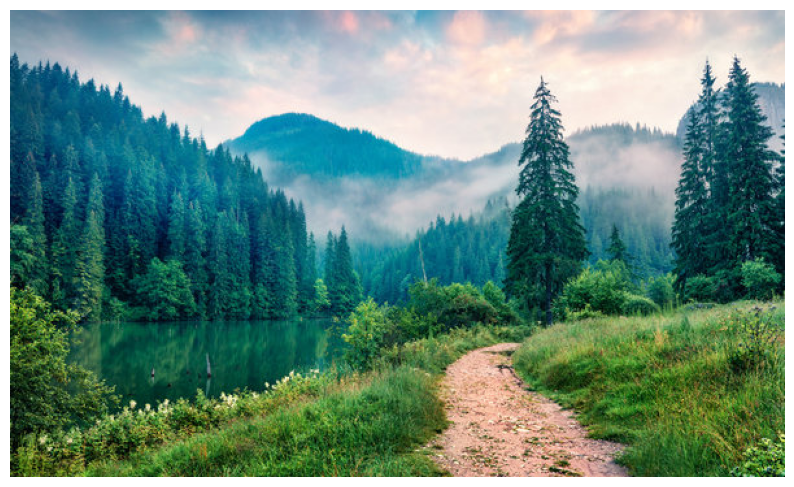

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr=cv2.imread('image.png')
image = cv2. cvtColor (img_bgr, cv2. COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()
img_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

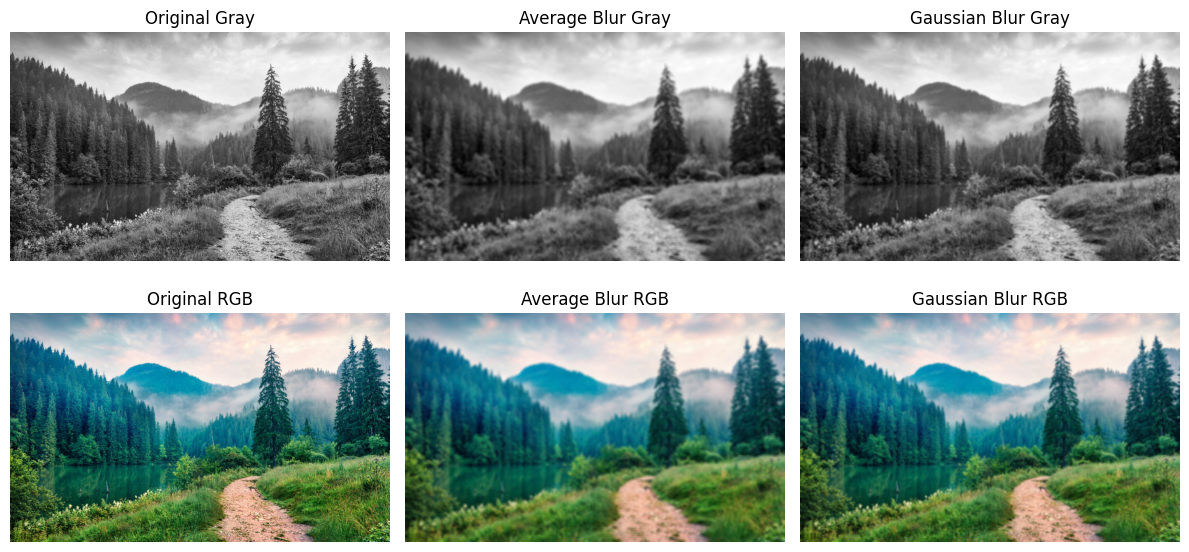

In [61]:
def convolve(image, kernel):
    k = kernel.shape[0]
    p = k // 2
    padded = np.pad(image, p, mode='reflect')
    out = np.zeros_like(image, dtype=np.float32)

    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i, j] = np.sum(padded[i:i+k, j:j+k] * kernel)

    return out

def average_blur(image, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32)
    kernel /= kernel.size

    if image.ndim == 2:
        return convolve(image, kernel)

    out = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        out[..., c] = convolve(image[..., c], kernel)
    return out

def gaussian_kernel(ksize, sigma):
    ax = np.arange(-ksize//2 + 1, ksize//2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel

def gaussian_blur(image, ksize, sigma):
    kernel = gaussian_kernel(ksize, sigma)

    if image.ndim == 2:
        return convolve(image, kernel)

    out = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        out[..., c] = convolve(image[..., c], kernel)
    return out

avg_gray = average_blur(image_gray, 5)
gauss_gray = gaussian_blur(image_gray, 5, 1.0)

avg_rgb = average_blur(image, 5)
gauss_rgb = gaussian_blur(image, 5, 1.0)

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(avg_gray, cmap='gray')
plt.title('Average Blur Gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gauss_gray, cmap='gray')
plt.title('Gaussian Blur Gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(image.astype(np.uint8))
plt.title('Original RGB')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(avg_rgb.astype(np.uint8))
plt.title('Average Blur RGB')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(gauss_rgb.astype(np.uint8))
plt.title('Gaussian Blur RGB')
plt.axis('off')

plt.tight_layout()
plt.show()


### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [62]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

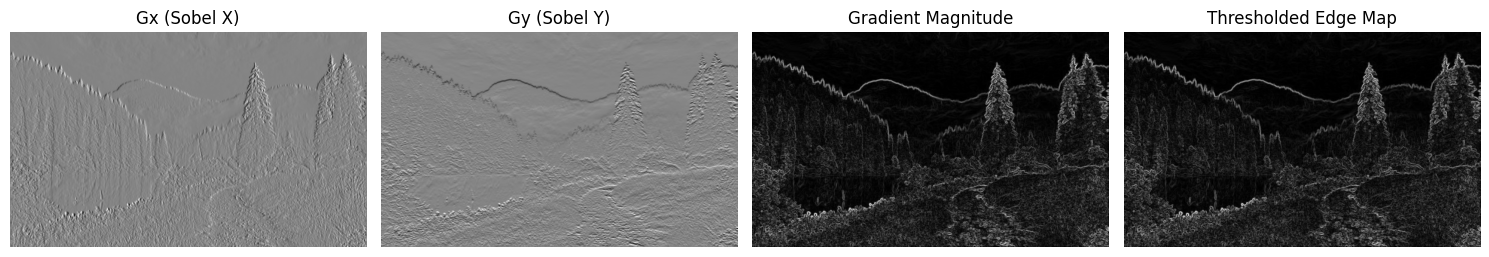

In [63]:
def convolve(img, kernel):
    k = kernel.shape[0]
    p = k // 2
    padded = np.pad(img, p, mode='reflect')
    out = np.zeros_like(img, dtype=np.float32)

    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i, j] = np.sum(padded[i:i+k, j:j+k] * kernel)

    return out

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

Gx = convolve(image_gray, sobel_x)
Gy = convolve(image_gray, sobel_y)

grad_mag = np.sqrt(Gx**2 + Gy**2)
grad_mag = (grad_mag / grad_mag.max()) * 255
edge_map = grad_mag.astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(Gx, cmap='gray')
plt.title('Gx (Sobel X)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(Gy, cmap='gray')
plt.title('Gy (Sobel Y)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edge_map, cmap='gray')
plt.title('Thresholded Edge Map')
plt.axis('off')

plt.tight_layout()
plt.show()



### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [64]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

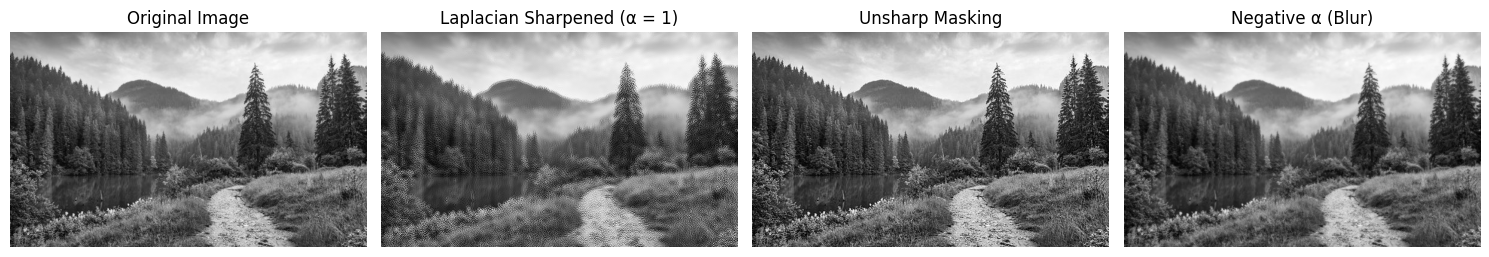

In [65]:
laplacian_kernel = np.array([
    [0, -1,  0],
    [-1, 4, -1],
    [0, -1,  0]
], dtype=np.float32)

lap = convolve(image_gray, laplacian_kernel)

alpha = 1.0
sharp_numpy = image_gray.astype(np.float32) - alpha * lap
sharp_numpy = np.clip(sharp_numpy, 0, 255).astype(np.uint8)

lap_cv = cv2.Laplacian(image_gray, cv2.CV_32F, ksize=3)
sharp_cv = image_gray.astype(np.float32) - lap_cv
sharp_cv = np.clip(sharp_cv, 0, 255).astype(np.uint8)

same_output = np.array_equal(sharp_numpy, sharp_cv)

kernel = gaussian_kernel(5, 1.0)
blurred = convolve(image_gray, kernel)

mask = image_gray.astype(np.float32) - blurred

alpha_unsharp = 0.7
sharp_unsharp = image_gray.astype(np.float32) + alpha_unsharp * mask
sharp_unsharp = np.clip(sharp_unsharp, 0, 255).astype(np.uint8)

alpha_negative = -0.5
blur_from_negative = image_gray.astype(np.float32) + alpha_negative * mask
blur_from_negative = np.clip(blur_from_negative, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(sharp_numpy, cmap='gray')
plt.title('Laplacian Sharpened (α = 1)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sharp_unsharp, cmap='gray')
plt.title('Unsharp Masking')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blur_from_negative, cmap='gray')
plt.title('Negative α (Blur)')
plt.axis('off')

plt.tight_layout()
plt.show()



### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [66]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

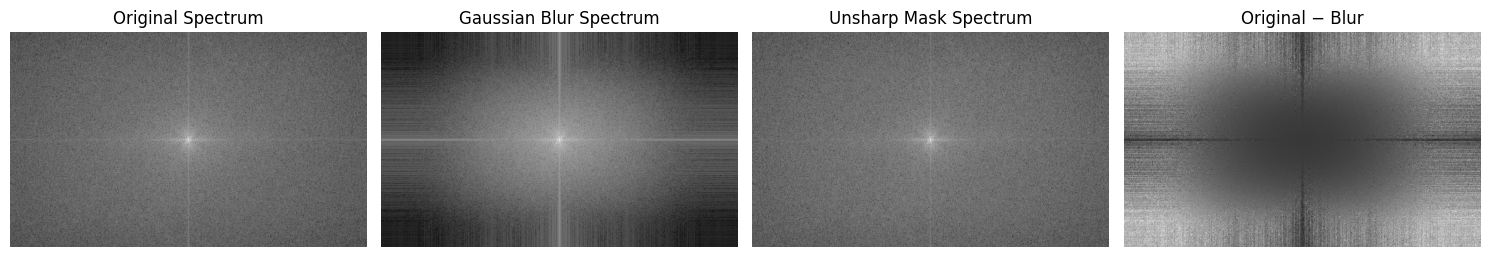

In [67]:
def magnitude_spectrum(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    mag = np.log(1 + np.abs(fshift))
    return mag

spec_original = magnitude_spectrum(img_gray)
spec_blur = magnitude_spectrum(blurred)
spec_sharp = magnitude_spectrum(sharp_unsharp)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(spec_original, cmap='gray')
plt.title('Original Spectrum')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(spec_blur, cmap='gray')
plt.title('Gaussian Blur Spectrum')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(spec_sharp, cmap='gray')
plt.title('Unsharp Mask Spectrum')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(spec_original - spec_blur, cmap='gray')
plt.title('Original − Blur')
plt.axis('off')

plt.tight_layout()
plt.show()


### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

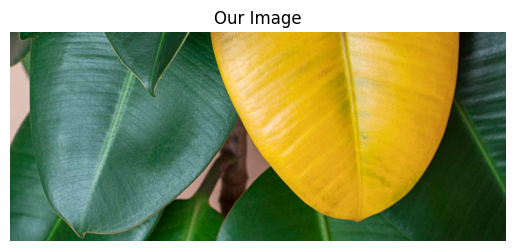

In [68]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [69]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

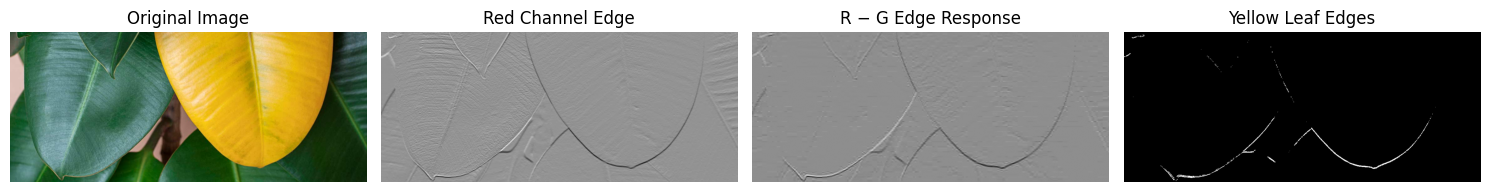

In [70]:
img_part5 = img_part5.astype(np.float32)

R = img_part5[..., 0]
G = img_part5[..., 1]
B = img_part5[..., 2]

def convolve(img_part5, kernel):
    k = kernel.shape[0]
    p = k // 2
    padded = np.pad(img_part5, p, mode='reflect')
    out = np.zeros_like(img_part5, dtype=np.float32)

    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i, j] = np.sum(padded[i:i+k, j:j+k] * kernel)

    return out


rg_diff = R - G

kernel = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
], dtype=np.float32)

edge_r = convolve(R, kernel)
edge_rg = convolve(rg_diff, kernel)

edge_combined = np.abs(edge_r) + np.abs(edge_rg)

edge_combined = (edge_combined / edge_combined.max()) * 255
edge_map = edge_combined.astype(np.uint8)

edge_map = np.where(edge_map > 80, 255, 0).astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_part5.astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(edge_r, cmap='gray')
plt.title('Red Channel Edge')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(edge_rg, cmap='gray')
plt.title('R − G Edge Response')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edge_map, cmap='gray')
plt.title('Yellow Leaf Edges')
plt.axis('off')

plt.tight_layout()
plt.show()


### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
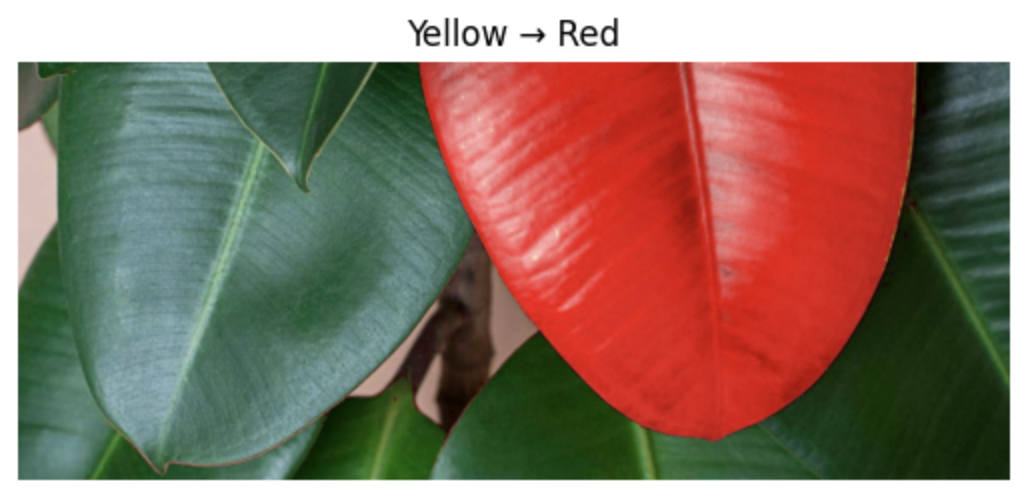

Also, we can change to a less brighter colour
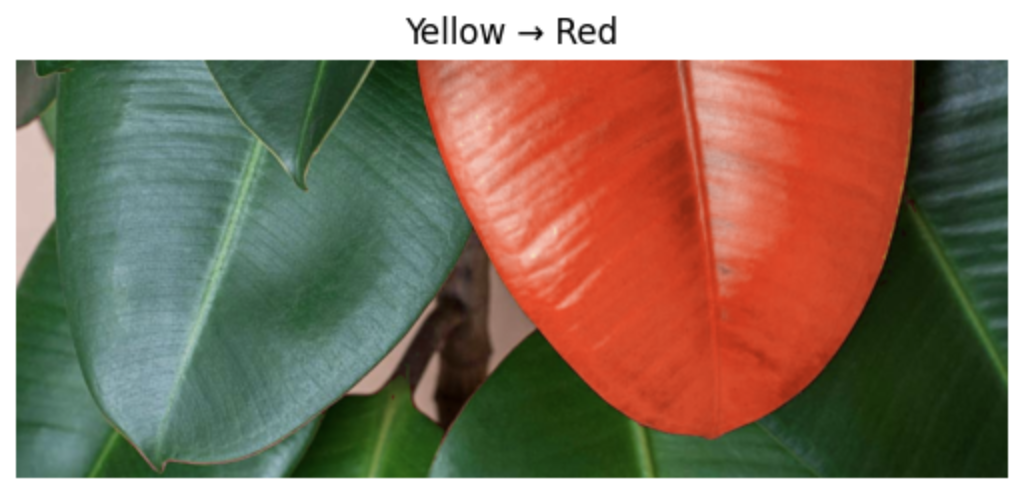

In [71]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.

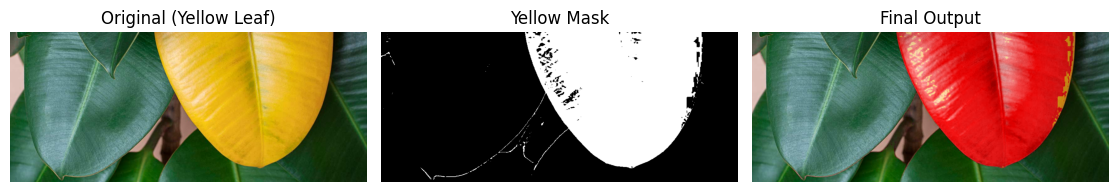

In [72]:
img_part5 = img_part5.astype(np.uint8)

hsv_img = cv2.cvtColor(img_part5, cv2.COLOR_RGB2HSV)

yellow_mask = cv2.inRange(
    hsv_img,
    np.array([20, 50, 50]),
    np.array([35, 255, 255])
)

hsv_modified = hsv_img.copy()
hsv_modified[yellow_mask > 0, 0] = 0

red_leaf_img = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_part5)
plt.title('Original (Yellow Leaf)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(yellow_mask, cmap='gray')
plt.title('Yellow Mask')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(red_leaf_img)
plt.title('Final Output')
plt.axis('off')

plt.tight_layout()
plt.show()

